### Contents

#### - ***`Question`***:

- 1. Examine the provided Dubai real estate data - sales and rental transactions only - to uncover key insights and trends. Support your findings with relevant visualizations. (10 points)

- 2. Utilize the additional datasets to identify macroeconomic factors, such as GDP, tourism, population, and energy, that may impact the real estate market. (10 points)

- 3. Explore the correlations between these macroeconomic factors and property sale or rental prices. Highlight the most significant factors driving market behavior. (10 points)

#### - ***`Solution`***:

**Exploratory Data Analysis (EDA) Plan**

To perform a comprehensive EDA and address the required question, we'll examine **Dubai's real estate data** alongside **macroeconomic datasets** using these step-by-step approach:

---

**Step 1: Real Estate Data (Sales & Rentals)**

**Tasks:**
1. **Load and Inspect Data:**
   - Load `processed_rents.parquet` and `processed_transactions.parquet` datasets.
   - Refactor to reconcile conflicting variables
   - Check for missing values, data types, and anomalies.

2. **Univariate Analysis:**
   - Distribution of property types, sizes, and rental/sale prices.
   - Time-series trends for transaction volume and average prices.

3. **Bivariate Analysis:**
   - Analyze price variations by:
     - Property type/sub-type.
     - Number of bedrooms.
     - Area/neighborhood.
     - Usage (commercial vs. residential).

4. **Temporal Trends:**
   - Investigate seasonal variations in rental and sale prices.
   - Assess trends over months and years.

5. **Visualization Examples:**
   - Histograms for price distributions.
   - Bar charts for property types and usage.
   - Line charts for temporal trends.

---

**Step 2: Macroeconomic Data**

**Datasets:**
- **GDP (Quarterly)**:
  - Examine Dubai’s GDP growth trends.
  - Plot GDP vs. average property prices.

- **Tourism**:
  - Analyze tourist arrivals and their relationship with rental demand.

- **Population**:
  - Investigate population growth and its correlation with property transactions.

- **Consumer Price Index (CPI)**:
  - Correlate inflation data with property prices.

- **Currency Strength (AED-USD Exchange Rates)**:
  - Explore how exchange rate fluctuations impact foreign investment in real estate.

**Tasks:**
1. **Load and Inspect Data:**
   - Check for missing values, data ranges, and formatting issues.

2. **Temporal Trends:**
   - Examine macroeconomic indicators over time.

3. **Correlation Analysis:**
   - Compute correlations between property prices and macroeconomic indicators.

4. **Visualization Examples:**
   - Scatter plots for GDP, population, and property prices.
   - Heatmaps to display correlation matrices.
   - Summary statistics table

---

**Step 3: Integration and Key Insights**

**Tasks:**
1. **Combine Data:**
   - Merge real estate data with macroeconomic indicators based on time periods.

2. **Identify Significant Factors:**
   - Use correlation coefficients and simple regressions to pinpoint key drivers.

3. **Key Insights:**
   - Highlight the strongest correlations and trends.
   - Identify unexpected patterns, such as mismatches between GDP growth and property prices.

---

### 1.  Data Overview

####  Load Data, Inspect, and Reconcile Variables

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../utils")

# Import the data_loader module
import data_loader, data_processor, plots


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

To reconcile the terminologies and align them with the datasets and the challenge description, we can establish a clear mapping between the terms and their meanings in the context of this analysis:

**Challenge Terminology and Dataset Mapping:**

1. **Sales Transactions:**
   - **Challenge Description:** Refers to transactions where properties are bought or sold.
   - **Dataset:** `transactions.csv` (now processed as `processed_transactions_df`).
   - **Proposed Terminology:** **Property Sales Transactions** or simply **Sales Transactions**.

2. **Rental Transactions:**
   - **Challenge Description:** Refers to agreements where properties are leased or rented.
   - **Dataset:** `rents.csv` (now processed as `processed_rents_df`).
   - **Proposed Terminology:** **Property Rental Transactions** or simply **Rental Transactions**.

**Importance of Unified Terminology**

- **Clarity:** Using consistent terms (e.g., *Sales Transactions* and *Rental Transactions*) avoids ambiguity and confusion.
- **Alignment with Challenge:** Adopting terms from the challenge description ensures alignment with the task and goals.
- **Contextual Relevance:** Using dataset-specific terms like *Property Sales Transactions* for `transactions.csv` and *Property Rental Transactions* for `rents.csv` reflects their roles in the analysis.

---

**Proposed Unified Terminology:**

| Challenge Term           | Dataset Name    | Proposed Unified Term           |
|--------------------------|-----------------|----------------------------------|
| Sales Transactions       | `transactions.csv` | Property Sales Transactions       |
| Rental Transactions      | `rents.csv`      | Property Rental Transactions      |

**Update Code and Documentation:**
1. Code comments and variable names updated to reflect the unified terminology:
   - Renamed `transactions_df` to `property_transactions_df`.
   - Renamed `rents_df` to `property_rental_transactions_df`.

2. Updated documentation and markdown cells in notebooks to use these terms consistently:
   - Mentioned *Property Sales Transactions* for sales data, as a subset of Property Transactions (transactions.csv).
   - Mentioned *Property Rental Transactions* for rental data (no subsets).

3. Define the Solution Scope

The goal is to:

- Analyze Sales Transactions from transactions.csv.
- Analyze Rental Transactions from rents.csv.

---

- this will be used for the first part of the question

In [3]:
property_rental_transactions_df = pd.read_parquet('../datasets/processed/processed_rents_df.parquet', engine='fastparquet')
property_transactions_df = pd.read_parquet('../datasets/processed/processed_transactions_df.parquet', engine='fastparquet')


- these uploads will address the remaining part of the question

In [4]:
gdp_quarterly_constant_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
gdp_quarterly_current_df = pd.read_parquet("../datasets/processed/processed_gdp_quarterly_current_df.parquet")
tourism_indicators_df = pd.read_parquet("../datasets/processed/processed_tourism_indicators_df.parquet")
tourism_regions_df = pd.read_parquet("../datasets/processed/processed_tourism_regions_df.parquet")
tourism_ratings_df = pd.read_parquet("../datasets/processed/processed_tourism_ratings_df.parquet")
pop_estimates_df = pd.read_parquet("../datasets/processed/processed_pop_estimates_df.parquet")
pop_indicators_df = pd.read_parquet("../datasets/processed/pop_indicators.parquet")
currency_strength_df = pd.read_parquet("../datasets/processed/currency_strength_df.parquet")


In [5]:
data_processor.display_dataframe_info(currency_strength_df)

Shape: (5468, 8)
Dtypes: ['Open:float64', 'High:float64', 'Low:float64', 'Close:float64', 'Adj Close:float64', 'Volume:int64', 'Date:object', 'Return:float64']
Missings (%): ['Open:0.00%', 'High:0.00%', 'Low:0.00%', 'Close:0.00%', 'Adj Close:0.00%', 'Volume:0.00%', 'Date:0.00%', 'Return:0.02%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.33 MB


,Open,High,Low,Close,Adj Close,Volume,Date,Return
0,0.272331,0.272368,0.272331,0.272368,0.272368,0,2003-12-01,NaN
1,0.272413,0.272420,0.272331,0.272368,0.272368,0,2003-12-02,0.0


In [6]:
data_processor.display_dataframe_info(pop_indicators_df)

Shape: (18, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.00 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


In [7]:
data_processor.display_dataframe_info(pop_estimates_df)

Shape: (162, 10)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'POP_IND:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'GENDER:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'POP_IND:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'GENDER:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.01 MB


,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1970,149195
1,FCSA:DF_POP(2.7.0),POP,_Z,PS,AE,A,M,FCSC,1971,181473


In [8]:
data_processor.display_dataframe_info(tourism_ratings_df)

Shape: (400, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.03 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


In [9]:
data_processor.display_dataframe_info(tourism_regions_df)

Shape: (664, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:int64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.06 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


In [10]:
data_processor.display_dataframe_info(tourism_indicators_df)

Shape: (201, 11)
Dtypes: ['DATAFLOW:object', 'MEASURE:object', 'UNIT_MEASURE:object', 'REF_AREA:object', 'FREQ:object', 'H_TYPE:object', 'H_INDICATOR:object', 'GUEST_REGION:object', 'SOURCE_DETAIL:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64']
Missings (%): ['DATAFLOW:0.00%', 'MEASURE:0.00%', 'UNIT_MEASURE:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'H_TYPE:0.00%', 'H_INDICATOR:0.00%', 'GUEST_REGION:0.00%', 'SOURCE_DETAIL:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.02 MB


,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


In [11]:
data_processor.display_dataframe_info(gdp_quarterly_current_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


In [12]:
data_processor.display_dataframe_info(gdp_quarterly_constant_df)

Shape: (1920, 12)
Dtypes: ['DATAFLOW:object', 'REF_AREA:object', 'FREQ:object', 'UNIT_MEASURE:object', 'SOURCE_DETAIL:object', 'MEASURE:object', 'QUARTER:object', 'QGDP_SYS:object', 'QGDP_UNIT:object', 'TIME_PERIOD:int64', 'OBS_VALUE:float64', 'DECIMALS:int64']
Missings (%): ['DATAFLOW:0.00%', 'REF_AREA:0.00%', 'FREQ:0.00%', 'UNIT_MEASURE:0.00%', 'SOURCE_DETAIL:0.00%', 'MEASURE:0.00%', 'QUARTER:0.00%', 'QGDP_SYS:0.00%', 'QGDP_UNIT:0.00%', 'TIME_PERIOD:0.00%', 'OBS_VALUE:0.00%', 'DECIMALS:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 0.18 MB


,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0


In [13]:
data_processor.display_dataframe_info(property_transactions_df)

Shape: (995975, 22)
Dtypes: ['Transaction Number:object', 'Transaction Date:object', 'Property ID:int64', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Usage:category', 'Area:category', 'Property Type:category', 'Property Sub Type:category', 'Amount:float64', 'Transaction Size (sq.m):float64', 'Property Size (sq.m):float64', 'Room(s):category', 'Parking:object', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'No. of Buyer:float64', 'No. of Seller:float64', 'Project:category']
Missings (%): ['Transaction Number:0.00%', 'Transaction Date:0.00%', 'Property ID:0.00%', 'Transaction Type:0.00%', 'Transaction sub type:0.00%', 'Registration type:0.00%', 'Is Free Hold?:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Type:0.00%', 'Property Sub Type:2.23%', 'Amount:0.00%', 'Transaction Size (sq.m):12.62%', 'Property Size (sq.m):0.00%', 'Room(s):23.88%', 'Parking:49.53%', 'Nearest Metro:21.70%'

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project
0,13-7700-2022,02/06/2022 16:18,44581083,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ODORA
1,13-7699-2022,02/06/2022 16:14,44014284,Mortgage,Mortgage Registration,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,174.8,174.8,NaN,None,NaN,NaN,Dubai Cycling Course,0.0,0.0,DAMAC HILLS (2) - ZINNIA


In [14]:
data_processor.display_dataframe_info(property_rental_transactions_df)

Shape: (5469008, 21)
Dtypes: ['Ejari Contract Number:int64', 'Registration Date:datetime64[ns]', 'Start Date:category', 'End Date:datetime64[ns]', 'Property ID:int64', 'Version:category', 'Area:category', 'Contract Amount:float64', 'Annual Amount:float64', 'Is Free Hold?:category', 'Property Size (sq.m):float64', 'Property Type:category', 'Property Sub Type:category', 'Number of Rooms:float32', 'Usage:category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Parking:float32', 'No of Units:int16', 'Project:category']
Missings (%): ['Ejari Contract Number:0.00%', 'Registration Date:0.00%', 'Start Date:0.00%', 'End Date:0.00%', 'Property ID:0.00%', 'Version:0.00%', 'Area:0.01%', 'Contract Amount:2.85%', 'Annual Amount:5.89%', 'Is Free Hold?:0.00%', 'Property Size (sq.m):49.95%', 'Property Type:0.00%', 'Property Sub Type:0.73%', 'Number of Rooms:96.53%', 'Usage:1.01%', 'Nearest Metro:10.27%', 'Nearest Mall:10.94%', 'Nearest Landmark:6.34%', 'Parking:96.93%

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,...,Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Project
0,120210425000238,2021-04-25 09:36:31,2015-01-15,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,...,Building,Factory,NaN,Industrial,NaN,NaN,Expo 2020 Site,NaN,1,NaN
1,120210526001582,2021-05-26 12:12:22,2015-02-05,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,...,Building,Building,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN


### 2. Sales and Rentals EDA

#### 2a. Univariate Analysis: Histograms for All Variables

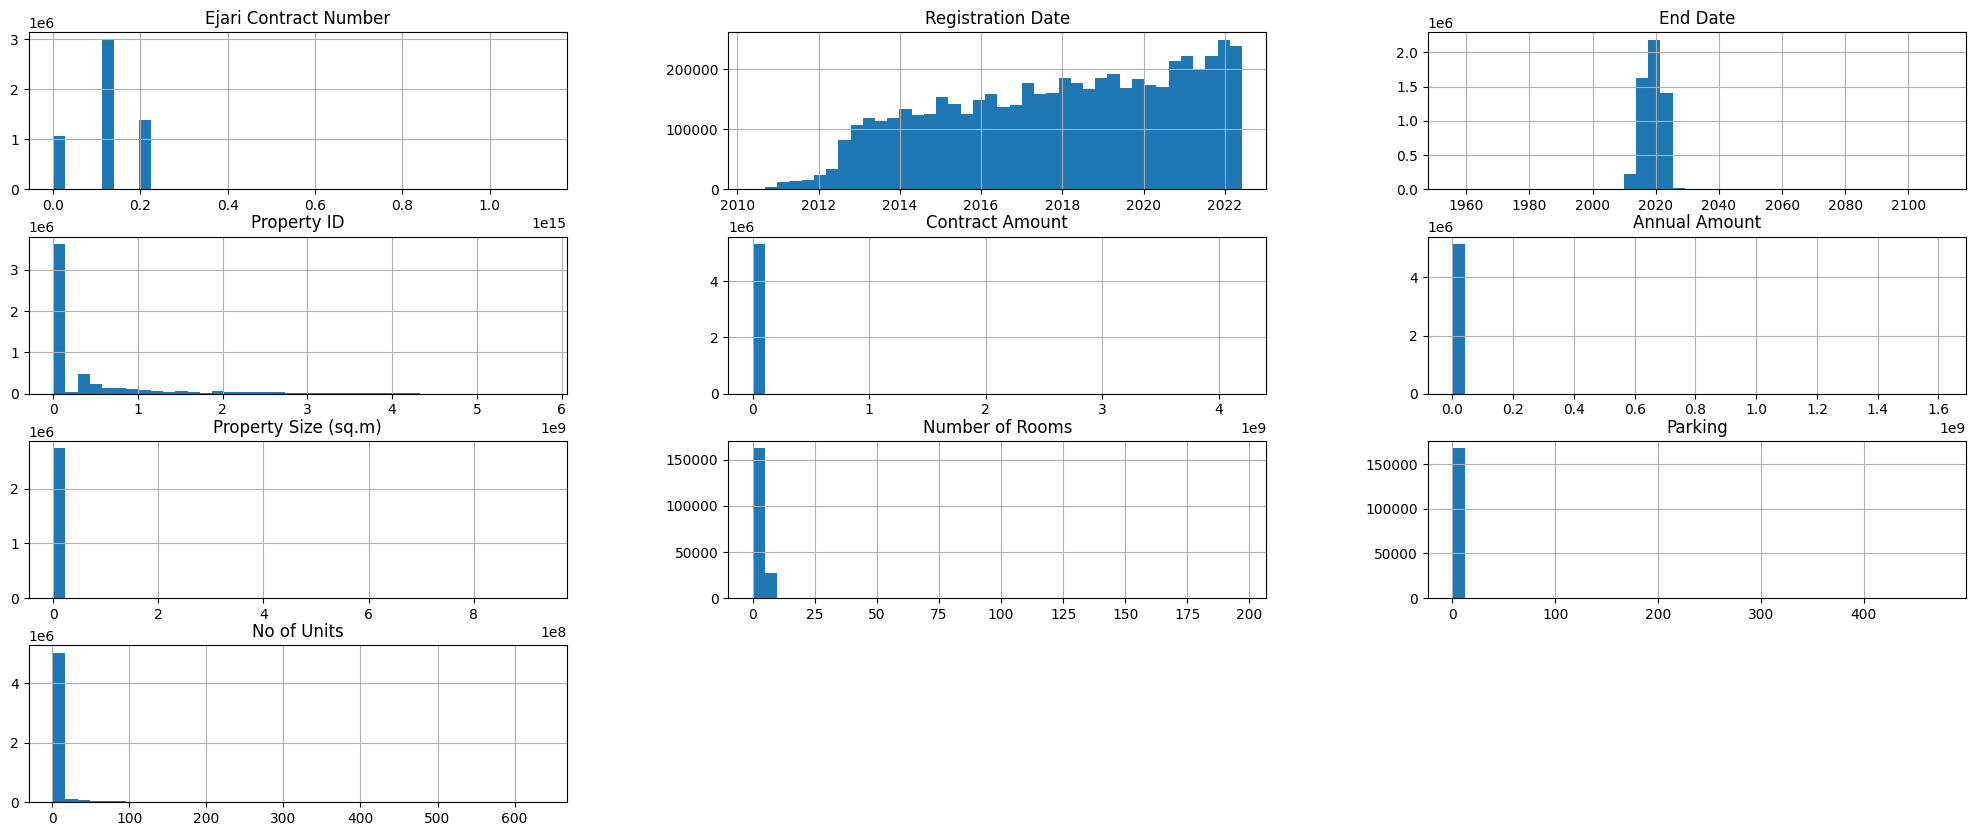

In [15]:
property_rental_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

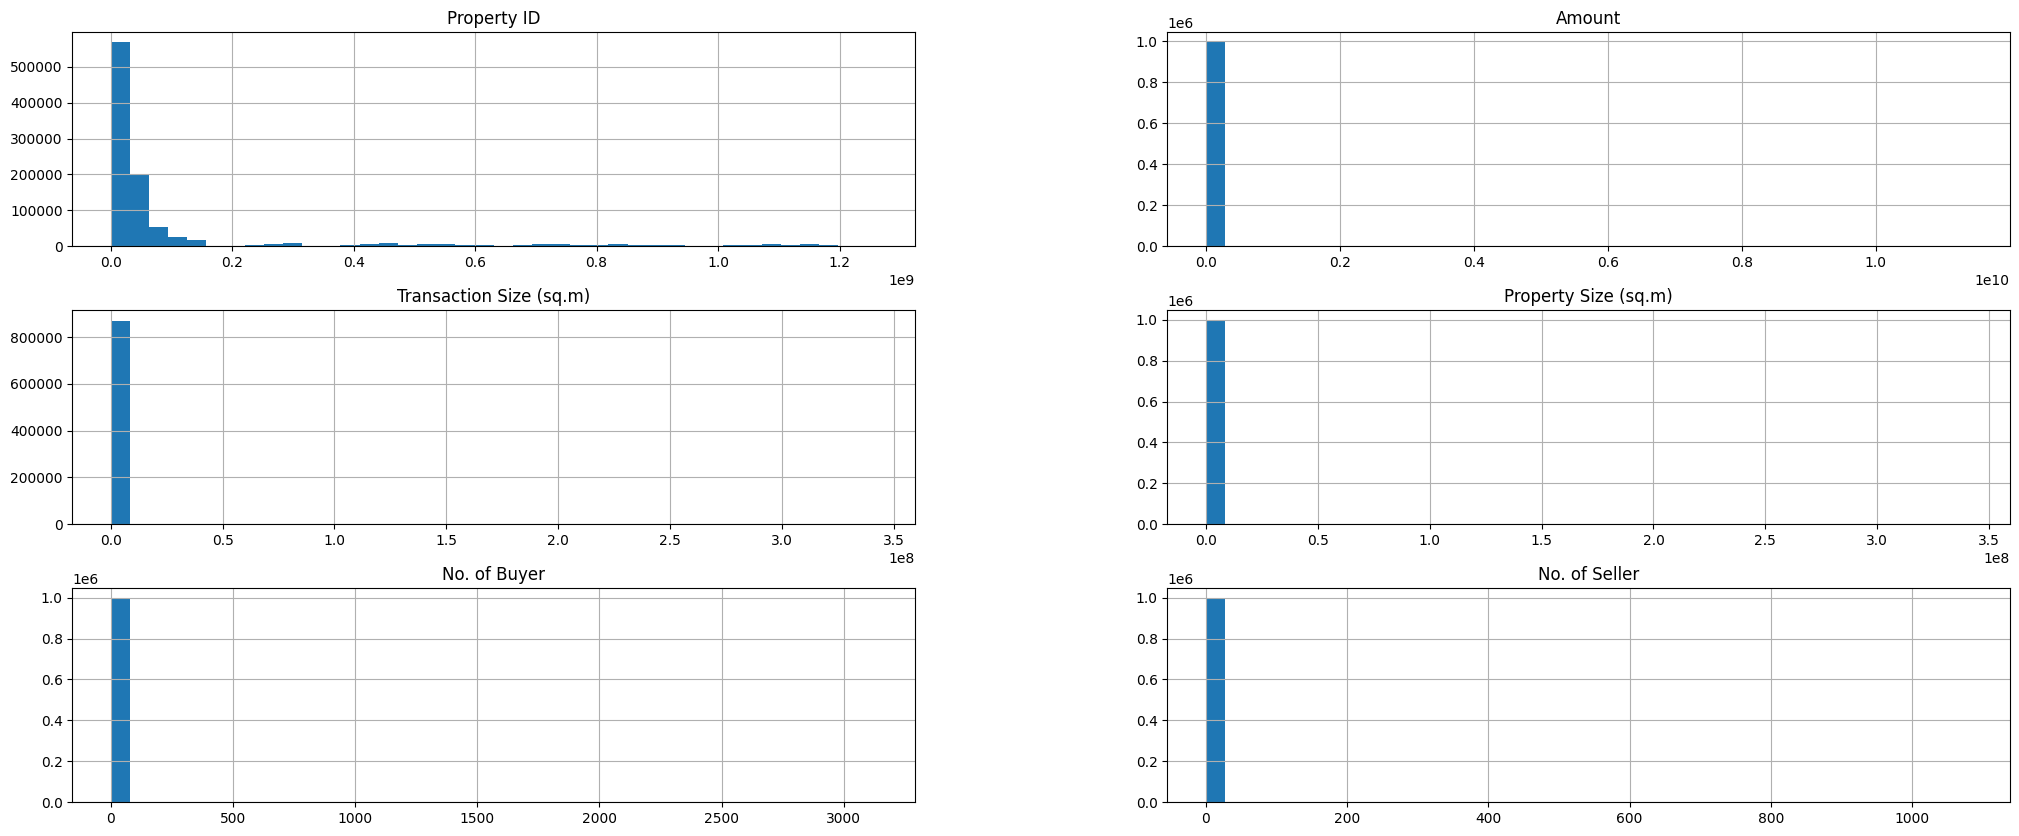

In [16]:
property_transactions_df.hist(figsize=(25, 10), bins=40)
plt.show()

#### 2b. Univariate Analysis: Count Plot for All Categorical Variables

In [17]:

# categorical_columns = ['Property Type', 'Property Sub Type', 'Usage', 'Area', 'Is Free Hold?', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark'
# ]
# property_transactions_df[categorical_columns].value_counts().plot(figsize=(25, 10))
# plt.show()

In [18]:
# Call the function
# plots.plot_countplots(property_rental_transactions_df, categorical_columns, max_categories=10)

In [19]:
# plots.plot_countplots(transactions_df, categorical_columns)
# plots.plot_countplots(property_transactions_df, categorical_columns, max_categories=10)


#### 2c. Univariate/Multivariate Analysis: Trends with Comparison Option

In [20]:
property_rental_transactions_df.duplicated().sum()

0

<Figure size 1400x400 with 0 Axes>

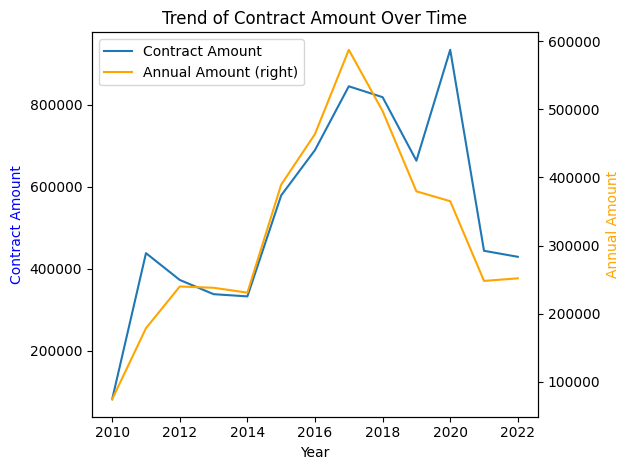

In [21]:

plots.plot_trends(
    property_rental_transactions_df, 
    main_col='Contract Amount', 
    time_col='Registration Date', 
    secondary_col='Annual Amount'
)


In [22]:
property_rental_transactions_df['Registration Date'].describe()

count                          5469008
mean     2017-12-22 10:56:27.071334912
min                2010-05-18 19:44:30
25%         2015-08-09 10:02:38.500000
50%         2018-03-28 18:02:16.500000
75%         2020-07-29 10:45:42.500000
max                2022-06-03 12:25:51
Name: Registration Date, dtype: object

In [23]:
# Process the 'Transaction Date' column
property_transactions_df = plots.process_transaction_dates(property_transactions_df)

# Check the updates
property_transactions_df[['Transaction Date', 'Year', 'Month', 'Day', 'Hour']].head()



,Transaction Date,Year,Month,Day,Hour
0,2022-06-02 16:18:00,2022,6,2,16
1,2022-06-02 16:14:00,2022,6,2,16
2,2022-06-02 15:42:00,2022,6,2,15
3,2022-06-02 15:22:00,2022,6,2,15
4,2022-06-02 15:07:00,2022,6,2,15


In [24]:
property_transactions_df['Transaction Date'].describe()
# transactions_df['Transaction Date']

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

<Figure size 1400x400 with 0 Axes>

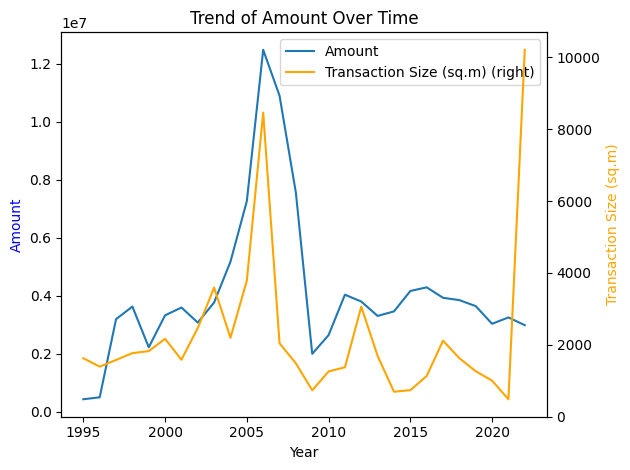

In [25]:
plots.plot_trends(
    property_transactions_df, 
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


#### 2d. Summary Statistics - Rent and Sales

- Property Transactions Summary Stats

In [26]:
property_transactions_df[['Transaction Type','Transaction sub type','Property Type','Property Sub Type']]


,Transaction Type,Transaction sub type,Property Type,Property Sub Type
0,Mortgage,Mortgage Registration,Land,Residential
1,Mortgage,Mortgage Registration,Land,Residential
2,Mortgage,Modify Mortgage,Land,Residential
3,Sales,Sale,Land,Commercial
4,Sales,Sale,Land,Residential
...,...,...,...,...
995970,Mortgage,Mortgage Registration,Land,Residential
995971,Mortgage,Mortgage Registration,Land,Residential
995972,Mortgage,Mortgage Registration,Land,Residential
995973,Mortgage,Mortgage Registration,Land,Residential


In [27]:
plots.compute_summary_statistics(property_transactions_df)


--- Summary Statistics ---
                            count          mean           std      min        25%          50%           75%           max
Property ID              995975.0  1.114824e+08  2.477860e+08  1458.00  601027.50  14943291.00  5.385910e+07  1.260767e+09
Amount                   995975.0  3.705480e+06  4.741460e+07    67.51  653800.00   1200000.00  2.203381e+06  1.142830e+10
Transaction Size (sq.m)  870248.0  1.868872e+03  3.887984e+05 -3984.08      75.06       132.02  3.223950e+02  3.421034e+08
Property Size (sq.m)     995972.0  1.908865e+03  4.169793e+05     0.00      73.26       123.81  2.689400e+02  3.421034e+08
No. of Buyer             995787.0  9.448356e-01  6.488847e+00     0.00       0.00         1.00  1.000000e+00  3.134000e+03
No. of Seller            995787.0  9.248112e-01  5.819718e+00     0.00       0.00         1.00  1.000000e+00  1.084000e+03
Year                     995975.0  2.014556e+03  4.814687e+00  1995.00    2011.00      2015.00  2.019000e+03  2

- We are however concerned with only Sales Transactions here

In [28]:
# Filter for Sales Transactions
sales_transactions_df = property_transactions_df[property_transactions_df['Transaction Type'] == 'Sales']

# Inspect the filtered data
print('Property Sales Transactions Dataframe:')
sales_transactions_df.head()


Property Sales Transactions Dataframe:


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Year,Month,Day,Hour
3,11-12317-2022,2022-06-02 15:22:00,79102731,Sales,Sale,Ready,Free Hold,Commercial,AL FURJAN,Land,...,NaN,NaN,NaN,1.0,1.0,NaN,2022,6,2,15
4,11-12316-2022,2022-06-02 15:07:00,132952797,Sales,Sale,Ready,Free Hold,Residential,AKOYA OXYGEN,Land,...,NaN,NaN,Dubai Cycling Course,1.0,1.0,DAMAC HILLS (2) - AMARGO,2022,6,2,15
5,102-14693-2022,2022-06-02 14:56:00,1134745314,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,AL FURJAN,Unit,...,Ibn Battuta Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,0.0,1.0,Prime Residency 3,2022,6,2,14
6,102-14692-2022,2022-06-02 14:54:00,750930096,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,ARABIAN RANCHES III,Building,...,NaN,NaN,Hamdan Sports Complex,2.0,1.0,Arabian Ranches III - JOY,2022,6,2,14
8,11-12315-2022,2022-06-02 14:52:00,41160822,Sales,Sale,Ready,Free Hold,Residential,PALM JUMEIRAH,Unit,...,Palm Jumeirah,Marina Mall,Burj Al Arab,1.0,1.0,GOLDEN MILE,2022,6,2,14


In [29]:
print('Property Sales Transactions Distribution:')
sales_transactions_df['Transaction Type'].value_counts()

Property Sales Transactions Distribution:


Transaction Type
Sales       706096
Gifts            0
Mortgage         0
Name: count, dtype: int64

All Mortgage and Gift Transactions?

In [30]:
print('Property Sales Transactions Sub Type Distribution:')
sales_transactions_df[['Transaction sub type','Transaction Type']].value_counts()

Property Sales Transactions Sub Type Distribution:


Transaction sub type                        Transaction Type
Sale                                        Sales               320565
Sell - Pre registration                     Sales               252047
Delayed Sell                                Sales                77843
Lease to Own Registration                   Sales                26541
Development Registration                    Sales                11014
Sell Development                            Sales                 6979
Lease to Own Registration Pre-Registration  Sales                 4187
Development Registration Pre-Registration   Sales                 2834
Delayed Development                         Sales                 1132
Delayed Lease to Own Registration           Sales                 1106
Lease Development Registration              Sales                  467
Adding Land By Sell                         Sales                  442
Lease to Own on Development Registration    Sales                  287
Sale On Payment 

In [31]:
sales_transactions_df[sales_transactions_df['Transaction Type'] == 'Gift']

,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,...,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Project,Year,Month,Day,Hour


- Property Rentals Transactions Summary Stats

In [32]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units', 'Project',
       'Year'],
      dtype='object')

In [33]:
property_transactions_df[['Property Type','Property Sub Type']]


,Property Type,Property Sub Type
0,Land,Residential
1,Land,Residential
2,Land,Residential
3,Land,Commercial
4,Land,Residential
...,...,...
995970,Land,Residential
995971,Land,Residential
995972,Land,Residential
995973,Land,Residential


In [34]:
plots.compute_summary_statistics(property_rental_transactions_df)


--- Summary Statistics ---
                           count          mean           std      min           25%           50%           75%           max
Ejari Contract Number  5469008.0  1.220578e+14  7.351125e+13  10784.0  1.201402e+14  1.201809e+14  2.201309e+14  1.120211e+15
Property ID            5469008.0  3.946340e+08  7.869853e+08     -3.0  5.558610e+05  1.551349e+07  4.097198e+08  5.772906e+09
Contract Amount        5312994.0  6.161654e+05  8.568009e+06 -58697.0  4.200000e+04  6.500000e+04  1.250000e+05  4.200000e+09
Annual Amount          5147083.0  3.637541e+05  3.875681e+06      0.0  4.200000e+04  6.500000e+04  1.230000e+05  1.610378e+09
Property Size (sq.m)   2737178.0  1.558289e+04  2.469164e+06      0.0  2.600000e+01  7.200000e+01  1.370000e+02  9.300910e+08
Number of Rooms         189965.0  3.411623e+00  1.103472e+00      0.0  3.000000e+00  3.000000e+00  4.000000e+00  1.970000e+02
Parking                 168090.0  9.725326e-01  4.481396e+00      0.0  0.000000e+00  1.000

In [35]:
# Inspect Rental Property Type Distribution
print('Rental Property Type Distribution')
property_rental_transactions_df['Property Type'].value_counts()


Rental Property Type Distribution


Property Type
Unit            4963176
Villa            422228
Virtual Unit      44602
Land              36194
Building           2808
Name: count, dtype: int64

- ***Uncover Key Insights***

We'll focus on uncovering insights specific to sales and rental trends:

Temporal Trends:

- Sales and rental activity by year, month, or quarter.
- Seasonal patterns or anomalies.

Spatial Insights:

- Most active areas for sales and rentals.
- Average transaction amounts by area or property type.

Price Trends:
- Median sales and rental prices over time.
- Correlation between property size and price.

**Visualization 1: Temporal Trends in Sales and Rentals**

- Objective: Identify trends in transaction volumes and median prices over time.
- Approach: Aggregate by year/month, compute metrics, and plot.

In [36]:
# Temporal Trends
sales_trends = sales_transactions_df.groupby('Year')['Amount'].median()
rental_trends = property_rental_transactions_df.groupby('Year')['Annual Amount'].median()

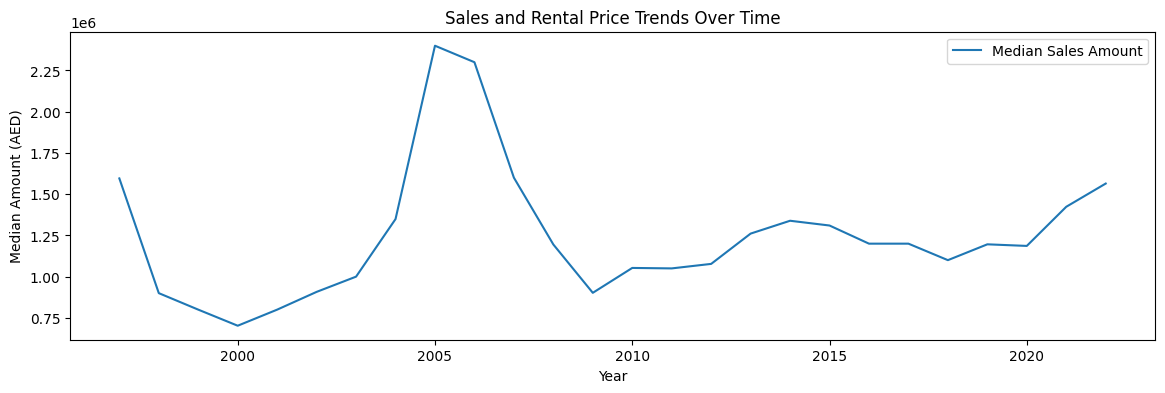

In [37]:

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(sales_trends, label='Median Sales Amount')
# plt.plot(rental_trends, label='Median Rental Amount')
plt.xlabel('Year')
plt.ylabel('Median Amount (AED)')
plt.title('Sales and Rental Price Trends Over Time')
plt.legend()
plt.show()


**Visualization 2: Spatial Distribution of Transactions**
- Objective: Identify high-activity areas for sales and rentals.
- Approach: Aggregate data by Area and visualize counts or sums.

In [38]:
# Count transactions by area
sales_area = sales_transactions_df['Area'].value_counts().head(10)
rental_area = property_rental_transactions_df['Area'].value_counts().head(10)

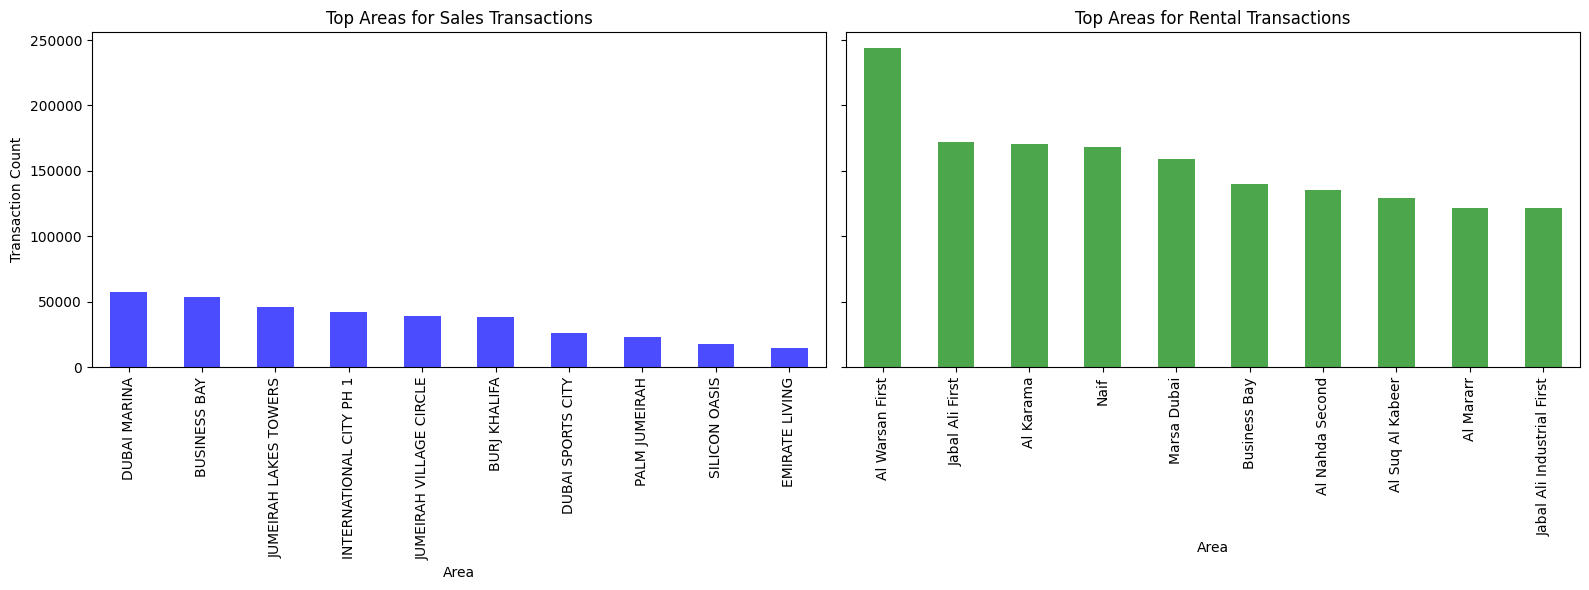

In [39]:
# Plot bar chart for top areas
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sales_area.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
rental_area.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)

ax[0].set_title('Top Areas for Sales Transactions')
ax[1].set_title('Top Areas for Rental Transactions')
ax[0].set_ylabel('Transaction Count')
ax[0].set_xlabel('Area')
ax[1].set_xlabel('Area')
plt.tight_layout()
plt.show()


**Visualization 3: Price Distribution by Property Type**
- Objective: Explore price variation across different property types for both datasets.

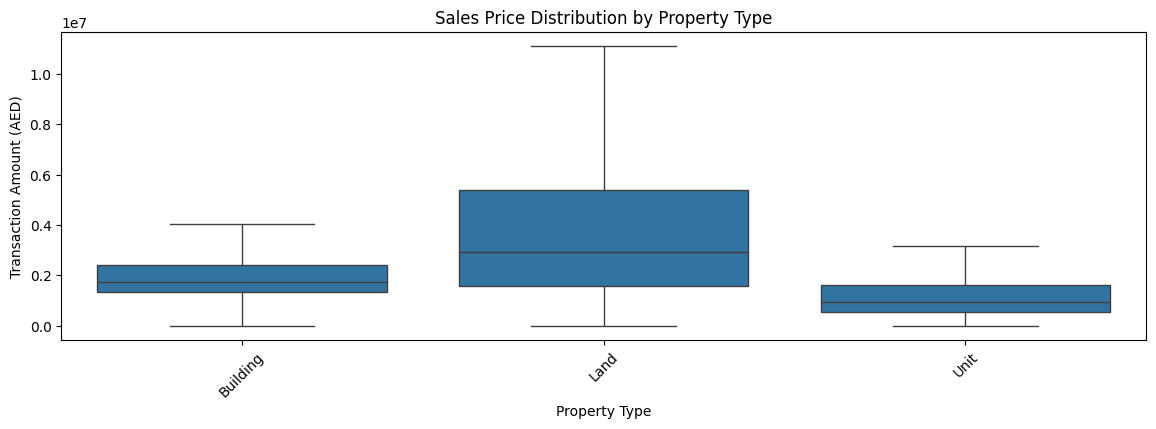

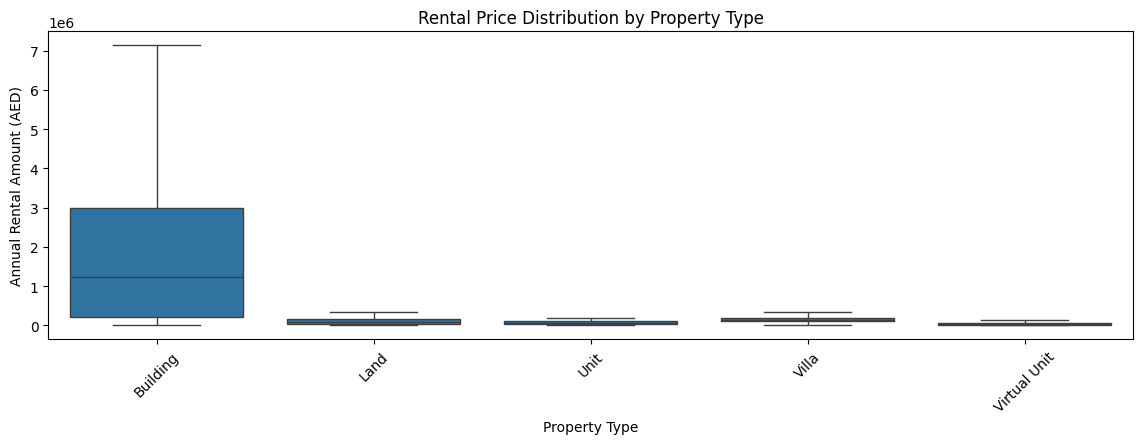

In [40]:
# Boxplots of prices by property type
plt.figure(figsize=(14, 4))
sns.boxplot(data=sales_transactions_df, x='Property Type', y='Amount', showfliers=False)
plt.title('Sales Price Distribution by Property Type')
plt.ylabel('Transaction Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(data=property_rental_transactions_df, x='Property Type', y='Annual Amount', showfliers=False)
plt.title('Rental Price Distribution by Property Type')
plt.ylabel('Annual Rental Amount (AED)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()


**Visualization 4: Relationship Between Property Size and Price**
- Objective: Analyze the correlation between property size and price for sales and rentals

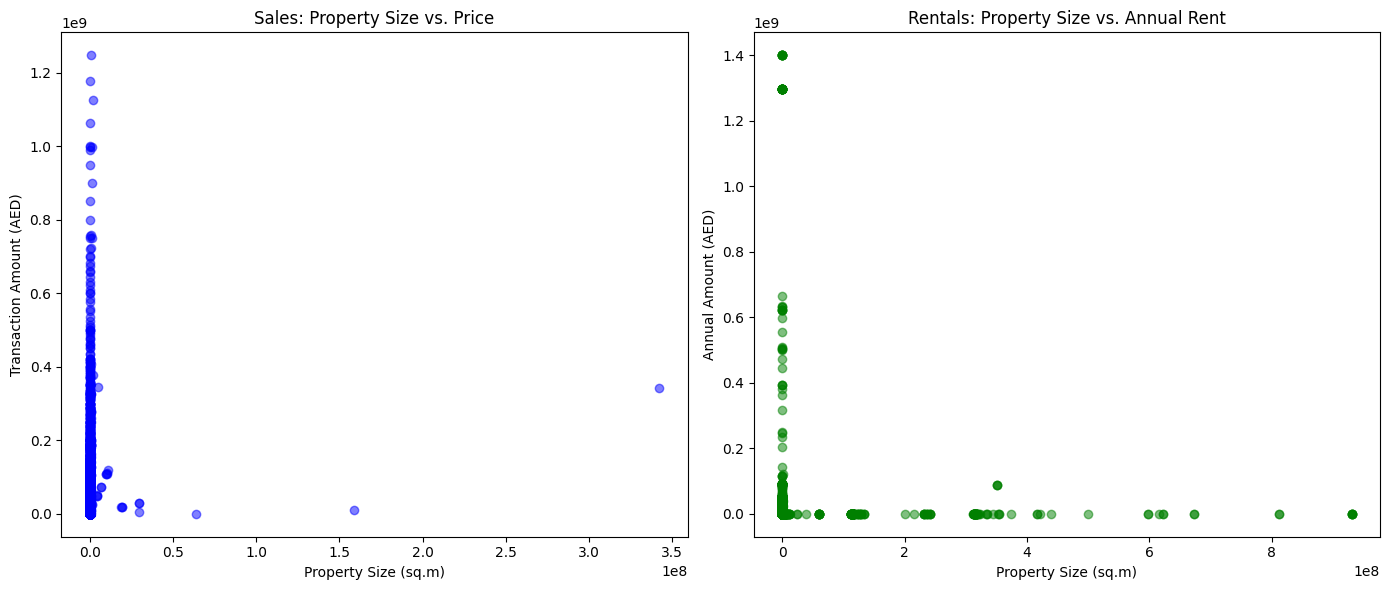

In [41]:
# Scatter plots for property size vs. price
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(sales_transactions_df['Property Size (sq.m)'], sales_transactions_df['Amount'], alpha=0.5, color='blue')
ax[0].set_title('Sales: Property Size vs. Price')
ax[0].set_xlabel('Property Size (sq.m)')
ax[0].set_ylabel('Transaction Amount (AED)')

ax[1].scatter(property_rental_transactions_df['Property Size (sq.m)'], property_rental_transactions_df['Annual Amount'], alpha=0.5, color='green')
ax[1].set_title('Rentals: Property Size vs. Annual Rent')
ax[1].set_xlabel('Property Size (sq.m)')
ax[1].set_ylabel('Annual Amount (AED)')

plt.tight_layout()
plt.show()


**Visualization 5: Temporal Trends in Transaction Volumes**
 - Objective: Compare the number of sales vs. rental transactions over time.

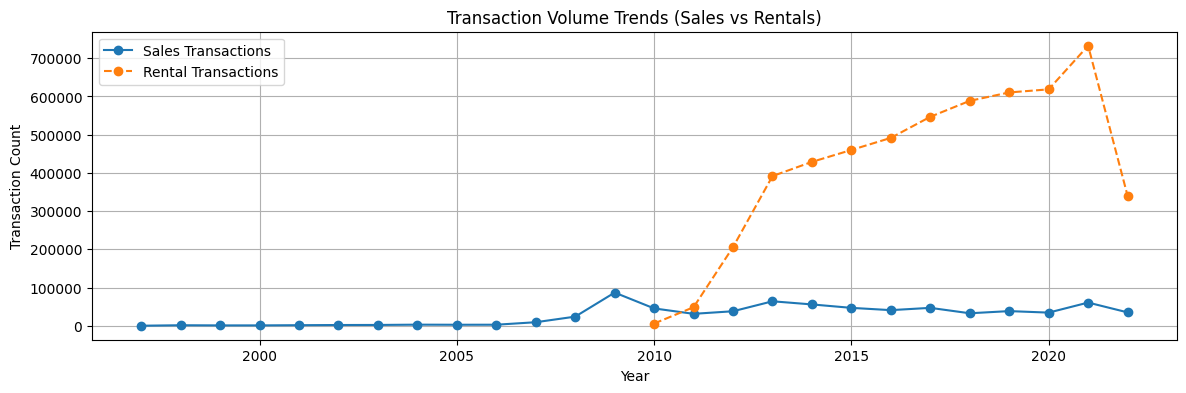

,Year,Sales Transactions,Rental Transactions
0,1997,56,0.0
1,1998,1309,0.0
2,1999,899,0.0
3,2000,922,0.0
4,2001,1440,0.0
5,2002,1909,0.0
6,2003,2071,0.0
7,2004,2841,0.0
8,2005,2596,0.0
9,2006,2691,0.0


In [42]:
# Count transactions per year
sales_volume = sales_transactions_df['Year'].value_counts().sort_index()
rental_volume = property_rental_transactions_df['Year'].value_counts().sort_index()

# pd.DataFrame(data=[sales_volume,rental_volume]).T
transaction_trends_df = pd.DataFrame({
    'Sales Transactions': sales_volume,
    'Rental Transactions': rental_volume
}).fillna(0)

transaction_trends_df.reset_index(inplace=True)
transaction_trends_df.rename(columns={'index': 'Year'}, inplace=True)

# Plot transaction counts
plt.figure(figsize=(14, 4))
plt.plot(sales_volume, label='Sales Transactions', marker='o')
plt.plot(rental_volume, label='Rental Transactions', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Volume Trends (Sales vs Rentals)')
plt.legend()
plt.grid()
plt.show()


transaction_trends_df


**Observations and Analysis**

1. **Transaction Growth Patterns**:
   - Early Years (1997–2009): Sales dominate, with significant growth starting in 2007, possibly driven by Dubai's property boom.
   - Rentals become visible in 2010, with steady and rapid growth through 2021, indicating increasing demand for rental properties.

2. **Peak and Decline**:
   - **Sales**: A notable peak occurs in 2009 (86,781 transactions), followed by a decline post-2014, possibly due to market saturation or regulatory impacts.
   - **Rentals**: Show consistent growth, peaking in 2021 with 710,876 transactions, reflecting a high demand for rentals post-pandemic.

3. **Post-2021 Trends**:
   - Both sales and rentals show a decline in 2022. Is this tied to economic policy changes or shifting buyer/renter preferences?

4. **Comparative Dominance**:
   - Sales led the market until 2010, after which rentals dominated, suggesting a major shift in market dynamics.

---


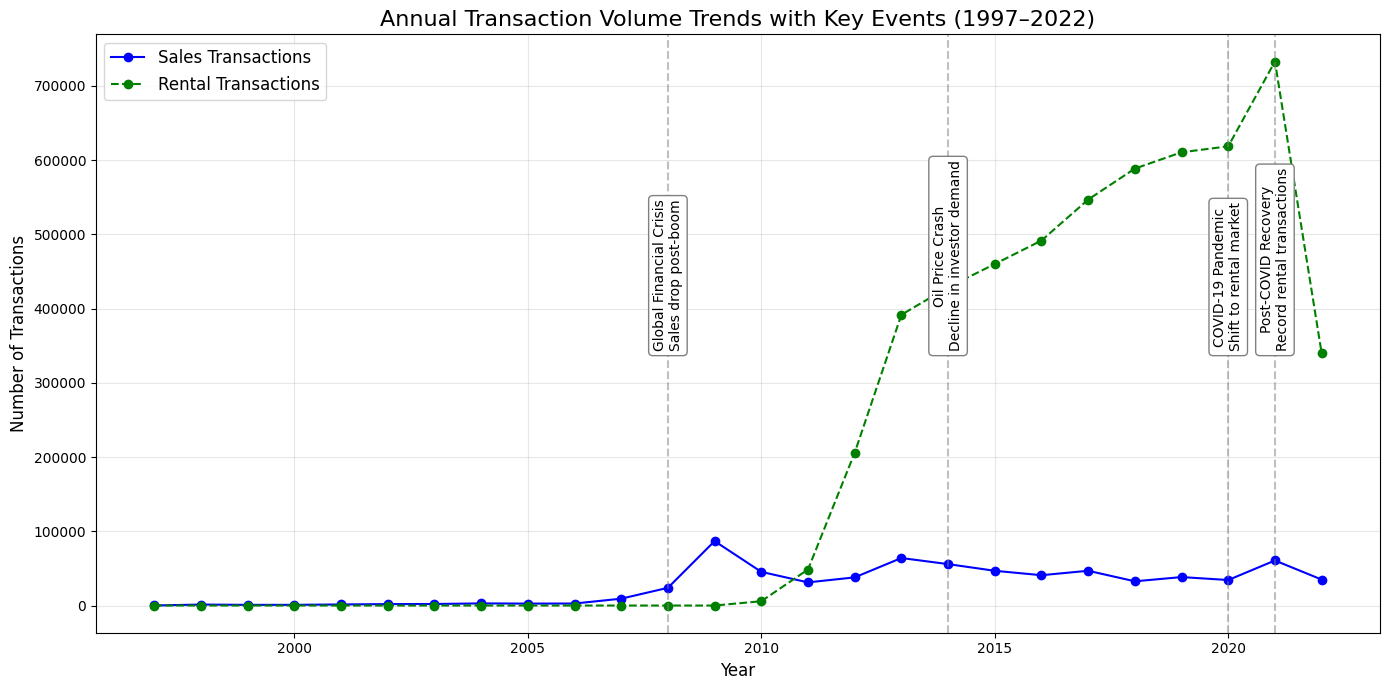

In [43]:
# Plot the trends for sales and rental transactions
plt.figure(figsize=(14, 7))

# Sales Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Rental Transactions Trend
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate Key Historical Events
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.45, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add labels, title, and legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Key Observations to Add

- 1997–2009: Sales dominated as Dubai emerged as a global real estate hub. The Global Financial Crisis in 2008 ended this boom, with sales dropping sharply.
- 2010–2021: Rentals gained traction, reflecting Dubai's evolving role as an expatriate-friendly city with a transient population.
- 2020–2021: COVID-19 disrupted the market, leading to temporary declines in sales and rental transactions. A post-pandemic recovery in 2021 saw record rental transactions.
- 2022 Decline: Both sales and rentals show a drop. Hypotheses include economic recalibration, regulatory changes, or a temporary market adjustment.

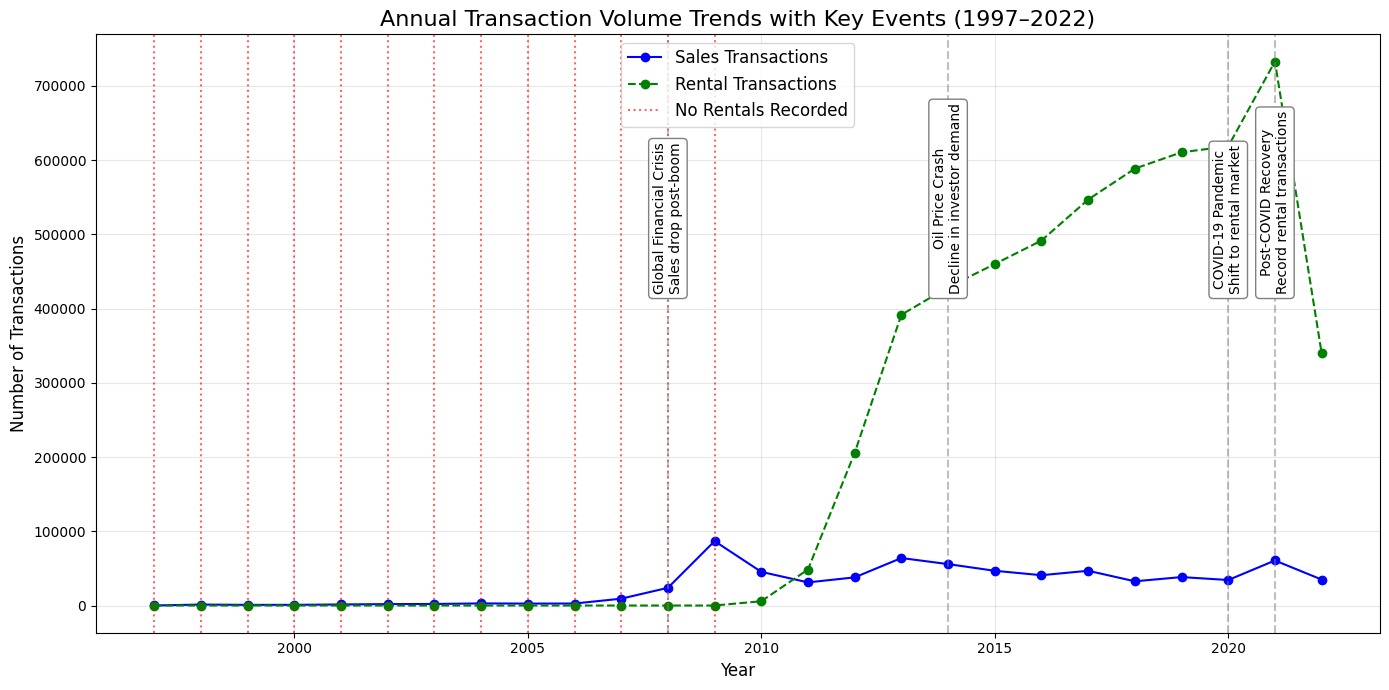

In [44]:
# Highlight years with zero rental data (1997–2009)
zero_rental_years = (transaction_trends_df['Rental Transactions'] == 0)

plt.figure(figsize=(14, 7))

# Plot Sales Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Sales Transactions'], 
    label='Sales Transactions', marker='o', linestyle='-', color='blue'
)

# Plot Rental Transactions
plt.plot(
    transaction_trends_df['Year'], 
    transaction_trends_df['Rental Transactions'], 
    label='Rental Transactions', marker='o', linestyle='--', color='green'
)

# Annotate years with zero rentals
for idx in transaction_trends_df[zero_rental_years].index:
    plt.axvline(
        x=transaction_trends_df.loc[idx, 'Year'], 
        color='red', 
        linestyle=':', 
        alpha=0.6, 
        label='No Rentals Recorded' if idx == 0 else ""
    )

# Add other annotations (as earlier)
annotations = {
    2008: "Global Financial Crisis\nSales drop post-boom",
    2014: "Oil Price Crash\nDecline in investor demand",
    2020: "COVID-19 Pandemic\nShift to rental market",
    2021: "Post-COVID Recovery\nRecord rental transactions",
}

for year, text in annotations.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(
        x=year, 
        y=plt.ylim()[1] * 0.55, 
        s=text, 
        color='black', 
        fontsize=10, 
        rotation=90, 
        ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white')
    )

# Add title, labels, legend
plt.title('Annual Transaction Volume Trends with Key Events (1997–2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Subcategory Analysis**
1. Rental Data by Property Type:

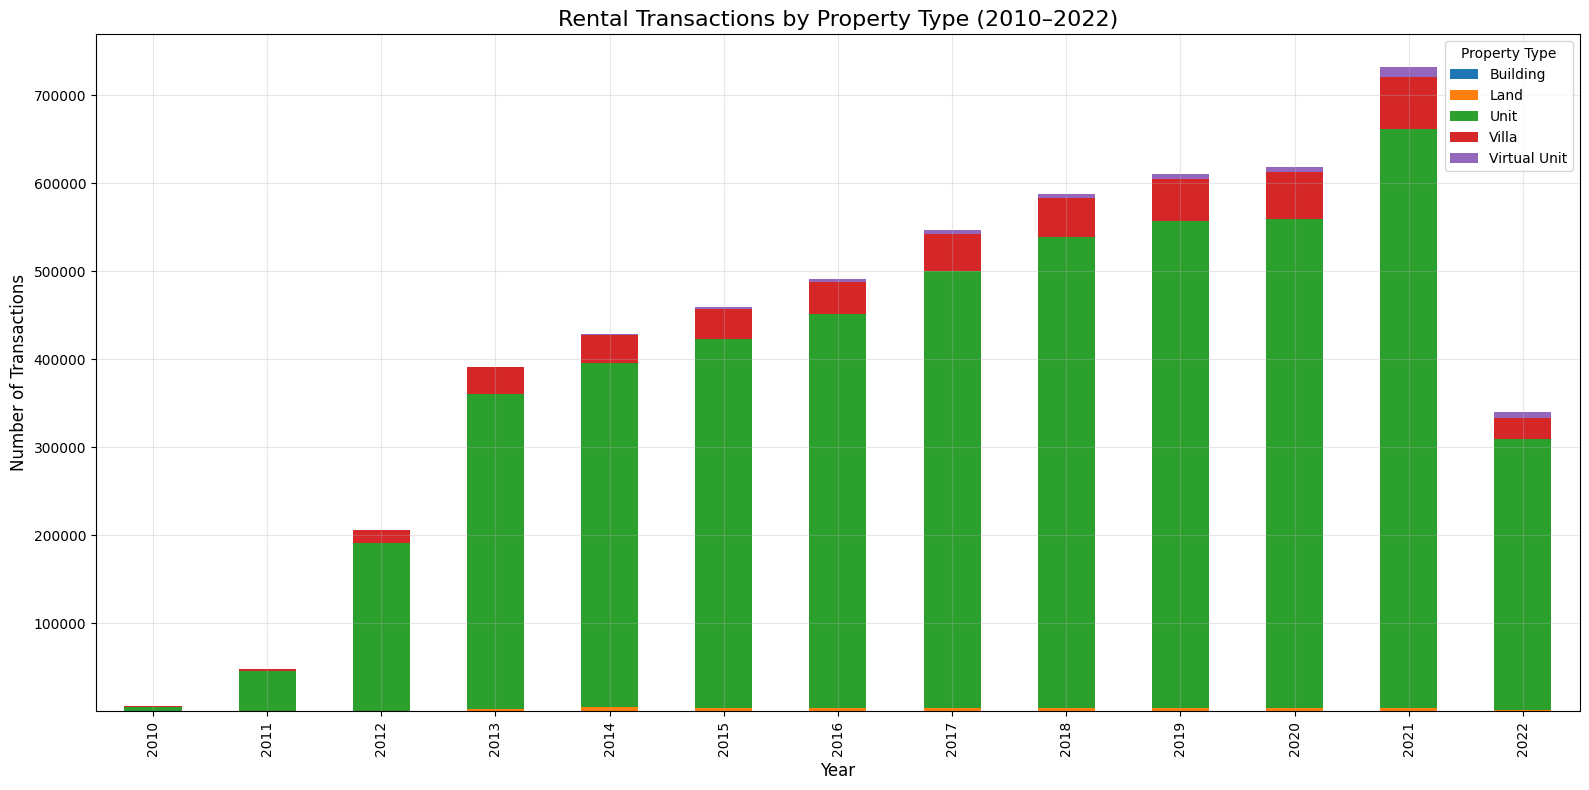

In [45]:
# Group by property type and year for rentals
rental_subcategories = (
    property_rental_transactions_df.groupby(['Year', 'Property Type'],observed=False)['Ejari Contract Number']
    .count()
    .unstack()
    .fillna(0)
)

rental_subcategories.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title("Rental Transactions by Property Type (2010–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Property Type", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


2. Sales Data by Freehold Type:

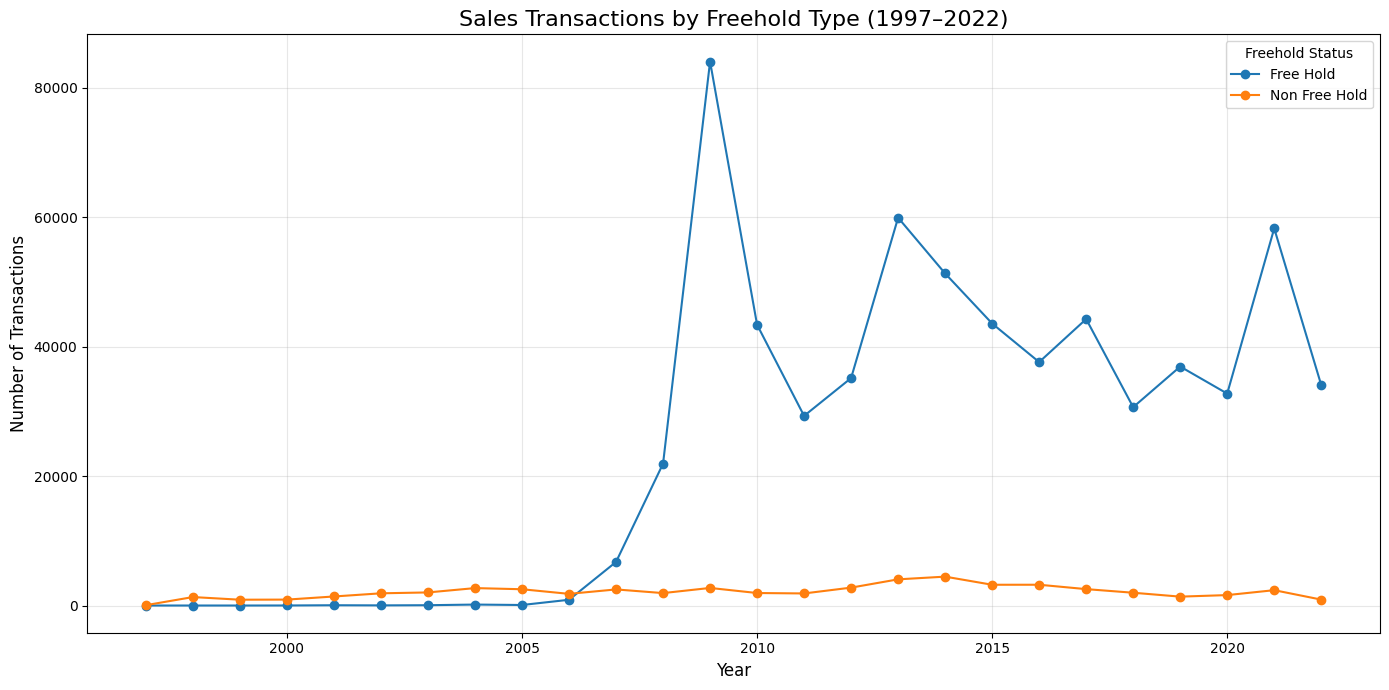

In [46]:
# Group by year and freehold status for sales
sales_freehold_analysis = (
    sales_transactions_df.groupby(['Year', 'Is Free Hold?'], observed=False)['Transaction Number']
    .count()
    .unstack()
    .fillna(0)
)

sales_freehold_analysis.plot(kind='line', figsize=(14, 7), marker='o')
plt.title("Sales Transactions by Freehold Type (1997–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend(title="Freehold Status", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 4. Micro-economics Factors Influence

**Integrating Macroeconomic Factors into the Analysis**  

We can leverage the additional datasets provided to analyze how macroeconomic factors (GDP, tourism, population, currency strength, etc.) influence Dubai's real estate market:  

---

**Steps for Analysis**  

**1. Data Preparation**  
- **Align Time Periods**: Ensure all datasets (macroeconomic indicators, sales, rentals) are aligned by year or quarter for consistent comparisons.  
- **Aggregate Transactions**: Summarize the sales and rental transaction data at the same time granularity (e.g., yearly, quarterly).  

**2. Feature Engineering**  
- **GDP Growth**: Calculate GDP growth rates (constant and current) to understand economic trends.  
- **Tourism Growth**: Use indicators like the number of visitors, average stay duration, and region-wise ratings.  
- **Population Growth**: Analyze population estimates to understand demand drivers.  
- **Currency Strength**: Assess AED exchange rate trends for insights into investor behavior.  
- **Energy Metrics**: Include oil prices (if available) as a proxy for broader economic conditions.  

**3. Visualization and Correlation Analysis**  
- **Trend Analysis**: Plot macroeconomic factors alongside real estate transactions to observe relationships.  
- **Correlation Matrix**: Compute correlations between macroeconomic factors and transaction volumes.  


---


#### 4a.  Summary Statistics Microeconomics Factors

- GDP Quarterly Constant Prices Summary Stats

In [47]:
gdp_quarterly_constant_df.head(2)

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2012,6029.460989,0
1,FCSA:DF_QGDP_CON(1.8.0),AE,Q,MILAED,FCSC,ELE,Q1,CON,VAL,2013,6516.431786,0


In [48]:
num_features = gdp_quarterly_constant_df.select_dtypes(include="number").columns
gdp_quarterly_constant_df[num_features]

,TIME_PERIOD,OBS_VALUE,DECIMALS
0,2012,6029.460989,0
1,2013,6516.431786,0
2,2014,7282.519220,0
3,2015,5581.622819,0
4,2016,6507.318473,0
...,...,...,...
1915,2019,-0.492972,1
1916,2020,-9.141739,1
1917,2021,3.444517,1
1918,2022,9.629000,1


In [49]:
plots.compute_summary_statistics(gdp_quarterly_constant_df)



--- Summary Statistics ---
              count          mean           std          min          25%          50%          75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.00000    2024.0000
OBS_VALUE    1920.0  33871.691457  84704.603183   -50.998461     4.703341  1719.233685  19854.47116  449633.4527
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.00000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- GDP Quarterly Current Prices Summary Stats

In [50]:
gdp_quarterly_current_df.head(2)

,DATAFLOW,REF_AREA,FREQ,UNIT_MEASURE,SOURCE_DETAIL,MEASURE,QUARTER,QGDP_SYS,QGDP_UNIT,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2013,4.355075,1
1,FCSA:DF_QGDP_CUR(1.8.0),AE,Q,PERCENT,FCSC,NFC,Q3,CUR,GWTH_RATE,2014,4.394883,1


In [51]:
plots.compute_summary_statistics(gdp_quarterly_current_df)


--- Summary Statistics ---
              count          mean           std          min          25%          50%           75%          max
TIME_PERIOD  1920.0   2018.000000      3.488984  2012.000000  2015.000000  2018.000000   2021.000000    2024.0000
OBS_VALUE    1920.0  35877.089588  89844.504067   -66.978072     5.387548  2087.586568  21518.734995  506021.1521
DECIMALS     1920.0      0.479167      0.499696     0.000000     0.000000     0.000000      1.000000       1.0000

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
REF_AREA                      0.0
FREQ                          0.0
UNIT_MEASURE                  0.0
SOURCE_DETAIL                 0.0
MEASURE                       0.0
QUARTER                       0.0
QGDP_SYS                      0.0
QGDP_UNIT                     0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


- Tourism Indicators Summary Stats

In [52]:

tourism_indicators_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


In [53]:
plots.compute_summary_statistics(tourism_indicators_df)


--- Summary Statistics ---
             count          mean           std     min       25%        50%         75%           max
TIME_PERIOD  201.0  2.004488e+03  1.292482e+01  1976.0    1993.0     2003.0      2017.0  2.022000e+03
OBS_VALUE    201.0  3.037453e+09  7.852964e+09     2.0  298504.0  2108739.0  73854531.0  3.780222e+10

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


In [54]:
tourism_indicators_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1985,318484.0
1,FCSA:DF_HOT_INDICATOR(4.3.0),H,AED,AE,A,_Z,RR,_Z,FCSC,1986,298504.0


- Tourism Regions Summary Stats

In [55]:
tourism_regions_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2015,399751
1,FCSA:DF_GUEST_REGION(4.3.0),H,NUMBER,AE,A,_Z,GHH,OC,FCSC,2016,380717


In [56]:
plots.compute_summary_statistics(tourism_regions_df)


--- Summary Statistics ---
             count          mean           std     min       25%       50%        75%         max
TIME_PERIOD  664.0  2.001488e+03  1.312832e+01  1979.0    1990.0    2000.5     2014.0      2022.0
OBS_VALUE    664.0  3.906856e+06  9.996992e+06  1628.0  221386.5  835121.0  3155793.0  91461979.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Tourism Ratings Summary Stats

In [57]:
tourism_ratings_df.head(2)

,DATAFLOW,MEASURE,UNIT_MEASURE,REF_AREA,FREQ,H_TYPE,H_INDICATOR,GUEST_REGION,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE
0,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2014,1027
1,FCSA:DF_HOT_TYPE(4.3.0),H,NUMBER,AE,A,_T,EST,_Z,FCSC,2015,1056


In [58]:
plots.compute_summary_statistics(tourism_ratings_df)


--- Summary Statistics ---
             count      mean           std     min      25%     50%      75%       max
TIME_PERIOD  400.0   2001.28     14.737183  1975.0  1988.00  2001.0   2016.0    2022.0
OBS_VALUE    400.0  14942.34  34407.242885     3.0   106.75   468.0  10305.5  203948.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
H_TYPE                        0.0
H_INDICATOR                   0.0
GUEST_REGION                  0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Estimates Summary Stats

In [59]:
plots.compute_summary_statistics(pop_estimates_df)


--- Summary Statistics ---
             count          mean           std      min       25%        50%        75%         max
TIME_PERIOD  162.0  1.996500e+03  1.563411e+01   1970.0    1983.0     1996.5     2010.0      2023.0
OBS_VALUE    162.0  2.646262e+06  2.594193e+06  86318.0  745767.0  1704024.5  3543425.0  10678556.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0


- Population Indicators Summary Stats

In [ ]:
pop_indicators_df.head(2)

,DATAFLOW,MEASURE,POP_IND,UNIT_MEASURE,REF_AREA,FREQ,GENDER,SOURCE_DETAIL,TIME_PERIOD,OBS_VALUE,DECIMALS
0,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2019,31.3,1
1,FCSA:DF_POP_IND(2.7.0),POPIND,MED,YEARS,AE,A,_Z,FCSC,2020,32.8,1


In [61]:
plots.compute_summary_statistics(pop_indicators_df)


--- Summary Statistics ---
             count         mean        std       min       25%      50%       75%     max
TIME_PERIOD   18.0  2019.611111   0.501631  2019.000  2019.000  2020.00  2020.000  2020.0
OBS_VALUE     18.0    67.997056  66.254497     2.057    20.885    33.15    81.025   229.9
DECIMALS      18.0     1.000000   0.000000     1.000     1.000     1.00     1.000     1.0

--- Missing Value Statistics ---
               Missing Percentage
DATAFLOW                      0.0
MEASURE                       0.0
POP_IND                       0.0
UNIT_MEASURE                  0.0
REF_AREA                      0.0
FREQ                          0.0
GENDER                        0.0
SOURCE_DETAIL                 0.0
TIME_PERIOD                   0.0
OBS_VALUE                     0.0
DECIMALS                      0.0


In [62]:
gdp_quarterly_current_df[['TIME_PERIOD','OBS_VALUE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  1920 non-null   int64  
 1   OBS_VALUE    1920 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.1 KB


In [63]:
transaction_trends_df.head(2)

,Year,Sales Transactions,Rental Transactions
0,1997,56,0.0
1,1998,1309,0.0


In [64]:
# Aggregate transactions data to yearly
transactions_yearly = transaction_trends_df.groupby('Year')[['Sales Transactions', 'Rental Transactions']].sum()


In [65]:
print("gdp_quarterly_constant_df shape:", gdp_quarterly_constant_df.shape)
print("gdp_quarterly_current_df shape:", gdp_quarterly_current_df.shape)
print("tourism_indicators shape:", tourism_indicators_df.shape)
print("tourism_regions_df shape:", tourism_regions_df.shape)
print("tourism_ratings_df shape:", tourism_ratings_df.shape)
print("pop_estimates_df shape", pop_estimates_df.shape )
print("pop_indicators_df shape", pop_indicators_df.shape)
print("currency_strength_df shape:",currency_strength_df.shape)


gdp_quarterly_constant_df shape: (1920, 12)
gdp_quarterly_current_df shape: (1920, 12)
tourism_indicators shape: (201, 11)
tourism_regions_df shape: (664, 11)
tourism_ratings_df shape: (400, 11)
pop_estimates_df shape (162, 10)
pop_indicators_df shape (18, 11)
currency_strength_df shape: (5468, 8)


In [66]:
pop_estimates_df['GENDER'].unique()

array(['M', 'F', '_T'], dtype=object)

In [67]:
# Filter data for male and female populations
male_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'M']
female_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == 'F']
other_pop_df = pop_estimates_df[pop_estimates_df['GENDER'] == '_T']


In [68]:
currency_strength_df['Date'].describe()

count           5468
unique          5468
top       2003-12-01
freq               1
Name: Date, dtype: object

In [69]:
gdp_constant_growth = (
    gdp_quarterly_constant_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()  # Average quarterly data to get annual GDP
    .reset_index()
    .rename(columns={'OBS_VALUE': 'GDP_constant'})
)
gdp_current_growth = (
    gdp_quarterly_current_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .mean()
    .reset_index()
    .rename(columns={'OBS_VALUE': 'GDP_current'})
)


In [70]:
total_population_df = (
    pop_estimates_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Sum for total population
    .reset_index()
    .rename(columns={'OBS_VALUE': 'total_population'})
)

male_pop_by_year = (
male_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_female'})
)

female_pop_by_year = (
female_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_male'})
)

other_pop_by_year = (
other_pop_df.groupby('TIME_PERIOD')['OBS_VALUE']
.sum()
.reset_index()
.rename(columns={'OBS_VALUE':'total_population_others'})
)




In [71]:
pop_estimates_df[['TIME_PERIOD','OBS_VALUE']].describe()

,TIME_PERIOD,OBS_VALUE
count,162.000000,1.620000e+02
mean,1996.500000,2.646262e+06
std,15.634112,2.594193e+06
min,1970.000000,8.631800e+04
25%,1983.000000,7.457670e+05
50%,1996.500000,1.704024e+06
75%,2010.000000,3.543425e+06
max,2023.000000,1.067856e+07


In [72]:
tourism_df = (
    tourism_regions_df.groupby('TIME_PERIOD')['OBS_VALUE']
    .sum()  # Aggregate total tourism indicators
    .reset_index()
    .rename(columns={'OBS_VALUE': 'tourism_guests'})
)

In [73]:
currency_strength_df['Date'] = pd.to_datetime(currency_strength_df['Date'])
currency_strength_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       5468 non-null   float64       
 1   High       5468 non-null   float64       
 2   Low        5468 non-null   float64       
 3   Close      5468 non-null   float64       
 4   Adj Close  5468 non-null   float64       
 5   Volume     5468 non-null   int64         
 6   Date       5468 non-null   datetime64[ns]
 7   Return     5467 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 341.9 KB


In [74]:
currency_df = (
    currency_strength_df.groupby(currency_strength_df['Date'].dt.year)['Close']
    .mean()  # Average exchange rate per year
    .reset_index()
    .rename(columns={'Close': 'currency_strength', 'Date': 'Year_Currency'})
)

In [75]:
aggregated_macro_df = (
    gdp_constant_growth.merge(gdp_current_growth, on='TIME_PERIOD', how='outer')
    .merge(total_population_df, on='TIME_PERIOD', how='outer')
    .merge(male_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(female_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(other_pop_by_year, on='TIME_PERIOD', how='outer')
    .merge(tourism_df, on='TIME_PERIOD', how='outer')
    .merge(currency_df, left_on='TIME_PERIOD', right_on='Year_Currency', how='outer')
    .rename(columns={'TIME_PERIOD': 'Year'})
)


In [76]:
# Fill missing values using forward fill, interpolation, and backfill where appropriate.
aggregated_macro_df['GDP_constant'] = aggregated_macro_df['GDP_constant'].fillna(method='ffill')
aggregated_macro_df['GDP_current'] = aggregated_macro_df['GDP_current'].fillna(method='ffill')
aggregated_macro_df['total_population'] = aggregated_macro_df['total_population'].interpolate(method='linear')
aggregated_macro_df['total_population_others'] = aggregated_macro_df['total_population_others'].interpolate(method='linear')
aggregated_macro_df['total_population_male'] = aggregated_macro_df['total_population_male'].interpolate(method='linear')
aggregated_macro_df['total_population_female'] = aggregated_macro_df['total_population_female'].interpolate(method='linear')
# aggregated_macro_df['median_age'] = aggregated_macro_df['median_age'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['tourism_guests'] = aggregated_macro_df['tourism_guests'].fillna(method='ffill').fillna(method='bfill')
aggregated_macro_df['currency_strength'] = aggregated_macro_df['currency_strength'].fillna(method='ffill').fillna(method='bfill')





/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_26060/2624863502.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['GDP_constant'] = aggregated_macro_df['GDP_constant'].fillna(method='ffill')
/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_26060/2624863502.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['GDP_current'] = aggregated_macro_df['GDP_current'].fillna(method='ffill')
/var/folders/l6/vts3rj213910_pfyglhvktx00000gn/T/ipykernel_26060/2624863502.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aggregated_macro_df['tourism_guests'] = aggregated_macro_df['tourism_guests'].fillna(method='ffill').fillna(method='bfill')
/var/folders/l6/vts3rj213910_pfyg

In [77]:
# Subset data for correlation analysis
correlation_subset = aggregated_macro_df[[
    'GDP_constant', 'GDP_current', 'total_population','total_population_male',
    'total_population_female','total_population_others', 'tourism_guests', 'currency_strength'
]].dropna()

# Compute correlation matrix
correlation_matrix = correlation_subset.corr()

print('Correlation Matrix:')
correlation_matrix


Correlation Matrix:


,GDP_constant,GDP_current,total_population,total_population_male,total_population_female,total_population_others,tourism_guests,currency_strength
GDP_constant,1.000000,0.967621,-0.510831,-0.525501,-0.501566,-0.510831,-0.350146,0.143250
GDP_current,0.967621,1.000000,-0.539016,-0.555227,-0.528841,-0.539016,-0.361329,0.164923
total_population,-0.510831,-0.539016,1.000000,0.997031,0.999120,1.000000,0.313715,-0.079179
total_population_male,-0.525501,-0.555227,0.997031,1.000000,0.992924,0.997031,0.337925,-0.118705
total_population_female,-0.501566,-0.528841,0.999120,0.992924,1.000000,0.999120,0.299746,-0.057455
total_population_others,-0.510831,-0.539016,1.000000,0.997031,0.999120,1.000000,0.313715,-0.079179
tourism_guests,-0.350146,-0.361329,0.313715,0.337925,0.299746,0.313715,1.000000,-0.193590
currency_strength,0.143250,0.164923,-0.079179,-0.118705,-0.057455,-0.079179,-0.193590,1.000000


In [78]:
# Derive new features
aggregated_macro_df['GDP_per_capita'] = aggregated_macro_df['GDP_constant'] / aggregated_macro_df['total_population']
aggregated_macro_df['Tourism_revenue_per_capita'] = aggregated_macro_df['tourism_guests'] / aggregated_macro_df['total_population']
aggregated_macro_df['Population_growth_rate'] = aggregated_macro_df['total_population'].pct_change()
aggregated_macro_df['Tourism_growth_rate'] = aggregated_macro_df['tourism_guests'].pct_change()

# Replace infinite and NaN values resulting from division
aggregated_macro_df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
aggregated_macro_df.fillna(0, inplace=True)


In [79]:
print("aggregated_macro_df shape:", aggregated_macro_df.shape)
aggregated_macro_df.head(2)

aggregated_macro_df shape: (55, 14)


,Year,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,Year_Currency,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,2012,52873.511891,62054.574318,15078614.0,4937649.0,2601658.0,7539307.0,94935056.0,2012.0,0.272322,0.003507,6.296007,0.000000,0.000000
1,2013,27721.548677,32356.549209,15693510.0,5129965.0,2716790.0,7846755.0,150029216.0,2013.0,0.272327,0.001766,9.559953,0.040779,0.580335


In [80]:
# aggregated_macro_df.isnull().mean() * 100
# aggregated_macro_df.duplicated().sum()
aggregated_macro_df[aggregated_macro_df.index.duplicated()]

,Year,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,Year_Currency,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate


In [81]:
aggregated_macro_df.drop(columns='Year_Currency', inplace=True)
# aggregated_macro_df

In [82]:
# Perform the merge again
merged_macro_transactions_df = pd.merge(
    transaction_trends_df,
    aggregated_macro_df,
    how='left',
    on='Year'
)



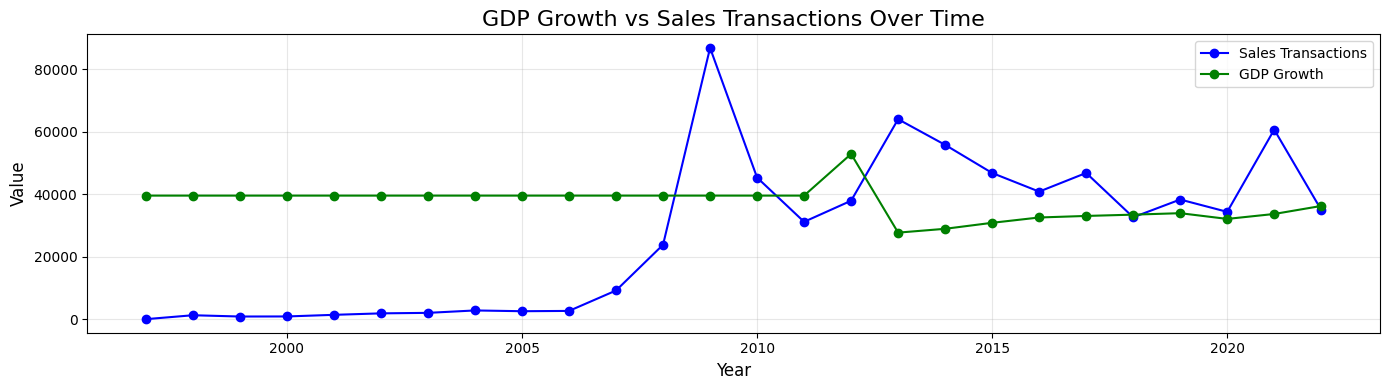

In [83]:

# Plot trends
plt.figure(figsize=(14, 4))
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['Sales Transactions'], label='Sales Transactions', color='blue', marker='o')
plt.plot(merged_macro_transactions_df['Year'], merged_macro_transactions_df['GDP_constant'], label='GDP Growth', color='green', marker='o')

# Add labels and legend
plt.title('GDP Growth vs Sales Transactions Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [84]:
merged_macro_transactions_df.columns

Index(['Year', 'Sales Transactions', 'Rental Transactions', 'GDP_constant',
       'GDP_current', 'total_population', 'total_population_female',
       'total_population_male', 'total_population_others', 'tourism_guests',
       'currency_strength', 'GDP_per_capita', 'Tourism_revenue_per_capita',
       'Population_growth_rate', 'Tourism_growth_rate'],
      dtype='object')

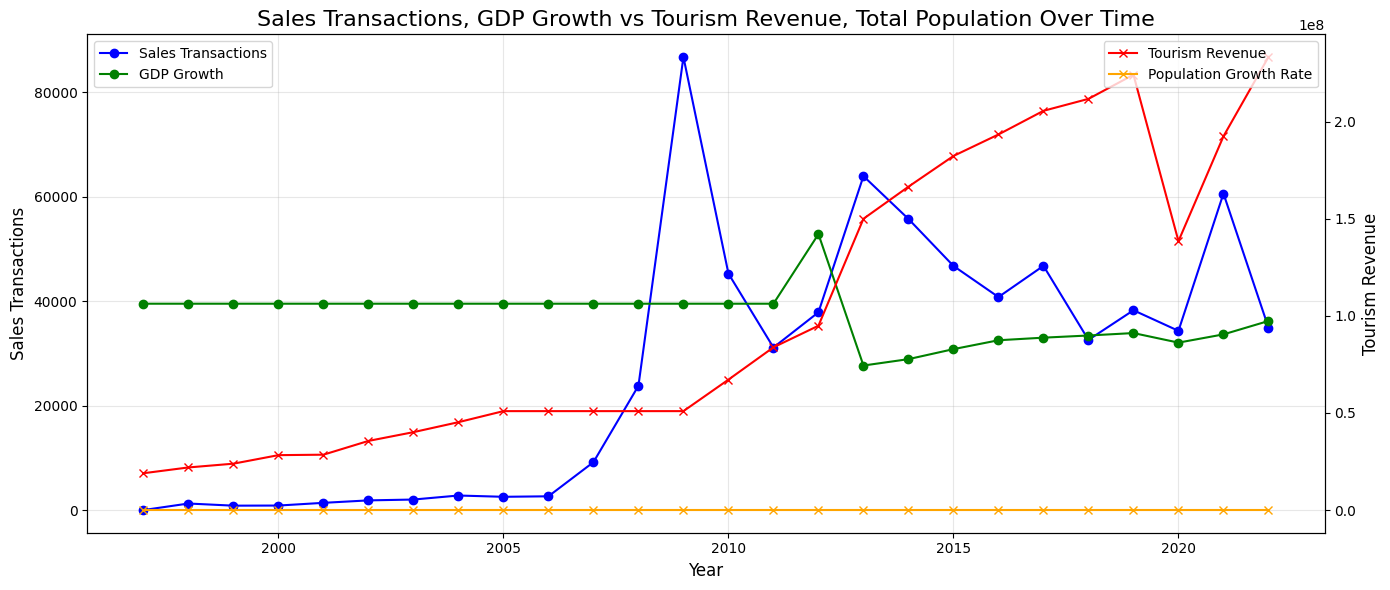

In [85]:

def plot_trends_with_two_y_axes(df, x_column, y1_column, y2_column, y3_column, y4_column, title, y1_label, y2_label, y3_label, y4_label):
    """
    Plot two features on the left y-axis and another two on the right y-axis.
    
    Parameters:
    - df: DataFrame containing the data
    - x_column: Column for the x-axis (usually 'Year')
    - y1_column: Column for the first feature on the left y-axis
    - y2_column: Column for the second feature on the left y-axis
    - y3_column: Column for the first feature on the right y-axis
    - y4_column: Column for the second feature on the right y-axis
    - title: Title of the plot
    - y1_label: Label for the first left y-axis
    - y2_label: Label for the second left y-axis
    - y3_label: Label for the first right y-axis
    - y4_label: Label for the second right y-axis
    """
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Left Y axis: y1_column and y2_column
    ax1.plot(df[x_column], df[y1_column], label=y1_label, color='blue', marker='o')
    ax1.plot(df[x_column], df[y2_column], label=y2_label, color='green', marker='o')
    
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel(y1_label, fontsize=12)
    ax1.legend(loc='upper left')
    ax1.grid(alpha=0.3)
    
    # Right Y axis: y3_column and y4_column
    ax2 = ax1.twinx()
    ax2.plot(df[x_column], df[y3_column], label=y3_label, color='red', marker='x')
    ax2.plot(df[x_column], df[y4_column], label=y4_label, color='orange', marker='x')
    
    ax2.set_ylabel(y3_label, fontsize=12)
    ax2.legend(loc='upper right')
    
    # Title and layout adjustments
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

plot_trends_with_two_y_axes(
    df=merged_macro_transactions_df,
    x_column='Year',
    y1_column='Sales Transactions',
    y2_column='GDP_constant',
    y3_column='tourism_guests',
    y4_column='Population_growth_rate',
    title='Sales Transactions, GDP Growth vs Tourism Revenue, Total Population Over Time',
    y1_label='Sales Transactions',
    y2_label='GDP Growth',
    y3_label='Tourism Revenue',
    y4_label='Population Growth Rate'
)


In [86]:
merged_macro_transactions_df.head(2)

,Year,Sales Transactions,Rental Transactions,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,1997,56,0.0,39555.666789,44201.158943,5457460.0,1823941.0,904789.0,2728730.0,18970378.0,0.272326,0.007248,3.476045,0.045094,-0.009493
1,1998,1309,0.0,39555.666789,44201.158943,5691510.0,1912678.0,933077.0,2845755.0,21949904.0,0.272326,0.006950,3.856605,0.042886,0.157062


### 5. Preprocessing the Real Estate Datasets

In [87]:
print('Parking Dtype for rentals:', property_rental_transactions_df['Parking'].dtype)
print('Parking Dtype for sales Before:', property_transactions_df['Parking'].dtype)

property_transactions_df['Parking'] = pd.to_numeric(property_transactions_df['Parking'], errors='coerce')

print('Parking Dtype for sales After:', property_transactions_df['Parking'].dtype)

Parking Dtype for rentals: float32
Parking Dtype for sales Before: object
Parking Dtype for sales After: float64


In [88]:
common_columns = set(property_rental_transactions_df.columns).intersection(set(property_transactions_df.columns))
print("Common columnsd for sales and rents:", common_columns)


Common columnsd for sales and rents: {'Nearest Landmark', 'Property Size (sq.m)', 'Property ID', 'Property Sub Type', 'Is Free Hold?', 'Year', 'Project', 'Property Type', 'Nearest Metro', 'Nearest Mall', 'Parking', 'Area', 'Usage'}


- `Examining the datasets before merge:`

   - Examining the unique elements and potential discrepancies in the common columns before merging datasets can provide critical insights, such as mismatched values, inconsistent data types, or potential conflicts:

In [89]:
def analyze_common_columns(df1, df2, common_columns):
    """
    Analyze common columns between two datasets for consistency.

    Args:
        df1 (pd.DataFrame): First dataset.
        df2 (pd.DataFrame): Second dataset.
        common_columns (set): Set of common columns to analyze.

    Returns:
        dict: Analysis report for each common column.
    """
    analysis_report = {}
    for col in common_columns:
        report = {
            "Column": col,
            "Unique in DF1": df1[col].nunique(),
            "Unique in DF2": df2[col].nunique(),
            "Intersection (Unique Values)": len(set(df1[col].unique()).intersection(set(df2[col].unique()))),
            "Unique in DF1 Only": len(set(df1[col].unique()) - set(df2[col].unique())),
            "Unique in DF2 Only": len(set(df2[col].unique()) - set(df1[col].unique())),
        }
        # Add additional summaries for numerical columns
        if pd.api.types.is_numeric_dtype(df1[col]) and pd.api.types.is_numeric_dtype(df2[col]):
            report.update({
                "DF1 Range": (df1[col].min(), df1[col].max()),
                "DF2 Range": (df2[col].min(), df2[col].max()),
            })
        
        analysis_report[col] = report
    
    return pd.DataFrame.from_dict(analysis_report, orient="index")

common_columns = set(property_rental_transactions_df.columns).intersection(set(property_transactions_df.columns))
analysis_report = analyze_common_columns(property_rental_transactions_df, property_transactions_df, common_columns)

analysis_report


,Column,Unique in DF1,Unique in DF2,Intersection (Unique Values),Unique in DF1 Only,Unique in DF2 Only,DF1 Range,DF2 Range
Nearest Landmark,Nearest Landmark,14,16,15,0,2,NaN,NaN
Property Size (sq.m),Property Size (sq.m),6603,72833,1112,5492,71722,"(0.0, 930091045.0)","(0.0, 342103430.8)"
Property ID,Property ID,1088523,507504,272068,816455,235436,"(-3, 5772905919)","(1458, 1260767412)"
Property Sub Type,Property Sub Type,71,47,15,57,33,NaN,NaN
Is Free Hold?,Is Free Hold?,2,2,2,0,0,NaN,NaN
Year,Year,13,28,13,0,15,"(2010, 2022)","(1995, 2022)"
Project,Project,1100,1608,987,114,622,NaN,NaN
Property Type,Property Type,5,3,3,2,0,NaN,NaN
Nearest Metro,Nearest Metro,56,58,57,0,2,NaN,NaN
Nearest Mall,Nearest Mall,5,7,6,0,2,NaN,NaN


**Observations**

 
**1. Property ID**
- **Large Discrepancy**: Only 272,068 unique IDs overlap between the two datasets, with over 1.05M unique to DF1 and DF2 combined.
- **Action**: Investigate the source of these IDs. If they represent distinct records, merging by ID could cause significant data loss.

**2. Is Free Hold?**
- **Perfect Match**: Both datasets have only two values, and these are consistent.
- **Action**: No immediate action is required unless there's a mismatch in definitions.

**3. Project**
- **Moderate Overlap**: 986 out of 1,100 in DF1 exist in DF2, but 622 projects in DF2 are not in DF1.
- **Action**: Align project names (e.g., case sensitivity or variations) to maximize overlap.

**4. Property Sub Type**
- **Significant Mismatch**: Only 14 out of 71 subtypes overlap. DF1 has 57 unique subtypes, while DF2 has 33.
- **Action**: Standardize property subtype categories to improve consistency before merging.

**5. Property Type**
- **Small Mismatch**: DF1 has two additional property types not in DF2.
- **Action**: Harmonize categories or create a mapping table for consistency.

**6. Parking**
- **Extreme Range in DF2**: Parking values range from -10 to over 311,000 in DF2, suggesting possible errors.
- **Action**: Investigate negative values and outliers for data quality issues.

**7. Nearest Metro**
- **Minor Difference**: DF2 has two additional unique metro stations.
- **Action**: Validate these values and ensure consistent station naming.

**8. Year**
- **Additional Historical Data in DF2**: DF2 includes data from 1995–2009, which is absent in DF1.
- **Action**: If years represent different data capture periods, consider handling these separately in analysis.

**9. Usage**
- **Low Overlap**: DF2 only contains two usage categories, while DF1 has 10.
- **Action**: Confirm and align usage definitions or explore merging.

**10. Area**
- **Significant Mismatch**: DF2 has 170 additional areas, indicating potential regional discrepancies.
- **Action**: Map areas to a common naming convention or group by higher-level regions.

**11. Property Size (sq.m)**
- **Extreme Outliers in Both**: Values in both datasets span unrealistic ranges, especially in DF1 (up to ~930M sq.m).
- **Action**: Investigate and filter extreme values before merging.

**12. Nearest Landmark & Nearest Mall**
- **Minor Differences**: DF2 has two additional landmarks and malls.
- **Action**: Review these values and ensure consistent naming conventions.

---

1. **Categorical Alignment**:
   - Standardize naming conventions (e.g., "Property Sub Type," "Area," "Nearest Metro").
   - Use tools like **fuzzy matching** or create mapping dictionaries.

2. **Outlier Handling**:
   - Investigate columns with extreme ranges (e.g., "Parking," "Property Size (sq.m)").
   - Apply thresholds or domain knowledge to filter anomalies.

3. **Data Augmentation**:
   - For features like "Year," decide whether older data (from DF2) is necessary for analysis or should be excluded.

4. **Validation Post-Merge**:
   - After merging, validate the dataset to ensure no unexpected loss or duplication of records.

In [90]:
from fuzzywuzzy import fuzz, process  # For fuzzy matching

# Define columns to analyze
categorical_columns = [
    "Project", "Property Sub Type", "Property Type", "Usage", 
    "Nearest Metro", "Nearest Mall", "Nearest Landmark", "Area"
]

# Function to normalize text
def normalize_text(value):
    if isinstance(value, str):
        return value.lower().strip()
    return value

# Compare and normalize unique values for each column
unique_value_analysis = {}

for col in categorical_columns:
    # Normalize text in both datasets
    df1_values = set(property_rental_transactions_df[col].dropna().map(normalize_text).unique())
    df2_values = set(property_transactions_df[col].dropna().map(normalize_text).unique())
    
    # Find intersection and differences
    common_values = df1_values.intersection(df2_values)
    unique_to_df1 = df1_values - df2_values
    unique_to_df2 = df2_values - df1_values
    
    # Use fuzzy matching for near matches (if any unique values are found)
    fuzzy_matches = {
        value: process.extractOne(value, df2_values, scorer=fuzz.token_sort_ratio)
        for value in unique_to_df1
    }

    # Store results
    unique_value_analysis[col] = {
        "Unique in DF1": len(df1_values),
        "Unique in DF2": len(df2_values),
        "Common": len(common_values),
        "Unique to DF1": len(unique_to_df1),
        "Unique to DF2": len(unique_to_df2),
        "Fuzzy Matches": {k: v for k, v in fuzzy_matches.items() if v[1] > 80},  # Threshold 80%
    }


analysis_df = pd.DataFrame.from_dict(unique_value_analysis, orient="index")
analysis_df


,Unique in DF1,Unique in DF2,Common,Unique to DF1,Unique to DF2,Fuzzy Matches
Project,1100,1607,986,114,621,"{'park towers': ('sparkle towers', 88), 'share..."
Property Sub Type,71,47,15,56,32,"{'labor camps': ('labor camp', 95), 'hotel apa..."
Property Type,5,3,3,2,0,{}
Usage,10,2,2,8,0,{}
Nearest Metro,56,58,56,0,2,{}
Nearest Mall,5,7,5,0,2,{}
Nearest Landmark,14,16,14,0,2,{}
Area,216,366,203,13,163,"{'al thanyah first': ('al thanyah fifth', 88),..."


In [91]:
import pandas as pd
from rapidfuzz import process

# Define fuzzy match function using rapidfuzz
def fuzzy_match_column(value, df2_column, threshold=80):
    value = str(value)  # Ensure the value is treated as a string
    best_match, score, _ = process.extractOne(value, df2_column.unique())  # Extract three values: match, score, and index
    if score >= threshold:
        return value, best_match, score
    return None  # If no match found above the threshold

# Function to apply fuzzy matching for each unique value in a column
def fuzzy_match_for_column(df1_column, df2_column, threshold=80, sample_size=None):
    if sample_size:
        df1_column = df1_column.sample(sample_size, random_state=42)  # Sample a subset for faster processing
    matches = []
    for value in df1_column.unique():
        result = fuzzy_match_column(value, df2_column, threshold)
        if result:
            matches.append(result)
    return matches

column = 'Area' 
df1_column = property_rental_transactions_df[column].astype(str)  # Ensure it's a string column
df2_column = property_transactions_df[column].astype(str)  # Ensure it's a string column

# Apply fuzzy matching
fuzzy_results = fuzzy_match_for_column(df1_column, df2_column, sample_size=5000)  # Adjust sample size for faster processing

# Display the results
print(f"Fuzzy Matches for {column}:")
fuzzy_results

# # If you need to save the results, you can save them to a CSV file
# fuzzy_matches_df = pd.DataFrame(fuzzy_results, columns=['DF1_Value', 'DF2_Best_Match', 'Score'])
# fuzzy_matches_df.to_csv(f"fuzzy_matches_{column}.csv", index=False)


Fuzzy Matches for Area:


[('Al Garhoud', 'Al Garhoud', 100.0),
 ('Al Warsan First', 'Al Warsan First', 100.0),
 ('Naif', 'Naif', 100.0),
 ('Mirdif', 'Mirdif', 100.0),
 ('Al Rega', 'Al Rega', 100.0),
 ('Al Hebiah First', 'Al Hebiah First', 100.0),
 ('Al Barsha First', 'Al Barsha First', 100.0),
 ('Al Nahda Second', 'Al Nahda Second', 100.0),
 ('Muhaisanah Second', 'Muhaisanah Second', 100.0),
 ('Al Qusais First', 'Al Qusais First', 100.0),
 ('Al Kheeran', 'Al Kheeran', 100.0),
 ('Mankhool', 'Mankhool', 100.0),
 ('Al Hamriya', 'Al Hamriya', 100.0),
 ('Oud Metha', 'Oud Metha', 100.0),
 ('Al Karama', 'Al Karama', 100.0),
 ('Jabal Ali Industrial First', 'Jabal Ali Industrial First', 100.0),
 ('Hor Al Anz', 'Hor Al Anz', 100.0),
 ('Al Goze Third', 'Al Goze Third', 100.0),
 ('Jabal Ali First', 'Jabal Ali First', 100.0),
 ('Al Goze Industrial Second', 'Al Goze Industrial Second', 100.0),
 ('Marsa Dubai', 'Marsa Dubai', 100.0),
 ('Business Bay', 'Business Bay', 100.0),
 ('Al Raffa', 'Al Raffa', 100.0),
 ('Al Rashidiya'

In [92]:
column = 'Property Sub Type' 
df1_column = property_rental_transactions_df[column].astype(str)  # Ensure it's a string column
df2_column = property_transactions_df[column].astype(str)  # Ensure it's a string column

# Apply fuzzy matching
fuzzy_results = fuzzy_match_for_column(df1_column, df2_column, sample_size=5000)  # Adjust sample size for faster processing

# Display the results
print(f"Fuzzy Matches for {column}:")
fuzzy_results

Fuzzy Matches for Property Sub Type:


[('Office', 'Office', 100.0),
 ('Flat', 'Flat', 100.0),
 ('Villa', 'Villa', 100.0),
 ('Labor Camps', 'Labor Camp', 95.23809523809523),
 ('Shop', 'Shop', 100.0),
 ('nan', 'nan', 100.0),
 ('Complex Villas', 'Villa', 90.0),
 ('Warehouse', 'Warehouse', 100.0),
 ('Hotel apartments', 'Hotel Apartment', 90.32258064516128),
 ('Hotel', 'Hotel', 100.0),
 ('Clinic', 'Clinic', 100.0),
 ('Parking', 'Parking', 100.0),
 ('Storage', 'Store', 83.33333333333334),
 ('Open Land', 'Land', 90.0),
 ('School', 'School', 100.0),
 ('Store', 'Store', 100.0),
 ('Complex Warehouse', 'Warehouse', 90.0),
 ('Building', 'Building', 100.0),
 ('Workshop', 'Workshop', 100.0),
 ('Warehouse complex', 'Warehouse', 90.0)]

In [93]:
property_transactions_df['Transaction Date'].describe()

count                           995975
mean     2015-01-18 13:58:10.776414464
min                1995-03-07 00:00:00
25%                2011-02-28 13:40:00
50%                2015-02-19 19:01:00
75%                2019-02-26 13:36:00
max                2022-06-02 16:18:00
Name: Transaction Date, dtype: object

In [94]:
# Convert Transaction Date to datetime and derive YearMonth and YearWeek
# property_transactions_df['Transaction Date'] = pd.to_datetime(property_transactions_df['Transaction Date'])
# property_transactions_df['YearMonth'] = property_transactions_df['Transaction Date'].dt.to_period('M')
# property_transactions_df['YearWeek'] = property_transactions_df['Transaction Date'].dt.strftime('%Y-%U')

In [95]:
# import warnings


# def preprocess_real_estate_data(df):
#     """
#     Preprocesses the merged real estate DataFrame by imputing missing values, 
#     calculating average prices per sq.m by month and week, and deriving new features.
#     """
#     # Convert Transaction Date to datetime and derive YearMonth and YearWeek
#     # df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
#     # df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
#     # df['YearWeek'] = df['Transaction Date'].dt.strftime('%Y-%U')

#     # Calculate global medians for fallback imputation
#     global_median_amount = df['Amount'].median()
#     global_median_contract_amount = df['Contract Amount'].median()
#     global_median_annual_amount = df['Annual Amount'].median()
    
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore", category=RuntimeWarning)
        
#         # Impute Amount, Contract Amount, and Annual Amount first
#         df['Amount'] = df.groupby('Property Sub Type')['Amount'].transform(
#             lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_amount)
#         )
#         df['Contract Amount'] = df.groupby('Property Sub Type')['Contract Amount'].transform(
#             lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_contract_amount)
#         )
#         df['Annual Amount'] = df.groupby('Property Sub Type')['Annual Amount'].transform(
#             lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_annual_amount)
#         )

#     # Calculate price per sq.m
#     df['Price per sq.m'] = df['Amount'] / df['Transaction Size (sq.m)']

#     # Average prices by month
#     avg_price_month = df.groupby(['Property Type', 'Area', 'YearMonth'])['Price per sq.m'].mean().reset_index()
#     avg_price_month.rename(columns={'Price per sq.m': 'Avg Price Last Month'}, inplace=True)

#     # Average prices by week
#     avg_price_week = df.groupby(['Property Type', 'Area', 'YearWeek'])['Price per sq.m'].mean().reset_index()
#     avg_price_week.rename(columns={'Price per sq.m': 'Avg Price per sq.m Last Week'}, inplace=True)

#     # Merge averages back into the main DataFrame
#     df = pd.merge(df, avg_price_month, on=['Property Type', 'Area', 'YearMonth'], how='left')
#     df = pd.merge(df, avg_price_week, on=['Property Type', 'Area', 'YearWeek'], how='left')

#     # Extract number of rooms as numeric
#     # df['Number of Rooms'] = df['Room(s)'].str.extract('(\d+)').astype(float)
#     # global_median_rooms = df['Number of Rooms'].median()
#     # global_median_parking = df['Parking'].median()
#     # df['Number of Rooms'] = df.groupby('Property Sub Type')['Number of Rooms'].transform(
#     #     lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_rooms)
#     # )
#     # df['Parking'] = df.groupby('Property Sub Type')['Parking'].transform(
#     #     lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_parking)
#     # )

#     # # Impute categorical columns using modes
#     # categorical_columns = ['Property Sub Type', 'Room(s)', 'Nearest Metro', 'Area', 'Nearest Mall', 'Nearest Landmark', 'Usage']
#     # for col in categorical_columns:
#     #     df[col] = df.groupby('Property Type')[col].transform(
#     #         lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Not Available'
#     #     )

#     # # Impute Property Size using medians
#     # df['Property Size (sq.m)'] = df.groupby('Property Sub Type')['Property Size (sq.m)'].transform(
#     #     lambda x: x.fillna(x.median())
#     # )

#     # # Drop rows with critical missing values
#     # df.dropna(subset=['Number of Rooms', 'Parking','Avg Price Last Month', 'Avg Price per sq.m Last Week'], inplace=True)

#         # Ensure no infinity values remain
#     df.replace([np.inf, -np.inf], np.nan, inplace=True)
#     return df

# merged_real_estate_df = preprocess_real_estate_data(merged_real_estate_df)


In [96]:
import numpy as np
rent_numerical_cols = property_rental_transactions_df.select_dtypes(include=[np.number]).columns
rent_categorical_cols = property_rental_transactions_df.select_dtypes(exclude=[np.number]).columns

property_sales_numerical_cols = property_transactions_df.select_dtypes(include=[np.number]).columns
sales_numerical_cols = sales_transactions_df.select_dtypes(include=[np.number]).columns
sales_categorical_cols = property_transactions_df.select_dtypes(exclude=[np.number]).columns
sales_numerical_cols

Index(['Property ID', 'Amount', 'Transaction Size (sq.m)',
       'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')

In [97]:

# rent_cat_cols_to_impute = ['Area','Is Free Hold?', 'Property Type', 'Property Sub Type', 'Usage','Nearest Metro', 'Nearest Mall', 'Nearest Landmark']
# rent_num_cols_to_impute = ['Contract Amount','Annual Amount', 'Property Size (sq.m)', 'Number of Rooms', 'Parking']

# sales_num_cols_to_impute = ['Amount', 'Transaction Size (sq.m)','Property Size (sq.m)', 'Parking', 'No. of Buyer', 'No. of Seller']
# sales_cat_cols_to_impute = ['Is Free Hold?', 'Usage','Area', 'Property Type', 'Property Sub Type', 'Room(s)',
#        'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',]

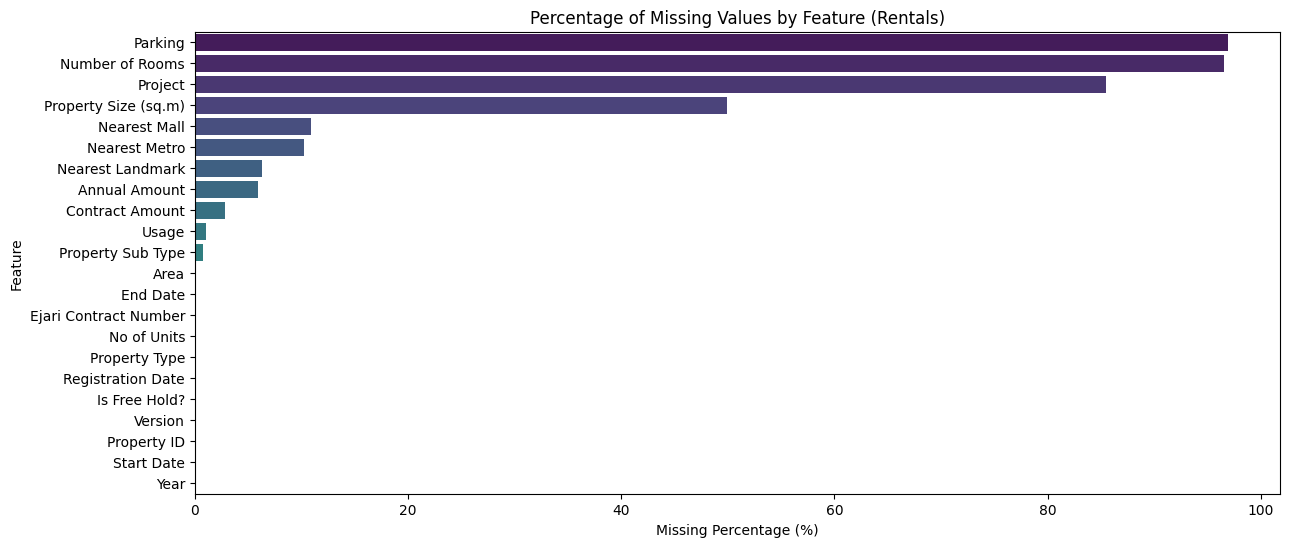

Missing Rentals
                                     Feature  MissingPercent
Parking                              Parking       96.926499
Number of Rooms              Number of Rooms       96.526518
Project                              Project       85.483821
Property Size (sq.m)    Property Size (sq.m)       49.951106
Nearest Mall                    Nearest Mall       10.940906
Nearest Metro                  Nearest Metro       10.267712
Nearest Landmark            Nearest Landmark        6.336231
Annual Amount                  Annual Amount        5.886351
Contract Amount              Contract Amount        2.852693
Usage                                  Usage        1.008318
Property Sub Type          Property Sub Type        0.731851
Area                                    Area        0.005943
End Date                            End Date        0.000037
Ejari Contract Number  Ejari Contract Number        0.000000
No of Units                      No of Units        0.000000
Property

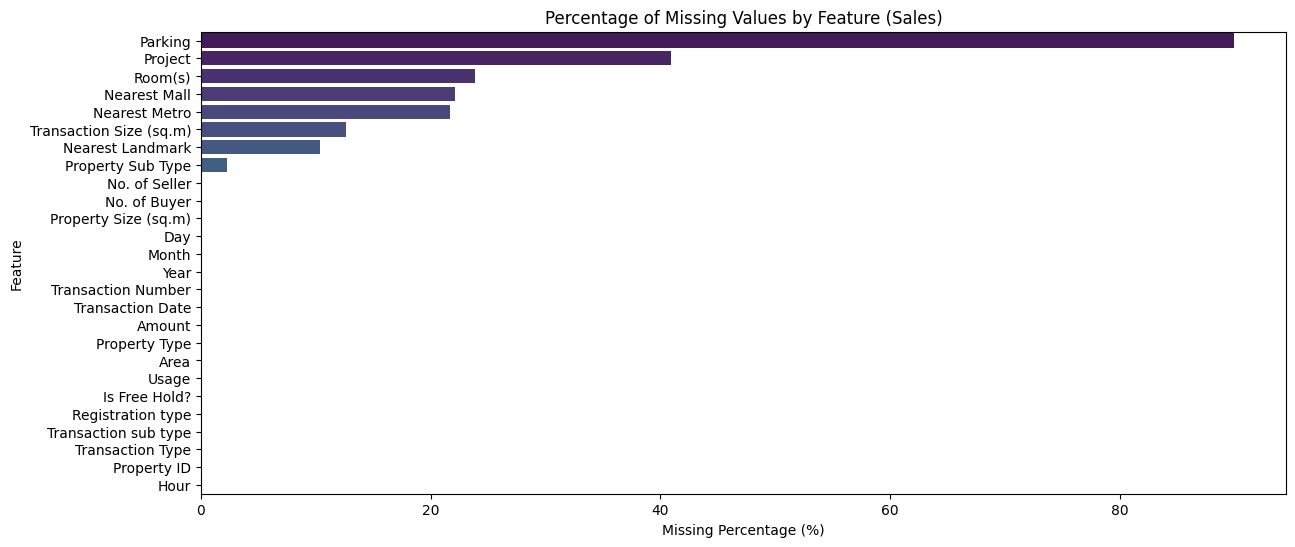

------------------------------------------------------------------------------------------------------------------------
Missing Sales
                                         Feature  MissingPercent
Parking                                  Parking       89.981475
Project                                  Project       40.893296
Room(s)                                  Room(s)       23.877808
Nearest Mall                        Nearest Mall       22.095033
Nearest Metro                      Nearest Metro       21.700946
Transaction Size (sq.m)  Transaction Size (sq.m)       12.623510
Nearest Landmark                Nearest Landmark       10.378674
Property Sub Type              Property Sub Type        2.234193
No. of Seller                      No. of Seller        0.018876
No. of Buyer                        No. of Buyer        0.018876
Property Size (sq.m)        Property Size (sq.m)        0.000301
Day                                          Day        0.000000
Month               

In [98]:
def visualize_missing_values(df, title="Percentage of Missing Values by Feature"):
    """
    Calculates and visualizes the percentage of missing values for each feature in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - title (str): The title for the visualization.

    Returns:
    - pd.DataFrame: A DataFrame with missing percentages for each feature.
    """
    # Calculate missing values and percentages
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Feature': missing_values.index,
        'MissingPercent': missing_percent
    }).sort_values(by='MissingPercent', ascending=False)

    # Visualize missing values
    plt.figure(figsize=(14, 6))
    sns.barplot(data=missing_df, y='Feature', x='MissingPercent', palette='viridis',hue='Feature', legend=False)
    plt.title(title)
    plt.xlabel("Missing Percentage (%)")
    plt.ylabel("Feature")
    plt.show()
    
    return missing_df

# Analyze and visualize missing values in the merged_real_estate_df
missing_property_rental_transactions_df = visualize_missing_values(
    df=property_rental_transactions_df,
    title="Percentage of Missing Values by Feature (Rentals)"
)
# Display the summary DataFrame
print("Missing Rentals")
print(missing_property_rental_transactions_df)


missing_property_transactions_df = visualize_missing_values(
    df=property_transactions_df,
    title="Percentage of Missing Values by Feature (Sales)"
)

print("-"*120)
print("Missing Sales")
print(missing_property_transactions_df)


---

**Key Updates to the Problem**

1. **Sales Price Prediction**:
   - Use the `Amount` column from the `property_transactions_df` dataset.
   - Filter the dataset to include only sales transactions by checking the `Transaction Type` and `Transaction Sub Type` fields for "Sales."

2. **Rental Price Prediction**:
   - Use the `Annual Amount` column from the `property_rental_transactions_df` dataset.
   - Ignore the `Contract Amount` column and any date ranges (`Start Date` and `End Date`) as they are irrelevant for the task.

3. **Transformations Allowed**:
   - Use transformations and engineering on the provided columns (e.g., derive new features like price per square meter, categorize areas, encode categorical variables, etc.).
   - No additional external data is to be added.

4. **Prediction Focus**:
   - For **sales transactions**, the target is `Amount` (filtered to include only sales transactions).
   - For **rental transactions**, the target is `Annual Amount`.

---

**Updated Plan for Preprocessing**

**Sales Transactions Dataset**
1. Filter transactions where `Transaction Type` = "Sales" or `Transaction Sub Type` = "Sales."
2. Select relevant features (`Property Type`, `Area`, `Property Size (sq.m)`, etc.).
3. Preprocess categorical and numerical columns as per earlier instructions.

**Rental Transactions Dataset**
1. Use the `Annual Amount` column as the target.
2. Select relevant features (`Property Type`, `Area`, `Nearest Metro`, etc.).
3. Preprocess categorical and numerical columns as per earlier instructions.





---

 **Handling of Missing Data**

**For `property_transactions_df`:**
- **`Transaction Size (sq.m)` and `Room(s)` (numerical columns):**
  - Use **median imputation** grouped by `Property Sub Type` (if the grouping has missing values, fallback to the overall median).

- **`Property Sub Type` (categorical column):**
  - Fill missing values with the **mode** of the corresponding `Property Type` group. Fallback to the dataset-wide mode if the group mode is missing.

- **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark` (categorical columns):**
  - Fill missing values using the **mode** grouped by `Area`. If the mode for the group is missing, fallback to the dataset-wide mode.

- **`Parking` (binary or categorical):**
  - With nearly 50% missing, consider either:
    1. Dropping this column if it has low predictive power.
    2. Imputing with a placeholder category like `"Unknown"`.

- **`Project` (categorical column):**
  - With ~41% missing, treat it similarly to `Parking`.

---

**For `property_rental_transactions_df`:**
- **`Annual Amount` and `Contract Amount` (numerical columns):**
  - Use **median imputation** grouped by `Property Sub Type` (fallback to overall median).

- **`Property Size (sq.m)` and `Number of Rooms` (numerical columns):**
  - Impute `Property Size (sq.m)` using median grouped by `Property Sub Type`.
  - `Number of Rooms` has ~97% missing data; it may be best to drop this column.

- **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark` (categorical columns):**
  - Same approach as in the sales dataset: use mode imputation grouped by `Area`.

- **`Parking` and `Project`:**
  - Consider dropping them since both have over 85% missing data.

---


In [99]:
print('sales transactions in Type:', property_transactions_df[(property_transactions_df['Transaction Type'] == 'Sales')]['Transaction Type'].unique().tolist())
print('sales transactions in Sub Type:', property_transactions_df[(property_transactions_df['Transaction sub type'] == 'Sales')]['Transaction sub type'].unique().tolist())

sales transactions in Type: ['Sales']
sales transactions in Sub Type: []


In [100]:
# sales_transactions_df.isnull().mean() * 100
checking_sales_df = property_transactions_df[(property_transactions_df['Transaction Type'] == 'Sales') & (property_transactions_df['Transaction sub type'] == 'Sales')]
print(checking_sales_df.shape)
print(sales_transactions_df.shape)


(0, 26)
(706096, 26)


`ANDing Type and Sub Type will yield no Sales because there are no Sales in the Sub Transaction`

In [101]:
property_transactions_df.isnull().mean() * 100
# print("sales cat cols:", property_transactions_df.select_dtypes(exclude=[np.number]).columns)
# merged_numerical_features =   merged_real_estate_df.select_dtypes(include=[np.number]).columns

Transaction Number          0.000000
Transaction Date            0.000000
Property ID                 0.000000
Transaction Type            0.000000
Transaction sub type        0.000000
Registration type           0.000000
Is Free Hold?               0.000000
Usage                       0.000000
Area                        0.000000
Property Type               0.000000
Property Sub Type           2.234193
Amount                      0.000000
Transaction Size (sq.m)    12.623510
Property Size (sq.m)        0.000301
Room(s)                    23.877808
Parking                    89.981475
Nearest Metro              21.700946
Nearest Mall               22.095033
Nearest Landmark           10.378674
No. of Buyer                0.018876
No. of Seller               0.018876
Project                    40.893296
Year                        0.000000
Month                       0.000000
Day                         0.000000
Hour                        0.000000
dtype: float64

In [102]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings(action="ignore")  # filter unnecessary warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)


# Configuration dictionary for feature names
sale_config = {
    "numerical_cols": ['Transaction Size (sq.m)', 'Property Size (sq.m)', 
                       'No. of Buyer', 'No. of Seller', 'Parking'],
    "categorical_cols": ['Room(s)', 'Property Sub Type', 'Nearest Metro', 
                         'Nearest Mall', 'Nearest Landmark'],
    "group_by_cols": {
        "numerical": "Property Sub Type",
        "categorical": {
            'Nearest Metro': 'Area',
            'Nearest Mall': 'Area',
            'Nearest Landmark': 'Area',
            'Room(s)': 'Property Sub Type',
            'Property Sub Type': 'Property Sub Type'
        }
    },
    "drop_cols": ['Project'],
    "filter_conditions": {
        "Transaction Type": "Sales",
        "Transaction sub type": "Sales"
    }
}

# Define preprocessing functions
def filter_sales_transactions(df, filter_conditions):
    """Filter the dataset based on provided conditions."""
    condition = False
    for col, value in filter_conditions.items():
        condition |= (df[col] == value)
    return df[condition]

def drop_columns(df, drop_cols):
    """Drop specified columns."""
    return df.drop(columns=drop_cols, errors='ignore')

def impute_numerical_columns(df, numerical_cols, group_by_col):
    """Impute missing values in numerical columns."""
    for col in numerical_cols:
        df[col] = df.groupby(group_by_col, observed=False)[col].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df[col].median())
        )
    return df

def impute_categorical_columns(df, categorical_cols, group_by_cols):
    """Impute missing values in categorical columns."""
    for col in categorical_cols:
        group_by_col = group_by_cols[col] if col in group_by_cols else None
        if group_by_col:
            df[col] = df.groupby(group_by_col, observed=False)[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df[col].mode()[0])
            )
    return df

def handle_remaining_missing_values(df, numerical_cols, categorical_cols):
    """Handle remaining missing values."""
    for col in numerical_cols + categorical_cols:
        if df[col].isna().sum() > 0:
            if col in numerical_cols:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df


# Build pipeline
sales_preprocessing_pipeline = Pipeline(steps=[
    ('filter_sales_transactions', FunctionTransformer(
        func=filter_sales_transactions, 
        kw_args={'filter_conditions': sale_config["filter_conditions"]}
    )),
    ('drop_columns', FunctionTransformer(
        func=drop_columns, 
        kw_args={'drop_cols': sale_config["drop_cols"]}
    )),
    ('impute_numerical_columns', FunctionTransformer(
        func=impute_numerical_columns, 
        kw_args={
            'numerical_cols': sale_config["numerical_cols"],
            'group_by_col': sale_config["group_by_cols"]["numerical"]
        }
    )),
    ('impute_categorical_columns', FunctionTransformer(
        func=impute_categorical_columns, 
        kw_args={
            'categorical_cols': sale_config["categorical_cols"], 
            'group_by_cols': sale_config["group_by_cols"]["categorical"]
        }
    )),
    ('handle_remaining_missing_values', FunctionTransformer(
        func=handle_remaining_missing_values, 
        kw_args={
            'numerical_cols': sale_config["numerical_cols"], 
            'categorical_cols': sale_config["categorical_cols"]
        }
    ))
])

# Apply pipeline
sales_df_cleaned = sales_preprocessing_pipeline.fit_transform(property_transactions_df)

# Check missing values
missing_percentage = sales_df_cleaned.isnull().mean() * 100
print(missing_percentage)


Transaction Number         0.0
Transaction Date           0.0
Property ID                0.0
Transaction Type           0.0
Transaction sub type       0.0
Registration type          0.0
Is Free Hold?              0.0
Usage                      0.0
Area                       0.0
Property Type              0.0
Property Sub Type          0.0
Amount                     0.0
Transaction Size (sq.m)    0.0
Property Size (sq.m)       0.0
Room(s)                    0.0
Parking                    0.0
Nearest Metro              0.0
Nearest Mall               0.0
Nearest Landmark           0.0
No. of Buyer               0.0
No. of Seller              0.0
Year                       0.0
Month                      0.0
Day                        0.0
Hour                       0.0
dtype: float64


In [103]:
def calculate_imputation_error(original_df, imputed_df, numerical_cols, categorical_cols):
    """
    Compare the original and imputed datasets, and calculate the imputation error.

    Parameters:
    - original_df: DataFrame before imputation
    - imputed_df: DataFrame after imputation
    - numerical_cols: List of numerical columns
    - categorical_cols: List of categorical columns

    Returns:
    - imputation_error: DataFrame summarizing the imputation errors for numerical columns
    - categorical_changes: DataFrame summarizing changes in categorical columns
    """
    # Initialize results
    imputation_error = {}
    categorical_changes = []

    # Calculate error for numerical columns
    for col in numerical_cols:
        original_values = original_df[col]
        imputed_values = imputed_df[col]
        missing_mask = original_values.isna()

        if missing_mask.any():
            # Align indices for comparison
            aligned_original = original_values[missing_mask].fillna(0).values
            aligned_imputed = imputed_values[missing_mask].values
            error = np.abs(aligned_imputed - aligned_original).mean()
            imputation_error[col] = error
        else:
            imputation_error[col] = 0

    # Detect changes in categorical columns
    for col in categorical_cols:
        original_values = original_df[col]
        imputed_values = imputed_df[col]
        missing_mask = original_values.isna()

        if missing_mask.any():
            # Align indices for comparison
            aligned_original = original_values[missing_mask]
            aligned_imputed = imputed_values[missing_mask]
            changes = (aligned_imputed != aligned_original).sum()
            categorical_changes.append({
                "Column": col,
                "Total Missing": missing_mask.sum(),
                "Changed Values": changes,
                "Change Percentage": changes / missing_mask.sum() * 100
            })

    # Convert results to DataFrames
    imputation_error_df = pd.DataFrame(
        list(imputation_error.items()), columns=["Column", "Mean Imputation Error"]
    )
    categorical_changes_df = pd.DataFrame(categorical_changes)

    return imputation_error_df, categorical_changes_df

# Calculate imputation errors
imputation_error, categorical_changes = calculate_imputation_error(
    original_df=sales_df_cleaned,
    imputed_df=sales_df_cleaned,
    numerical_cols=sale_config["numerical_cols"],
    categorical_cols=sale_config["categorical_cols"]
)

# Display the results
print("Numerical Imputation Errors:")
print(imputation_error)

print("\nCategorical Changes Summary:")
print(categorical_changes)


Numerical Imputation Errors:
                    Column  Mean Imputation Error
0  Transaction Size (sq.m)                      0
1     Property Size (sq.m)                      0
2             No. of Buyer                      0
3            No. of Seller                      0
4                  Parking                      0

Categorical Changes Summary:
Empty DataFrame
Columns: []
Index: []


- Check plots after imputation

<Figure size 1400x400 with 0 Axes>

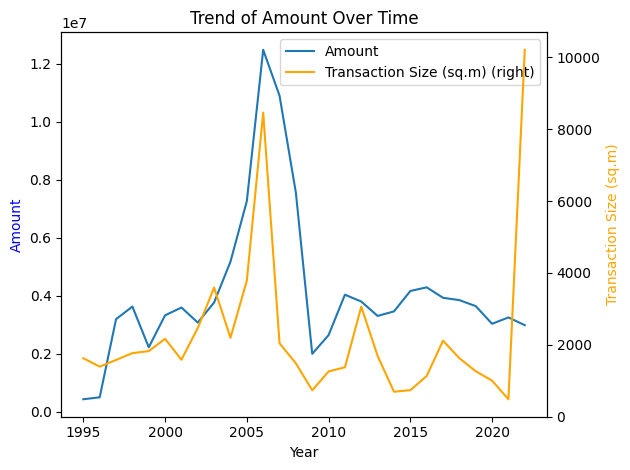

In [104]:
plots.plot_trends(
    property_transactions_df,  # original before selecting sales only
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)

<Figure size 1400x400 with 0 Axes>

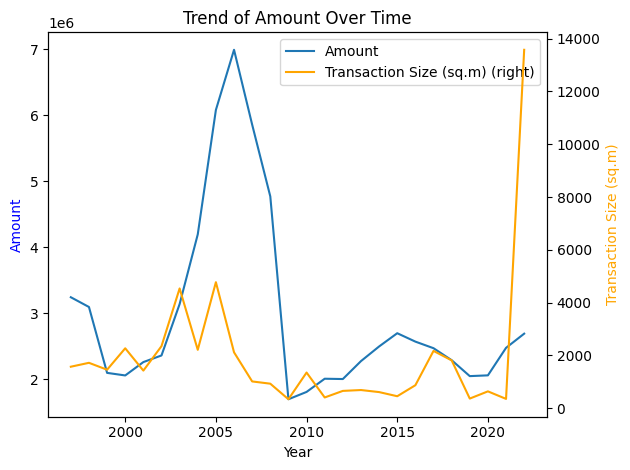

In [105]:
plots.plot_trends(
    sales_transactions_df, # sales only
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


<Figure size 1400x400 with 0 Axes>

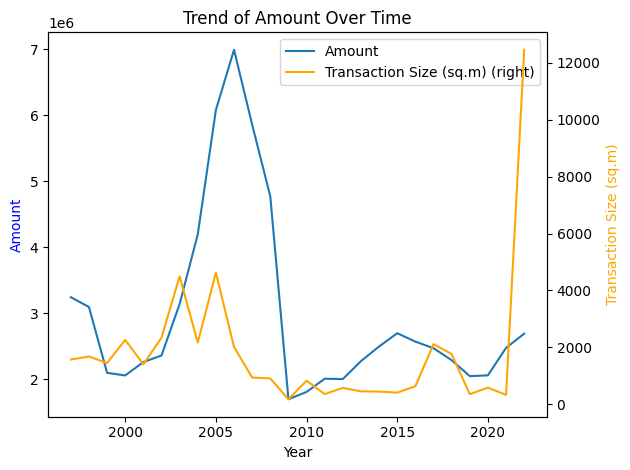

In [106]:
plots.plot_trends(
    sales_df_cleaned, # imputed with pipeline
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)


In [107]:


# Transformer for enforcing data types
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler

class TypeEnforcer(BaseEstimator, TransformerMixin):
    def __init__(self, type_map=None):
        # Use an immutable object for the parameter and convert to mutable inside
        self.type_map = type_map

    def fit(self, X, y=None):
        # No fitting required for this transformer
        return self

    def transform(self, X):
        # Ensure a deep copy of the input to avoid side effects
        X = X.copy()
        if self.type_map is not None:
            for col, expected_type in self.type_map.items():
                if col in X.columns:
                    try:
                        X[col] = X[col].astype(expected_type, errors='ignore')
                    except Exception as e:
                        print(f"Warning: Could not convert {col} to {expected_type}. Error: {e}")
                        X[col] = np.nan  # Set invalid types to NaN
        return X

# Transformer for handling out-of-range values
class OutOfRangeHandler(BaseEstimator, TransformerMixin):
    def __init__(self, ranges=None):
        # Use a new dictionary if ranges is not provided
        self.ranges = ranges if ranges is not None else {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, (min_val, max_val) in self.ranges.items():
            if col in X.columns:
                # Replace out-of-range values with NaN
                X[col] = X[col].where((X[col] >= min_val) & (X[col] <= max_val), np.nan)
        return X

# Transformer for replacing infinity values
class InfinityHandler(BaseEstimator, TransformerMixin):
    def __init__(self, replace_value=np.nan):
        self.replace_value = replace_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X.replace([np.inf, -np.inf], self.replace_value, inplace=True)
        return X

class RegressionImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fallback_strategy='mean'):
        self.fallback_strategy = fallback_strategy
        self.models = {}
        self.fallback_values = {}

    def fit(self, X, y=None):
        X = pd.DataFrame(X)  # Ensure the data is a DataFrame for column handling
        for col in X.columns:
            if X[col].isnull().any():
                # Use other columns as predictors for the missing values
                predictors = X.drop(columns=[col])
                target = X[col]
                not_null_mask = ~target.isnull()
                
                # Train a regression model to predict missing values
                model = HistGradientBoostingRegressor()
                # model = LinearRegression()
                model.fit(predictors[not_null_mask], target[not_null_mask])
                self.models[col] = model

                # Store fallback value
                if self.fallback_strategy == 'mean':
                    self.fallback_values[col] = target[not_null_mask].mean()
                elif self.fallback_strategy == 'median':
                    self.fallback_values[col] = target[not_null_mask].median()
                else:
                    raise ValueError(f"Invalid fallback strategy: {self.fallback_strategy}")

        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col, model in self.models.items():
            if X[col].isnull().any():
                predictors = X.drop(columns=[col])
                missing_mask = X[col].isnull()

                # Predict missing values using the regression model
                X.loc[missing_mask, col] = model.predict(predictors[missing_mask])

                # Fill any remaining NaNs with the fallback value
                X[col].fillna(self.fallback_values[col], inplace=True)

        return X

# if outliers are a concern
def compute_percentile_ranges(df, numerical_features, lower=0.01, upper=0.99):
    ranges = {}
    for col in numerical_features:
        min_val = df[col].quantile(lower)
        max_val = df[col].quantile(upper)
        ranges[col] = (min_val, max_val)
    return ranges

# # Function to compute dynamic ranges from the dataset
def compute_dynamic_ranges(df, numerical_features):
    ranges = {}
    for col in numerical_features:
        min_val, max_val = df[col].min(), df[col].max()
        ranges[col] = (min_val, max_val)
    return ranges

def evaluate_imputation_methods(df, numerical_features, categorical_features, strategies):
    """
    Evaluate and compare imputation methods using RMSE.
    """
    # Original dataset (for comparison)
    original_df = df.copy()
    
    # Store RMSE results
    rmse_results = {}

    for strategy in strategies:
        # Create pipeline with the current imputation strategy
        pipeline = create_flexible_cleaning_pipeline_with_imputation(
            numerical_features=numerical_features,
            categorical_features=categorical_features,
            imputation_strategy=strategy,
            use_scaler=False,  # No scaling for better interpretability
        )
        
        # Fit-transform the data
        cleaned_data = pipeline.fit_transform(df)
        cleaned_df = pd.DataFrame(cleaned_data, columns=numerical_features + categorical_features)
        
        # Calculate RMSE for numerical features
        rmse = {}
        for feature in numerical_features:
            original_vals = original_df[feature].dropna()
            imputed_vals = cleaned_df.loc[original_vals.index, feature]
            rmse[feature] = np.sqrt(mean_squared_error(original_vals, imputed_vals))
        
        # Store the average RMSE across all features
        rmse_results[strategy] = np.mean(list(rmse.values()))

    # Plot RMSE results
    plt.figure(figsize=(10, 6))
    plt.bar(rmse_results.keys(), rmse_results.values(), color='skyblue')
    plt.ylabel("Average RMSE")
    plt.xlabel("Imputation Strategy")
    plt.title("Comparison of Imputation Strategies")
    plt.xticks(rotation=45)
    plt.show()

    return rmse_results

def create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=None,  # Specify numerical columns or infer if None
    categorical_features=None,  # Specify categorical columns or infer if None
    num_imputation_strategy='mean',  # 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=True,
    encode=True,  # Optional encoding for categorical features
    scaler_type='standard',  # 'standard' or 'minmax'
    ranges=None,  # Custom ranges for outlier handling
):
    # Preprocessing steps for numerical features
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
    ]
    
    # Add numerical imputation step based on the chosen strategy
    if num_imputation_strategy == 'mean':
        num_steps.append(('imputer', SimpleImputer(strategy='mean')))
    elif num_imputation_strategy == 'median':
        num_steps.append(('imputer', SimpleImputer(strategy='median')))
    elif num_imputation_strategy == 'iterative':
        num_steps.append(('imputer', IterativeImputer(random_state=42)))
    elif num_imputation_strategy == 'regression':
        num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
    else:
        raise ValueError(f"Unsupported numerical imputation strategy: {num_imputation_strategy}")
    
    # Add scaler if requested
    if use_scaler:
        scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
        num_steps.append(('scaler', scaler))

    num_preprocessor = Pipeline(steps=num_steps)

    # Preprocessing steps for categorical features
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
    ]

    # Add categorical imputation step based on the chosen strategy
    if cat_imputation_strategy == 'most_frequent':
        cat_steps.append(('imputer', SimpleImputer(strategy='most_frequent')))
    elif cat_imputation_strategy == 'KNN':
        cat_steps.append(('imputer', KNNImputer()))
    elif cat_imputation_strategy == 'iterative':
        cat_steps.append(('imputer', IterativeImputer(random_state=42)))
    else:
        raise ValueError(f"Unsupported categorical imputation strategy: {cat_imputation_strategy}")

    # Optional encoding for categorical features
    if encode:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features),
        ]
    )

    return preprocessor

# def create_flexible_cleaning_pipeline_with_imputation(
#     numerical_features,
#     categorical_features,
#     imputation_strategy='mean',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
#     use_scaler=True,
#     encode=True,  # Optional encoding for categorical features
#     scaler_type='standard',
#     ranges=None,
# ):
#     # Numerical preprocessing
#     num_steps = [
#         ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
#         ('infinity_handler', InfinityHandler()),
#         ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
#     ]
    
#     # Choose imputer
#     if imputation_strategy == 'mean':
#         num_steps.append(('imputer', SimpleImputer(strategy='mean')))
#     elif imputation_strategy == 'median':
#         num_steps.append(('imputer', SimpleImputer(strategy='median')))
#     elif imputation_strategy == 'iterative':
#         num_steps.append(('imputer', IterativeImputer(random_state=42)))
#     elif imputation_strategy == 'regression':
#         num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
#     else:
#         raise ValueError(f"Unsupported imputation strategy: {imputation_strategy}")

#     # Add scaler if needed
#     if use_scaler:
#         scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
#         num_steps.append(('scaler', scaler))

#     num_preprocessor = Pipeline(steps=num_steps)

#     # Categorical preprocessing
#     cat_steps = [
#         ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
#         ('imputer', SimpleImputer(strategy='most_frequent'))
#     ]
    
#     if encode:
#         cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

#     cat_preprocessor = Pipeline(steps=cat_steps)

#     # Combined preprocessing pipeline
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', num_preprocessor, numerical_features),
#             ('cat', cat_preprocessor, categorical_features)
#         ]
#     )

#     return preprocessor

def create_flexible_cleaning_pipeline(
    numerical_features,
    categorical_features,
    use_scaler=True,
    scaler_type='standard',
    ranges=None,
    use_encoding=True
):
    """
    Create a flexible cleaning pipeline with optional scaling and encoding.

    Args:
        numerical_features (list): List of numerical feature names.
        categorical_features (list): List of categorical feature names.
        use_scaler (bool): Whether to include a scaler in the pipeline.
        scaler_type (str): Type of scaler ('standard' or 'robust').
        ranges (dict): Optional range limits for outlier handling.
        use_encoding (bool): Whether to include encoding for categorical features.

    Returns:
        ColumnTransformer: A cleaning pipeline.
    """

    # Choose the scaler based on user input
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose 'standard' or 'robust'.")

    # Numerical preprocessing pipeline
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges)),  # Handle outliers
        ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values
    ]
    if use_scaler:
        num_steps.append(('scaler', scaler))  # Add scaler if use_scaler is True

    num_preprocessor = Pipeline(steps=num_steps)

    # Categorical preprocessing pipeline
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values
    ]
    if use_encoding:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combined preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_flexible_cleaning_pipeline_options(
    numerical_features, 
    categorical_features, 
    use_scaler=False, 
    scaler_type='standard', 
    use_imputer=True, 
    use_encoding=False,
    imputer_strategy_numerical='mean', 
    imputer_strategy_categorical='most_frequent',
    ranges=None
):
    """
    Create a flexible cleaning pipeline with optional imputation and scaling.

    Args:
        numerical_features (list of str): List of numerical feature names.
        categorical_features (list of str): List of categorical feature names.
        use_scaler (bool): Whether to include a scaler in the pipeline.
        scaler_type (str): Type of scaler ('standard' or 'robust').
        use_imputer (bool): Whether to include imputation in the pipeline.
        use_encoding (bool): Whether to include encoding for categorical data.
        imputer_strategy_numerical (str): Strategy for numerical imputation ('mean', 'median', 'most_frequent').
        imputer_strategy_categorical (str): Strategy for categorical imputation ('most_frequent', etc.).
        ranges (dict): Optional range limits for outlier handling (e.g., {'col_name': (min, max)}).

    Returns:
        ColumnTransformer: A combined cleaning pipeline for preprocessing.
    """
    # Validate inputs
    if not isinstance(numerical_features, list) or not all(isinstance(f, str) for f in numerical_features):
        raise ValueError("numerical_features must be a list of strings.")
    if not isinstance(categorical_features, list) or not all(isinstance(f, str) for f in categorical_features):
        raise ValueError("categorical_features must be a list of strings.")
    
    # Choose the scaler based on user input
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose 'standard' or 'robust'.")

    # Numerical preprocessing pipeline
    num_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'float32' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges))  # Handle outliers
    ]
    if use_imputer:
        num_steps.append(('imputer', SimpleImputer(strategy=imputer_strategy_numerical)))
    if use_scaler:
        num_steps.append(('scaler', scaler))

    num_preprocessor = Pipeline(steps=num_steps)

    # Categorical preprocessing pipeline
    cat_steps = [
        ('type_enforcer', TypeEnforcer(type_map={col: 'category' for col in categorical_features}))
    ]
    if use_imputer:
        cat_steps.append(('imputer', SimpleImputer(strategy=imputer_strategy_categorical)))
    if use_encoding:
        cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

    cat_preprocessor = Pipeline(steps=cat_steps)

    # Combined preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_pipeline_with_iterative_imputer(numerical_features, categorical_features, ranges=None):
    # Numerical preprocessing with IterativeImputer for fallback
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('outlier_handler', OutOfRangeHandler(ranges=ranges)),
        ('mean_imputer', SimpleImputer(strategy='mean')),  # Primary imputation
        ('iterative_imputer', IterativeImputer(max_iter=10, random_state=42)),  # Fallback
        # ('scaler', RobustScaler())
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing remains unchanged
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_advanced_cleaning_pipeline(numerical_features, categorical_features, type_map=None, ranges=None):
    # Numerical preprocessing with KNNImputer
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', KNNImputer(n_neighbors=5)),  # KNN for imputing numerical features
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing with IterativeImputer
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', IterativeImputer(max_iter=10, random_state=42)),  # Iterative imputer for categorical features
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combined pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_pipeline_with_regression_imputer(numerical_features, categorical_features, ranges=None):
    # Numerical preprocessing with RegressionImputer
    num_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', RegressionImputer(fallback_strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing remains unchanged
    cat_preprocessor = Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    # Combine numerical and categorical preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_preprocessor, numerical_features),
            ('cat', cat_preprocessor, categorical_features)
        ]
    )

    return preprocessor

def create_categorical_pipeline(imputer=None, encoder=None):
    imputer = SimpleImputer(strategy='most_frequent')
    # imputer = SimpleImputer(strategy='most_frequent')
    # imputer = imputer or IterativeImputer(max_iter=10), 
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

    return Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map=None)),  # Default to object
        ('imputer', imputer),
        ('encoder', encoder)
    ])

def create_numerical_pipeline(ranges=None, imputer=None, scaler=None):
    imputer = SimpleImputer(strategy='mean')
    # regressor = LinearRegression()
    # imputer = imputer or KNNImputer(n_neighbors=5),  # Or use IterativeImputer(max_iter=10)
    # scaler = scaler or StandardScaler()

    return Pipeline(steps=[
        ('type_enforcer', TypeEnforcer(type_map=None)),  # Default to float
        ('infinity_handler', InfinityHandler()),
        ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
        ('imputer', imputer),
        # ('regressor', regressor),
        # ('scaler', scaler)
    ])
    
def compute_scaled_ranges(df, numerical_features, lower=0.01, upper=0.99):
    if not isinstance(numerical_features, list) or not all(isinstance(col, str) for col in numerical_features):
        raise ValueError("numerical_features must be a list of column names (strings).")
    
    ranges = {}
    for col in numerical_features:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is not in the DataFrame.")
        
        min_val = df[col].quantile(lower)
        max_val = df[col].quantile(upper)
        ranges[col] = (min_val, max_val)
    return ranges

def convert_to_original_types(df, numerical_columns, categorical_columns):
    # Convert numerical columns back to their original types (e.g., float or int)
     
    # If the column is 'Amount' or other financial fields, try converting to float
    fins_cols = ['Amount', 'Contract Amount','Annual Amount','Annual Rental Price',
                     'Sale Price','Rental Price','Annual Rental Price']
        
    for col in numerical_columns:
        if col in fins_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle other numerical columns
    
    # Convert categorical columns back to category
    for col in categorical_columns:
        df[col] = df[col].astype('category')
    
    return df


# ranges = compute_dynamic_ranges(property_rental_transactions_df, numerical_features)
rent_ranges =  compute_dynamic_ranges(property_rental_transactions_df, rent_numerical_cols) 
sales_ranges = compute_dynamic_ranges(sales_transactions_df, sales_numerical_cols) # sales only

def create_combined_pipeline(numerical_features, categorical_features, ranges=None):
    # Create individual pipelines
    num_pipeline = create_numerical_pipeline(ranges=ranges)
    cat_pipeline = create_categorical_pipeline()

    # Combine pipelines into a ColumnTransformer
    return ColumnTransformer(
        transformers=[
            ('num', num_pipeline, numerical_features),
            ('cat', cat_pipeline, categorical_features)
        ]
    )


In [108]:
property_rental_transactions_df['Property Type'].unique()

['Building', 'Unit', 'Land', 'Virtual Unit', 'Villa']
Categories (5, object): ['Building', 'Land', 'Unit', 'Villa', 'Virtual Unit']

In [109]:
property_rental_transactions_df.columns

Index(['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date',
       'Property ID', 'Version', 'Area', 'Contract Amount', 'Annual Amount',
       'Is Free Hold?', 'Property Size (sq.m)', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Parking', 'No of Units', 'Project',
       'Year'],
      dtype='object')

In [110]:
# Define features
    
# Create combined pipeline
# cleaning_pipeline = create_pipeline_with_iterative_imputer(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     ranges=ranges
# )  


# pipeline_without_imputation = create_flexible_cleaning_pipeline(
#    numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     use_imputer=False  # Disable imputation
# )

# rent_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='robust'  # Use RobustScaler
# )  

# Create pipelines
# rent_pipeline_unencoded = create_flexible_cleaning_pipeline_options(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='standard',  # Use StandardScaler
#     use_imputer=True,  # Enable imputation
#     use_encoding=False,
#     imputer_strategy_numerical='median',  # Median for numerical
#     imputer_strategy_categorical='most_frequent',  # Mode for categorical
#     ranges=None
# )
# sales_pipeline_unencoded  = create_flexible_cleaning_pipeline_options(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Enable scaling
#     scaler_type='standard',  # Use StandardScaler
#     use_imputer=True,  # Enable imputation
#     use_encoding=False,
#     imputer_strategy_numerical='median',  # Median for numerical
#     imputer_strategy_categorical='most_frequent',  # Mode for categorical
#     ranges=None
# )

# rent_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=rent_num_cols_to_impute,
#     categorical_features=rent_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     ranges=None,
#     use_encoding=False
# )
# sales_pipeline_unencoded = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=False,  # Disable scaling
#     ranges=None,
#     use_encoding=False
    
# )


#  With encoding and scaling
# pipeline_with_encoding = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=True,
#     scaler_type='standard',
#     use_encoding=True
# )

# #  Without encoding
# pipeline_without_encoding = create_flexible_cleaning_pipeline(
#     numerical_features=sales_num_cols_to_impute,
#     categorical_features=sales_cat_cols_to_impute,
#     use_scaler=True,
#     scaler_type='robust',
#     use_encoding=False
# )


    
# assert isinstance(property_rental_transactions_df, pd.DataFrame), "Input is not a DataFrame"
# assert all(col in property_rental_transactions_df.columns for col in numerical_features), "Some columns are missing"
   

# # Transform the data
# cleaned_property_rental_transactions_df = cleaning_pipeline.fit_transform(property_rental_transactions_df)
# cleaned_scaled_df = pipeline_scaled.fit_transform(df)
# rent_unencode_df = rent_pipeline_unencoded.fit_transform(rent_df)
# sales_unencoded_df = sales_pipeline_unencoded.fit_transform(sales_df)

# rent_feature_names = rent_num_cols_to_impute + rent_cat_cols_to_impute
# sales_feature_names = sales_num_cols_to_impute + sales_cat_cols_to_impute


# Convert back to DataFrame for analysis
# cleaned_rent_df = pd.DataFrame(cleaned_propeunrty_rental_transactions_df, columns=feature_names, index=property_rental_transactions_df.index)
# scaled_rent_df = pd.DataFrame(cleaned_scaled_df, columns=feature_names, index=df.index)
# unencoded_rent_df = pd.DataFrame(rent_unencode_df, columns=rent_feature_names, index=rent_df.index)
# unencoded_sales_df = pd.DataFrame(sales_unencoded_df, columns=sales_feature_names, index=sales_df.index)

# unencoded_rent_df.isnull().mean() * 100

# Use cleaned data in model training
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', cleaning_pipeline),
#     ('regressor', LGBMRegressor())
# ])

# model_pipeline.fit(X_cleaned, y_train)



In [111]:
print('transaction categories from transaction types:',property_transactions_df['Transaction Type'].unique().tolist())
print('transaction categories from transaction sub types:',property_transactions_df['Transaction sub type'].unique().tolist())

print('transaction categories from transaction types(sales only):',sales_df_cleaned['Transaction Type'].unique().tolist())
print('transaction categories from transaction sub types(sales only):',sales_df_cleaned['Transaction sub type'].unique().tolist())

transaction categories from transaction types: ['Mortgage', 'Sales', 'Gifts']
transaction categories from transaction sub types: ['Mortgage Registration', 'Modify Mortgage', 'Sale', 'Sell - Pre registration', 'Sell Development', 'Grant Pre-Registration', 'Grant', 'Delayed Sell', 'Development Registration', 'Lease to Own Registration', 'Delayed Mortgage', 'Portfolio Mortgage Registration', 'Lease Finance Registration', 'Development Mortgage', 'Mortgage Pre-Registration', 'Grant on Delayed Sell', 'Modify Development Mortgage', 'Development Registration Pre-Registration', 'Delayed Development', 'Lease to Own Modify', 'Portfolio Mortgage Modification', 'Grant Development', 'Delayed Sell Lease to Own Registration', 'Lease Finance Modification', 'Adding Land By Sell', 'Sell Development - Pre Registration', 'Delayed Sell Development', 'Transfer Development Mortgage', 'Lease to Own on Development Registration', 'Portfolio Mortgage Development Registration', 'Portfolio Mortgage Modification Pre

In [112]:

def detect_mixed_and_abnormal_types(df, threshold=0.01):
    """
    Detects mixed data types and abnormal values in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - threshold (float): Proportion of rows with abnormal types or values for flagging a column (default: 0.01).

    Returns:
    - pd.DataFrame: A summary of detected issues in the dataset.
    """
    results = []

    for col in df.columns:
        # Identify mixed types
        mixed_types = df[col].apply(type).nunique() > 1

        # Check for abnormal types (non-numeric in numeric columns, etc.)
        if pd.api.types.is_numeric_dtype(df[col]):
            abnormal_types = df[col].apply(lambda x: not isinstance(x, (int, float)) and x is not np.nan).sum()
        elif pd.api.types.is_string_dtype(df[col]):
            abnormal_types = df[col].apply(lambda x: not isinstance(x, str) and x is not np.nan).sum()
        else:
            abnormal_types = 0

        abnormal_types_percent = abnormal_types / len(df)

        # Detect abnormal values (extreme outliers)
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            abnormal_values = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            abnormal_values_percent = abnormal_values / len(df)
        else:
            abnormal_values = 0
            abnormal_values_percent = 0

        # Append results
        results.append({
            "Column": col,
            "Mixed Types": mixed_types,
            "Abnormal Types Count": abnormal_types,
            "Abnormal Types (%)": abnormal_types_percent * 100,
            "Abnormal Values Count": abnormal_values,
            "Abnormal Values (%)": abnormal_values_percent * 100,
        })

    # Create a summary DataFrame
    results_df = pd.DataFrame(results)
    flagged_columns = results_df[
        (results_df["Mixed Types"]) |
        (results_df["Abnormal Types (%)"] > threshold * 100) |
        (results_df["Abnormal Values (%)"] > threshold * 100)
    ]
    
    return results_df, flagged_columns

# Detect mixed and abnormal types/values
full_report, flagged = detect_mixed_and_abnormal_types(sales_transactions_df)
flagged

,Column,Mixed Types,Abnormal Types Count,Abnormal Types (%),Abnormal Values Count,Abnormal Values (%)
2,Property ID,False,0,0.0,106625,15.100638
11,Amount,False,0,0.0,59154,8.377614
12,Transaction Size (sq.m),False,0,0.0,91539,12.964101
13,Property Size (sq.m),False,0,0.0,101554,14.382464
15,Parking,True,0,0.0,0,0.000000
19,No. of Buyer,False,0,0.0,128361,18.178973
20,No. of Seller,False,0,0.0,67224,9.520518
25,Hour,False,0,0.0,89029,12.608625


- Parking has mixed types
- convert Parking from Object to numeric


In [113]:
print('Parking Dtype for sales Before:', sales_transactions_df['Parking'].dtype)

sales_transactions_df['Parking'] = pd.to_numeric(sales_transactions_df['Parking'], errors='coerce')

print('Parking Dtype for sales After:', sales_transactions_df['Parking'].dtype)

Parking Dtype for sales Before: object
Parking Dtype for sales After: float64


In [114]:
# sales_transactions_df.select_dtypes(exclude='number')
# property_transactions_df['Property ID'].unique()

In [115]:
# Define numerical and categorical features
rentals_num_cols_to_impute = ['Parking', 'Property Size (sq.m)', 'Number of Rooms','Annual Amount', 'Contract Amount']
rentals_cat_cols_to_impute = ['Is Free Hold?','Property Type','Nearest Metro', 'Usage','Area','Property Sub Type','Nearest Mall','Nearest Landmark']

sales_num_cols_to_impute = ['Parking','Property Size (sq.m)','No. of Buyer','No. of Seller','Transaction Size (sq.m)','Amount']
sales_cat_cols_to_impute = ['Usage','Transaction Date','Property Sub Type','Room(s)','Nearest Metro','Nearest Mall','Nearest Landmark']

rentals_df = property_rental_transactions_df.copy()
sales_df = sales_transactions_df.copy() # sales only
# sales_df = property_transactions_df.copy() # entire dataset with others like Mortgage','Gifts',etc

sales_pipeline = create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=sales_num_cols_to_impute,
    categorical_features=sales_cat_cols_to_impute,
    num_imputation_strategy='regression',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=False,
    encode=False,  # Optional encoding for categorical features
    scaler_type='standard',
    ranges=None,
)
rentals_pipeline = create_flexible_cleaning_pipeline_with_imputation(
    numerical_features=rentals_num_cols_to_impute,
    categorical_features=rentals_cat_cols_to_impute,
    num_imputation_strategy='regression',  # Choose between 'mean', 'median', 'iterative', 'regression', etc.
    cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
    use_scaler=False,
    encode=False,  # Optional encoding for categorical features
    scaler_type='standard',
    ranges=None,
)

# # Transform the data
median_mode_sales_transform = sales_pipeline.fit_transform(sales_df)
median_mode_rentals_transform = rentals_pipeline.fit_transform(rentals_df)

sales_feature_names = sales_num_cols_to_impute + sales_cat_cols_to_impute
rentals_feature_names = rentals_num_cols_to_impute + rentals_cat_cols_to_impute


# Convert back to DataFrame for analysis
median_mode_sales_df = pd.DataFrame(median_mode_sales_transform, columns=sales_feature_names, index=sales_df.index)
median_mode_rentals_df = pd.DataFrame(median_mode_rentals_transform, columns=rentals_feature_names, index=rentals_df.index)

# Retain the non-imputed columns in the original dataset
sales_remaining_columns = [col for col in sales_df.columns if col not in sales_feature_names]
rentals_remaining_columns = [col for col in rentals_df.columns if col not in rentals_feature_names]

median_mode_sales_df = pd.concat([median_mode_sales_df[sales_feature_names], sales_df[sales_remaining_columns]], axis=1)
median_mode_rentals_df = pd.concat([median_mode_rentals_df[rentals_feature_names], rentals_df[rentals_remaining_columns]], axis=1)

# Apply the conversion function
full_sales_df = convert_to_original_types(median_mode_sales_df, sales_num_cols_to_impute, sales_cat_cols_to_impute)
full_rentals_df = convert_to_original_types(median_mode_rentals_df, rentals_num_cols_to_impute, rentals_cat_cols_to_impute)


rentals_cols_to_drop = ['Number of Rooms','Project', 'Start Date', 'End Date', 'Property ID', 'Version', 'Registration Date']

# Drop columns if they exist in the DataFrame
columns_to_drop = [col for col in rentals_cols_to_drop if col in full_rentals_df.columns]

if columns_to_drop:  # Only drop if there are columns to drop
    full_rentals_df.drop(columns=columns_to_drop, inplace=True)


if 'Project' in full_sales_df.columns:
  full_sales_df.drop(columns='Project', inplace=True)  

full_sales_df.drop_duplicates(inplace=True)
full_sales_df = data_processor.optimize_dataframe_memory(full_sales_df)
data_processor.display_dataframe_info(full_sales_df)
print("-"*50)
full_rentals_df.drop_duplicates(inplace=True)
full_rentals_df = data_processor.optimize_dataframe_memory(full_rentals_df)
data_processor.display_dataframe_info(full_rentals_df)

Original memory usage: 90.27 MB
Optimized memory usage: 74.78 MB
Shape: (706096, 25)
Dtypes: ['Parking:float64', 'Property Size (sq.m):float64', 'No. of Buyer:float32', 'No. of Seller:float32', 'Transaction Size (sq.m):float64', 'Amount:float64', 'Usage:category', 'Transaction Date:category', 'Property Sub Type:category', 'Room(s):category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Transaction Number:object', 'Property ID:int32', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Area:category', 'Property Type:category', 'Year:int16', 'Month:int8', 'Day:int8', 'Hour:int8']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'No. of Buyer:0.00%', 'No. of Seller:0.00%', 'Transaction Size (sq.m):0.00%', 'Amount:0.00%', 'Usage:0.00%', 'Transaction Date:0.00%', 'Property Sub Type:0.00%', 'Room(s):0.00%', 'Nearest Metro:0.00%', 'Nearest Mall:0.00%', 'Nearest Landmark:0.00%', 

,Parking,Property Size (sq.m),Annual Amount,Contract Amount,Is Free Hold?,Property Type,Nearest Metro,Usage,Area,Property Sub Type,Nearest Mall,Nearest Landmark,Ejari Contract Number,No of Units,Year
0,0.973568,14965.687721,5000.0,25000.0,Free Hold,Building,Rashidiya Metro Station,Industrial,Dubai Investment Park Second,Factory,Dubai Mall,Expo 2020 Site,120210425000238,1,2021
1,0.972854,6792.000000,4000000.0,16000000.0,Free Hold,Building,Rashidiya Metro Station,Residential,Um Nahad Third,Building,Dubai Mall,Dubai International Airport,120210526001582,1,2021


In [116]:
full_rentals_df.isnull().mean() * 100

Parking                  0.0
Property Size (sq.m)     0.0
Annual Amount            0.0
Contract Amount          0.0
Is Free Hold?            0.0
Property Type            0.0
Nearest Metro            0.0
Usage                    0.0
Area                     0.0
Property Sub Type        0.0
Nearest Mall             0.0
Nearest Landmark         0.0
Ejari Contract Number    0.0
No of Units              0.0
Year                     0.0
dtype: float64

In [117]:
# 'Start Date','End Date','Property ID','Version','Registration Date'

In [118]:

# Verify the types after conversion
median_mode_sales_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 706096 entries, 3 to 995969
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Parking                  706096 non-null  float64 
 1   Property Size (sq.m)     706096 non-null  float64 
 2   No. of Buyer             706096 non-null  float64 
 3   No. of Seller            706096 non-null  float64 
 4   Transaction Size (sq.m)  706096 non-null  float64 
 5   Amount                   706096 non-null  float64 
 6   Usage                    706096 non-null  category
 7   Transaction Date         706096 non-null  category
 8   Property Sub Type        706096 non-null  category
 9   Room(s)                  706096 non-null  category
 10  Nearest Metro            706096 non-null  category
 11  Nearest Mall             706096 non-null  category
 12  Nearest Landmark         706096 non-null  category
 13  Transaction Number       706096 non-null  object 

In [119]:
# def introduce_missingness(df, numerical_columns, missing_fraction=0.2, random_state=42):
#     np.random.seed(random_state)
#     df_missing = df.copy()
#     for col in numerical_columns:
#         n_missing = int(missing_fraction * len(df))
#         missing_indices = np.random.choice(df.index, n_missing, replace=False)
#         df_missing.loc[missing_indices, col] = np.nan
#     return df_missing


def introduce_missingness(df, cols, missing_fraction=0.2):
    df_with_missing = df.copy()
    for col in cols:
        missing_indices = df_with_missing.sample(frac=missing_fraction, random_state=42).index
        df_with_missing.loc[missing_indices, col] = np.nan
    return df_with_missing


# Define numerical features and strategies``
numerical_features = sales_num_cols_to_impute
categorical_features = sales_cat_cols_to_impute

num_imputation_strategies = ['mean', 'median', 'iterative', 'regression']

cat_imputation_strategies = ['most_frequent', 'KNN', 'iterative']

# Introduce missingness
df_num_missing = introduce_missingness(sales_df, numerical_features, missing_fraction=0.2)

  

In [120]:
# from sklearn.metrics import mean_absolute_error, accuracy_score

# def create_flexible_cleaning_pipeline_with_imputation(
#     numerical_features=None,  # Specify numerical columns or infer if None
#     categorical_features=None,  # Specify categorical columns or infer if None
#     num_imputation_strategy='mean',  # 'mean', 'median', 'iterative', 'regression', etc.
#     cat_imputation_strategy='most_frequent',  # 'most_frequent', 'KNN', 'iterative', etc.
#     use_scaler=True,
#     encode=True,  # Optional encoding for categorical features
#     scaler_type='standard',  # 'standard' or 'minmax'
#     ranges=None,  # Custom ranges for outlier handling
# ):
#     transformers = []

#     # Add numerical preprocessing if numerical_features is specified
#     if numerical_features:
#         num_steps = [
#             ('type_enforcer', TypeEnforcer(type_map={col: 'float' for col in numerical_features})),
#             ('infinity_handler', InfinityHandler()),
#             ('out_of_range_handler', OutOfRangeHandler(ranges=ranges)),
#         ]
#         if num_imputation_strategy == 'mean':
#             num_steps.append(('imputer', SimpleImputer(strategy='mean')))
#         elif num_imputation_strategy == 'median':
#             num_steps.append(('imputer', SimpleImputer(strategy='median')))
#         elif num_imputation_strategy == 'iterative':
#             num_steps.append(('imputer', IterativeImputer(random_state=42)))
#         elif num_imputation_strategy == 'regression':
#             num_steps.append(('imputer', IterativeImputer(estimator=LinearRegression(), random_state=42)))
#         else:
#             raise ValueError(f"Unsupported numerical imputation strategy: {num_imputation_strategy}")

#         if use_scaler:
#             scaler = StandardScaler() if scaler_type == 'standard' else MinMaxScaler()
#             num_steps.append(('scaler', scaler))

#         transformers.append(('num', Pipeline(steps=num_steps), numerical_features))

#     # Add categorical preprocessing if categorical_features is specified
#     if categorical_features:
#         cat_steps = [
#             ('type_enforcer', TypeEnforcer(type_map={col: 'object' for col in categorical_features})),
#         ]
#         if cat_imputation_strategy == 'most_frequent':
#             cat_steps.append(('imputer', SimpleImputer(strategy='most_frequent')))
#         elif cat_imputation_strategy == 'KNN':
#             cat_steps.append(('imputer', KNNImputer()))
#         elif cat_imputation_strategy == 'iterative':
#             cat_steps.append(('imputer', IterativeImputer(random_state=42)))
#         else:
#             raise ValueError(f"Unsupported categorical imputation strategy: {cat_imputation_strategy}")

#         if encode:
#             cat_steps.append(('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)))

#         transformers.append(('cat', Pipeline(steps=cat_steps), categorical_features))

#     # Combine numerical and categorical transformers
#     preprocessor = ColumnTransformer(transformers=transformers)

#     return preprocessor

# # Update the evaluation function
# def eval_cat_imputation_strategies(df_original, df_missing, categorical_features, strategies):
#     cat_results = []
#     for strategy in strategies:
#         # Create pipeline for the current strategy
#         pipeline = create_flexible_cleaning_pipeline_with_imputation(
#             numerical_features=[],  # No numerical features
#             categorical_features=categorical_features,
#             num_imputation_strategy=None,  # Skip numerical imputation
#             cat_imputation_strategy=strategy,
#             use_scaler=False,
#             encode=True,  # Enable encoding for categorical features
#         )

#         # Impute missing values
#         df_imputed = pipeline.fit_transform(df_missing)
#         df_imputed = pd.DataFrame(df_imputed, columns=categorical_features, index=df_missing.index)

#         # Ensure categorical data types are strings for proper evaluation
#         original_cat = df_original[categorical_features].apply(lambda col: col.astype(str))
#         imputed_cat = df_imputed.apply(lambda col: col.astype(str))

#         # Evaluate each column
#         for col in categorical_features:
#             original_values = original_cat[col].dropna()
#             imputed_values = imputed_cat.loc[original_values.index, col]

#             # Calculate metrics
#             mae = mean_absolute_error(original_values, imputed_values)
#             mse = mean_squared_error(original_values, imputed_values)
#             accuracy = accuracy_score(original_values, imputed_values)

#             # Store results
#             cat_results.append({
#                 'Feature': col,
#                 'Strategy': strategy,
#                 'MAE': mae,
#                 'MSE': mse,
#                 'Accuracy': accuracy
#             })

#     return pd.DataFrame(cat_results)

# # Visualize errors for categorical imputation
# def plot_cat_imputation_errors(results_df):
#     # Plot MAE
#     sns.barplot(data=results_df, x='Feature', y='MAE', hue='Strategy', ci=None)
#     plt.title('Mean Absolute Error (MAE) for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # Plot MSE
#     sns.barplot(data=results_df, x='Feature', y='MSE', hue='Strategy', ci=None)
#     plt.title('Mean Squared Error (MSE) for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

#     # Plot Accuracy
#     sns.barplot(data=results_df, x='Feature', y='Accuracy', hue='Strategy', ci=None)
#     plt.title('Accuracy for Categorical Imputation Strategies')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


# # Introduce missingness into categorical features
# df_cat_missing = introduce_missingness(sales_df, categorical_features, missing_fraction=0.2)

# # Evaluate categorical imputation strategies
# cat_results = eval_cat_imputation_strategies(
#     df_original=sales_df,
#     df_missing=df_cat_missing,
#     categorical_features=categorical_features,
#     strategies=cat_imputation_strategies
# )

# # Visualize the results
# plot_cat_imputation_errors(cat_results)


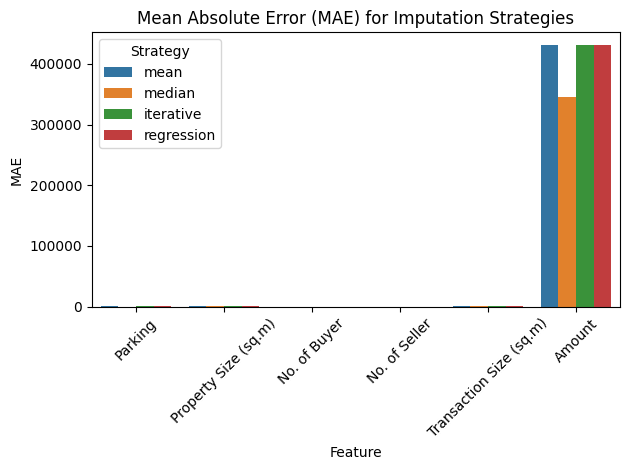

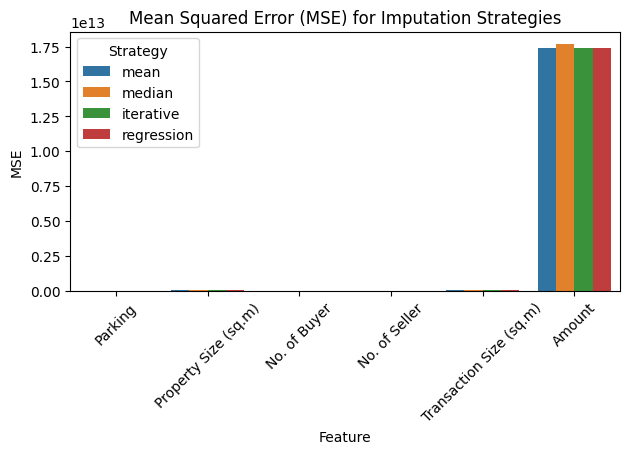

In [121]:

# Evaluate numerical imputation strategies
from sklearn.metrics import mean_absolute_error


def eval_num_imputation_strategies(df_original, df_missing, numerical_features, strategies):
    results = []
    for strategy in strategies:
        # Create pipeline for the current strategy
        pipeline = create_flexible_cleaning_pipeline_with_imputation(
            numerical_features=numerical_features,
            categorical_features=[],  # No categorical features for this evaluation
            num_imputation_strategy=strategy,
            use_scaler=False,
            encode=False
        )
        # Impute missing values
        df_imputed = pipeline.fit_transform(df_missing)
        df_imputed = pd.DataFrame(df_imputed, columns=numerical_features, index=df_missing.index)

        # Calculate errors for each column
        for col in numerical_features:
            original = df_original[col].dropna()
            imputed = df_imputed.loc[original.index, col]
            mae = mean_absolute_error(original, imputed)
            mse = mean_squared_error(original, imputed)
            results.append({'Strategy': strategy, 'Feature': col, 'MAE': mae, 'MSE': mse})
    return pd.DataFrame(results)

# Plot imputation errors
def plot_num_imputation_errors(results_df):
    sns.barplot(data=results_df, x='Feature', y='MAE', hue='Strategy', ci=None)
    plt.title('Mean Absolute Error (MAE) for Imputation Strategies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    sns.barplot(data=results_df, x='Feature', y='MSE', hue='Strategy', ci=None)
    plt.title('Mean Squared Error (MSE) for Imputation Strategies')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Evaluate strategies
num_results = eval_num_imputation_strategies(sales_df, df_num_missing, numerical_features, num_imputation_strategies)

# Visualize results
plot_num_imputation_errors(num_results)



In [122]:
print("Imputation Performance:")
pd.DataFrame(data=num_results)

Imputation Performance:


,Strategy,Feature,MAE,MSE
0,mean,Parking,67.244535,3.196813e+06
1,mean,Property Size (sq.m),487.912869,7.276593e+09
2,mean,No. of Buyer,0.106723,8.385069e+00
3,mean,No. of Seller,0.102716,8.507626e+00
4,mean,Transaction Size (sq.m),522.928800,8.601101e+09
5,mean,Amount,430657.532107,1.741047e+13
6,median,Parking,39.050273,3.204389e+06
7,median,Property Size (sq.m),232.527546,7.276802e+09
8,median,No. of Buyer,0.066122,8.400168e+00
9,median,No. of Seller,0.058522,8.519573e+00


**Imputation performance based on the used metrics:**

---

1. **MAE (Mean Absolute Error)**:
   - **`median`** generally performs better (lower MAE) across most features, especially for `Parking`, `Property Size (sq.m)`, and `Transaction Size (sq.m)`.
   - **`mean`** has reasonable performance for simpler distributions but struggles with outliers (e.g., `Amount`).
   - **`iterative`** performs better for smaller features like `No. of Buyer` and `No. of Seller`.
   - **`regression`** achieves lower errors for complex features like `Property Size (sq.m)` but struggles with high-variance features like `Amount`.

2. **MSE (Mean Squared Error)**:
   - The MSE amplifies large errors, highlighting issues with `iterative` and `regression` methods for `Transaction Size (sq.m)` and `Amount`.
   - **`median`** consistently achieves the lowest MSE for high-variance features, suggesting robustness to outliers.

3. **Feature-Wise Analysis**:
   - For simpler numeric features (e.g., `No. of Buyer`, `No. of Seller`), all methods perform similarly.
   - For high-variance features (e.g., `Amount`, `Transaction Size (sq.m)`), **`median`** shows superior performance, while **`regression`** sometimes overfits or struggles with variability.

---

**Recommendations:**
- Use **`median`** imputation for features with high variance or outliers, as it is robust and achieves lower errors for these cases.
- Use **`iterative`** imputation for smaller-scale or less variable features like `No. of Buyer` or `No. of Seller`.
- **`Regression`** should be avoided for high-variance features like `Amount` unless explicitly modeling relationships.
- **`mean`** imputation can serve as a baseline but is generally less effective than other strategies.

---


In [123]:
full_rentals_df['Usage'].unique()

['Industrial', 'Residential', 'Educational facility', 'Commercial', 'Health Facility', 'Tourist origin', 'Storage', 'Agriculture', 'Industrial / Commercial', 'Residential / Commercial']
Categories (10, object): ['Agriculture', 'Commercial', 'Educational facility', 'Health Facility', ..., 'Residential', 'Residential / Commercial', 'Storage', 'Tourist origin']

`Confirm the imputation by plots`

1. Rentals

In [124]:
# full_median_mode_rentals_df.columns
property_rental_transactions_df[['Annual Amount', 'Annual Amount']].isnull().mean() * 100

Annual Amount    5.886351
Annual Amount    5.886351
dtype: float64

<Figure size 1400x400 with 0 Axes>

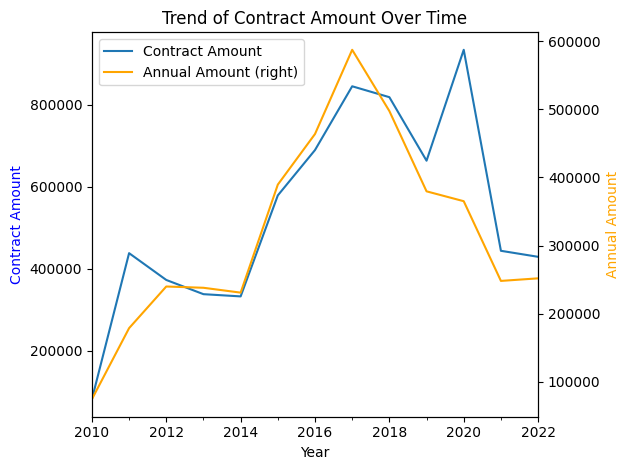

In [125]:
plots.plot_trends(
    property_rental_transactions_df, # Original
    main_col='Contract Amount', 
    time_col='Year', 
    # time_col='Registration Date', 
    secondary_col='Annual Amount'
)

# There were missingness in the original datasets so we dont expect much res

<Figure size 1400x400 with 0 Axes>

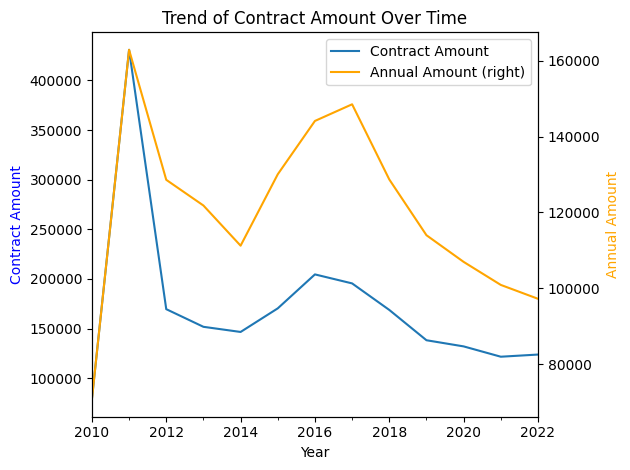

In [126]:
plots.plot_trends(
    full_rentals_df, # Imputed with median and mode pipeline
    main_col='Contract Amount', 
    time_col='Year', 
    # time_col='Registration Date', 
    secondary_col='Annual Amount'
)

In [127]:
property_transactions_df[['Amount', 'Transaction Size (sq.m)']].isnull().mean() * 100

Amount                      0.00000
Transaction Size (sq.m)    12.62351
dtype: float64

<Figure size 1400x400 with 0 Axes>

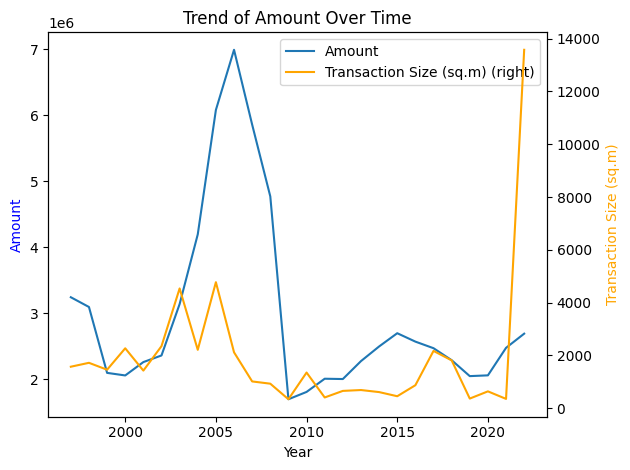

In [128]:
plots.plot_trends(
    sales_transactions_df, # sales before imputation with mean, mode
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)

<Figure size 1400x400 with 0 Axes>

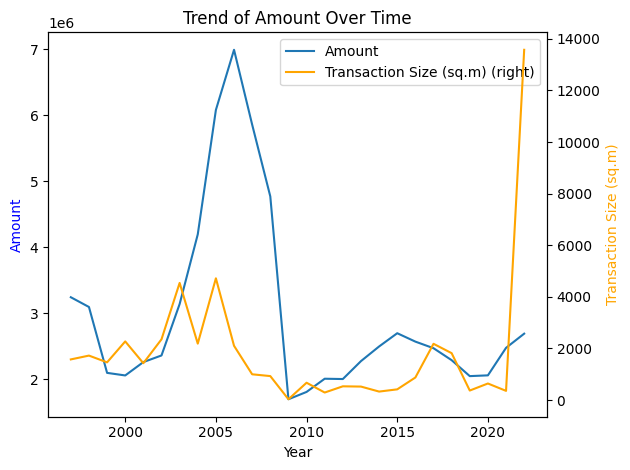

In [129]:
plots.plot_trends(
    full_sales_df, # sales after imputation with mean, mode
    main_col='Amount', 
    time_col='Transaction Date', 
    secondary_col='Transaction Size (sq.m)'
)

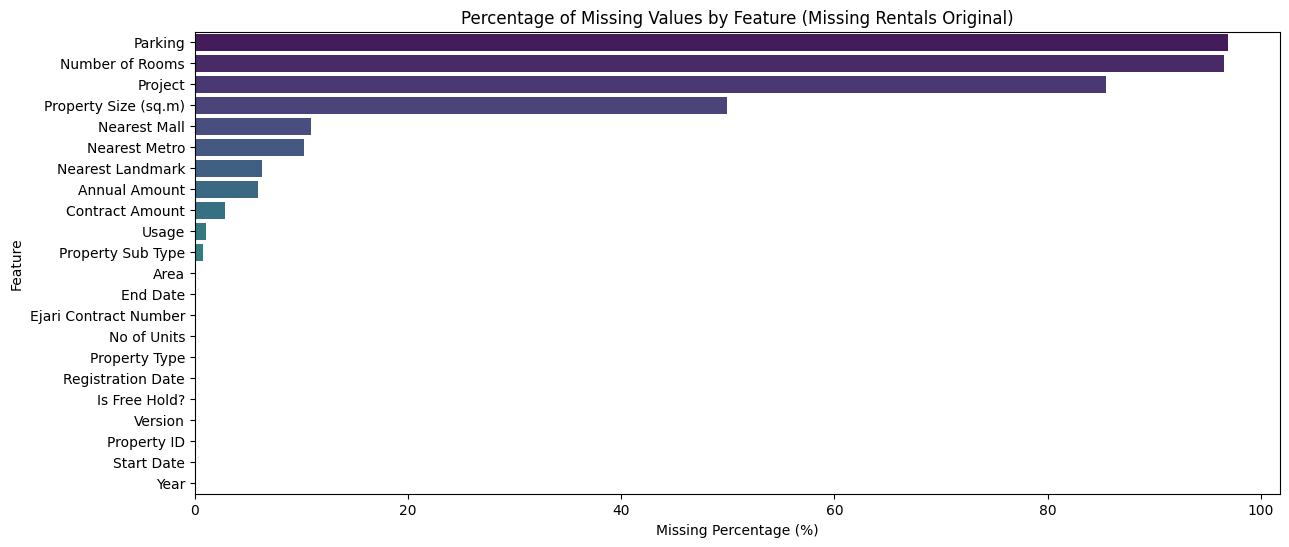

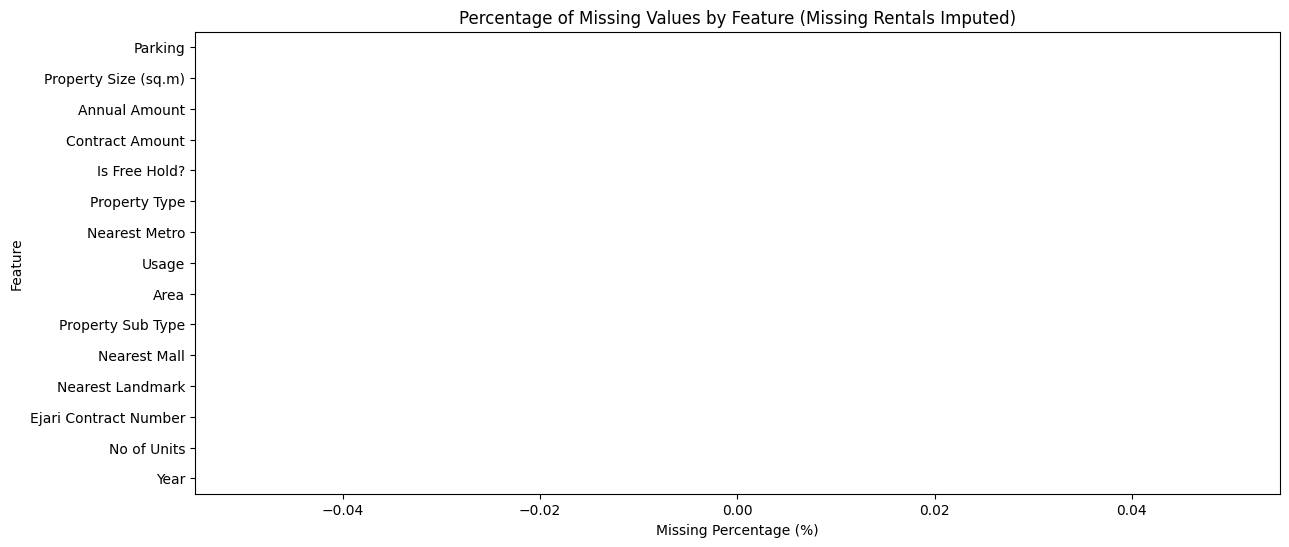

Missing Rentals Original
                                     Feature  MissingPercent
Parking                              Parking       96.926499
Number of Rooms              Number of Rooms       96.526518
Project                              Project       85.483821
Property Size (sq.m)    Property Size (sq.m)       49.951106
Nearest Mall                    Nearest Mall       10.940906
Nearest Metro                  Nearest Metro       10.267712
Nearest Landmark            Nearest Landmark        6.336231
Annual Amount                  Annual Amount        5.886351
Contract Amount              Contract Amount        2.852693
Usage                                  Usage        1.008318
Property Sub Type          Property Sub Type        0.731851
Area                                    Area        0.005943
End Date                            End Date        0.000037
Ejari Contract Number  Ejari Contract Number        0.000000
No of Units                      No of Units        0.000000

In [130]:
missing_property_rental_transactions_df = visualize_missing_values(
    df=property_rental_transactions_df,
    title="Percentage of Missing Values by Feature (Missing Rentals Original)"
)
# cleaned_missing_property_rental_transactions_df = visualize_missing_values(
missing_rentals_imputed_df = visualize_missing_values(
    df=full_rentals_df,
    # df=unencoded_rent_df,
    title="Percentage of Missing Values by Feature (Missing Rentals Imputed)"
)
# Display the summary DataFrame
print("Missing Rentals Original")
print(missing_property_rental_transactions_df)
print("-"*50)
print("Missing Rentals Imptuted")
print(missing_rentals_imputed_df)


In [131]:
# property_transactions_df.drop(columns=['Transaction Number','Property ID','Transaction Type', 'Transaction sub type', 'Registration type',
#        'Is Free Hold?', 'Usage','Project','Month', 'Day', 'No. of Buyer', 'No. of Seller','Parking',
#        'Hour'], inplace=True)
# property_transactions_df.columns

In [132]:

# property_rental_transactions_df.drop(columns=['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date','Parking',
#                                               'Version','Project','Property ID','Number of Rooms','No of Units'], inplace=True)
# property_rental_transactions_df.columns

In [133]:
common_columns = set(full_rentals_df.columns).intersection(set(full_sales_df.columns))
print("common cols:", common_columns)

common cols: {'Nearest Landmark', 'Property Size (sq.m)', 'Property Sub Type', 'Is Free Hold?', 'Year', 'Property Type', 'Parking', 'Nearest Metro', 'Nearest Mall', 'Area', 'Usage'}


In [134]:
# property_rental_transactions_df = data_processor.optimize_dataframe_memory(property_rental_transactions_df)
# data_processor.display_dataframe_info(property_rental_transactions_df)

In [135]:
print(full_rentals_df.columns) 
print(full_sales_df.columns) 

Index(['Parking', 'Property Size (sq.m)', 'Annual Amount', 'Contract Amount',
       'Is Free Hold?', 'Property Type', 'Nearest Metro', 'Usage', 'Area',
       'Property Sub Type', 'Nearest Mall', 'Nearest Landmark',
       'Ejari Contract Number', 'No of Units', 'Year'],
      dtype='object')
Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Amount', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [136]:
# full_sales_df['Year'] = pd.to_datetime(full_sales_df['Year'])
# print('Sales Dtype for Year:', full_sales_df['Year'].dtypes)
# full_sales_df['Year'].unique()
# # print('Rentals Dtype for Year:', full_median_mode_rentals_df['Year'].dtypes)


- I believe merging `Rentals + Macro` and `Sales + Macro` will make more sense

1. Rentals + Macro

In [137]:
common_columns = set(merged_macro_transactions_df.columns).intersection(set(full_rentals_df.columns))
print("common cols btw rentals and macro:", common_columns)
print("shape of macro:", merged_macro_transactions_df.shape)
print("missingness in macro:", merged_macro_transactions_df.isnull().sum().sum())
merged_macro_transactions_df.head(2)

common cols btw rentals and macro: {'Year'}
shape of macro: (26, 15)
missingness in macro: 0


,Year,Sales Transactions,Rental Transactions,GDP_constant,GDP_current,total_population,total_population_female,total_population_male,total_population_others,tourism_guests,currency_strength,GDP_per_capita,Tourism_revenue_per_capita,Population_growth_rate,Tourism_growth_rate
0,1997,56,0.0,39555.666789,44201.158943,5457460.0,1823941.0,904789.0,2728730.0,18970378.0,0.272326,0.007248,3.476045,0.045094,-0.009493
1,1998,1309,0.0,39555.666789,44201.158943,5691510.0,1912678.0,933077.0,2845755.0,21949904.0,0.272326,0.006950,3.856605,0.042886,0.157062


In [138]:
# merged_macro_transactions_df['Year'] = pd.to_datetime(merged_macro_transactions_df['Year'])

# merge_cols = ['Year']

# merged_rentals_macro_df = pd.merge(
#     full_rentals_df,
#     merged_macro_transactions_df,
#     how='outer',  # Use outer join to retain all data
#     on=merge_cols,
# )
# merged_rentals_macro_df.isnull().mean() * 100

In [ ]:
# # Separate numerical and categorical features

# rentals_merged_numerical_features =   full_rentals_df.select_dtypes(include=[np.number]).columns
# rentals_merged_categorical_features = full_rentals_df.select_dtypes(exclude=[np.number]).columns

# sales_merged_numerical_features =   full_sales_df.select_dtypes(include=[np.number]).columns
# sales_merged_categorical_features = full_sales_df.select_dtypes(exclude=[np.number]).columns

# print("\n### Numerical Features ###", sales_merged_numerical_features)
# print("### Categorical Features ###", sales_merged_categorical_features)

In [140]:
full_rentals_df.drop_duplicates(inplace=True)
merged_real_estate_df = data_processor.optimize_dataframe_memory(full_rentals_df)
data_processor.display_dataframe_info(full_rentals_df)

Original memory usage: 279.48 MB
Optimized memory usage: 279.48 MB
Shape: (4651370, 15)
Dtypes: ['Parking:float32', 'Property Size (sq.m):float64', 'Annual Amount:float64', 'Contract Amount:float64', 'Is Free Hold?:category', 'Property Type:category', 'Nearest Metro:category', 'Usage:category', 'Area:category', 'Property Sub Type:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Ejari Contract Number:int64', 'No of Units:int16', 'Year:datetime64[ns]']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'Annual Amount:0.00%', 'Contract Amount:0.00%', 'Is Free Hold?:0.00%', 'Property Type:0.00%', 'Nearest Metro:0.00%', 'Usage:0.00%', 'Area:0.00%', 'Property Sub Type:0.00%', 'Nearest Mall:0.00%', 'Nearest Landmark:0.00%', 'Ejari Contract Number:0.00%', 'No of Units:0.00%', 'Year:0.00%']
Total missings (%): 0.00%
total duplicates: 0
Total memory usage: 279.48 MB


,Parking,Property Size (sq.m),Annual Amount,Contract Amount,Is Free Hold?,Property Type,Nearest Metro,Usage,Area,Property Sub Type,Nearest Mall,Nearest Landmark,Ejari Contract Number,No of Units,Year
0,0.973568,14965.687721,5000.0,25000.0,Free Hold,Building,Rashidiya Metro Station,Industrial,Dubai Investment Park Second,Factory,Dubai Mall,Expo 2020 Site,120210425000238,1,2021-01-01
1,0.972854,6792.000000,4000000.0,16000000.0,Free Hold,Building,Rashidiya Metro Station,Residential,Um Nahad Third,Building,Dubai Mall,Dubai International Airport,120210526001582,1,2021-01-01


In [141]:
full_sales_df.columns

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Amount', 'Usage', 'Transaction Date',
       'Property Sub Type', 'Room(s)', 'Nearest Metro', 'Nearest Mall',
       'Nearest Landmark', 'Transaction Number', 'Property ID',
       'Transaction Type', 'Transaction sub type', 'Registration type',
       'Is Free Hold?', 'Area', 'Property Type', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [142]:
import pandas as pd
import numpy as np
import warnings

def create_sales_features(df):
    """
    Preprocesses the merged real estate DataFrame by imputing missing values, 
    calculating average prices per sq.m by month and week, and deriving new features.
    
    Args:
        df (pd.DataFrame): The input DataFrame containing merged real estate data.

    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    # Convert Transaction Date to datetime and derive YearMonth and YearWeek
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
    df['YearWeek'] = df['Transaction Date'].dt.strftime('%Y-%U')
    # df['Year'] = df['Transaction Date'].dt.year

    # Calculate price per sq.m
    df['Price per sq.m'] = df['Amount'] / df['Transaction Size (sq.m)']

    # Average prices by month
    avg_price_month = df.groupby(['Property Type', 'Area', 'YearMonth'])['Price per sq.m'].mean().reset_index()
    avg_price_month.rename(columns={'Price per sq.m': 'Avg Price Last Month'}, inplace=True)

    # Average prices by week
    avg_price_week = df.groupby(['Property Type', 'Area', 'YearWeek'])['Price per sq.m'].mean().reset_index()
    avg_price_week.rename(columns={'Price per sq.m': 'Avg Price Last Week'}, inplace=True)

    # Merge averages back into the main DataFrame
    df = pd.merge(df, avg_price_month, on=['Property Type', 'Area', 'YearMonth'], how='left')
    df = pd.merge(df, avg_price_week, on=['Property Type', 'Area', 'YearWeek'], how='left')

    # Extract number of rooms as numeric
    df['Number of Rooms'] = df['Room(s)'].str.extract('(\d+)').astype(float)

    # Calculate global medians for imputation
    global_median_rooms = df['Number of Rooms'].median()
    global_mean_rooms = df['Number of Rooms'].mean()

    # Impute Number of Rooms using group median or global median
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        df['Number of Rooms'] = df.groupby('Property Sub Type')['Number of Rooms'].transform(
            lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_median_rooms)
        )

    # Impute Avg Price per sq.m Last Month
    df['Avg Price Last Month'] = df.groupby(['Property Type', 'Area'])['Avg Price Last Month'].transform(
        lambda x: x.fillna(x.mean() if not pd.isna(x.mean()) else global_mean_rooms)
    )

    # Impute Avg Price per sq.m Last Week
    df['Avg Price Last Week'] = df.groupby(['Property Type', 'Area'])['Avg Price Last Week'].transform(
        lambda x: x.fillna(x.median() if not pd.isna(x.median()) else global_mean_rooms)
    )

    # # Impute Property Sub Type using mode
    # df['Property Sub Type'] = df.groupby('Property Type')['Property Sub Type'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Room(s) using mode
    # df['Room(s)'] = df.groupby('Property Sub Type')['Room(s)'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Nearest Metro using mode by Area
    # df['Nearest Metro'] = df.groupby('Area')['Nearest Metro'].transform(
    #     lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    # )

    # # Impute Property Size using medians
    # df['Property Size (sq.m)'] = df.groupby('Property Type')['Property Size (sq.m)'].transform(
    #     lambda x: x.fillna(x.median())
    # )
    # df['Property Size (sq.m)'] = df.groupby('Property Sub Type')['Property Size (sq.m)'].transform(
    #     lambda x: x.fillna(x.median())
    # )

    # # Impute categorical columns using modes
    # for col in ['Area', 'Nearest Mall', 'Nearest Landmark', 'Usage']:
    #     df[col] = df.groupby('Area')[col].transform(
    #         lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown'
    #     )
    
    # Drop rows with critical missing values
    df.dropna(subset=['Number of Rooms', 'Avg Price Last Month', 'Avg Price Last Week'], inplace=True)
    
     
    # Ensure no infinity values remain
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df

full_sales_df = create_sales_features(full_sales_df)


In [143]:
print(full_sales_df.isnull().mean() * 100)

Parking                    0.000000
Property Size (sq.m)       0.000000
No. of Buyer               0.000000
No. of Seller              0.000000
Transaction Size (sq.m)    0.000000
Amount                     0.000000
Usage                      0.000000
Transaction Date           0.000000
Property Sub Type          0.000000
Room(s)                    0.000000
Nearest Metro              0.000000
Nearest Mall               0.000000
Nearest Landmark           0.000000
Transaction Number         0.000000
Property ID                0.000000
Transaction Type           0.000000
Transaction sub type       0.000000
Registration type          0.000000
Is Free Hold?              0.000000
Area                       0.000000
Property Type              0.000000
Year                       0.000000
Month                      0.000000
Day                        0.000000
Hour                       0.000000
YearMonth                  0.000000
YearWeek                   0.000000
Price per sq.m             0

In [144]:
# merged_real_estate_df.isnull().mean() * 100
full_sales_df.shape

(706096, 31)

In [145]:
full_sales_df['YearWeek'].unique()

array(['2022-22', '2022-21', '2022-20', ..., '1997-46', '1997-45',
       '1997-44'], dtype=object)

In [146]:
# Number of Rooms, Ajari Contract Number, Usage, No of Buyer, No of Seller, Transaction Date, Room(s),
# Price Per sq.m, Avg Price Last Month, Avg Price Last Week, YearMonth, YearWeek, 'Transaction Size (sq.m)'

In [147]:
full_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706096 entries, 0 to 706095
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype    
---  ------                   --------------   -----    
 0   Parking                  706096 non-null  float64  
 1   Property Size (sq.m)     706096 non-null  float64  
 2   No. of Buyer             706096 non-null  float32  
 3   No. of Seller            706096 non-null  float32  
 4   Transaction Size (sq.m)  706096 non-null  float64  
 5   Amount                   706096 non-null  float64  
 6   Usage                    706096 non-null  category 
 7   Transaction Date         706096 non-null  category 
 8   Property Sub Type        706096 non-null  category 
 9   Room(s)                  706096 non-null  category 
 10  Nearest Metro            706096 non-null  category 
 11  Nearest Mall             706096 non-null  category 
 12  Nearest Landmark         706096 non-null  category 
 13  Transaction Number       7060

In [159]:
full_rentals_df.rename(columns={
    # 'Amount': 'Sale Price',
    'Contract Amount': 'Rental Price',
    'Annual Amount': 'Annual Rental Price',
}, inplace=True)

full_sales_df.rename(columns={
    'Amount': 'Sale Price',
    # 'Contract Amount': 'Rental Price',
    # 'Annual Amount': 'Annual Rental Price',
}, inplace=True)



In [149]:
full_sales_df[['Sale Price','Avg Price Last Month','Avg Price Last Week']]
# full_median_mode_rentals_df[['Sale Price','Annual Rental Price','Avg Price Last Month','Avg Price Last Week']]

,Sale Price,Avg Price Last Month,Avg Price Last Week
0,1500000.0,2498.688452,5150.112859
1,815000.0,7719.686097,8030.465069
2,425993.0,9752.518951,10133.296073
3,1550000.0,9921.030983,10306.867209
4,1900000.0,22598.646581,26564.467497
...,...,...,...
706091,9867000.0,7427.117598,7427.117598
706092,704000.0,760.921289,638.657553
706093,180000.0,760.921289,638.657553
706094,1400000.0,7064.997981,7064.997981


In [160]:
rentals_merged_numerical_features =   full_rentals_df.select_dtypes(include=[np.number]).columns
rentals_merged_categorical_features = full_rentals_df.select_dtypes(exclude=[np.number]).columns

sales_merged_numerical_features =   full_sales_df.select_dtypes(include=[np.number]).columns
sales_merged_categorical_features = full_sales_df.select_dtypes(exclude=[np.number]).columns

print("\n### Numerical Features ###", sales_merged_numerical_features)
print("### Categorical Features ###", sales_merged_categorical_features)


### Numerical Features ### Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Sale Price', 'Property ID', 'Year', 'Month',
       'Day', 'Hour', 'Price per sq.m', 'Avg Price Last Month',
       'Avg Price Last Week', 'Number of Rooms'],
      dtype='object')
### Categorical Features ### Index(['Usage', 'Transaction Date', 'Property Sub Type', 'Room(s)',
       'Nearest Metro', 'Nearest Mall', 'Nearest Landmark',
       'Transaction Number', 'Transaction Type', 'Transaction sub type',
       'Registration type', 'Is Free Hold?', 'Area', 'Property Type',
       'YearMonth', 'YearWeek'],
      dtype='object')


In [150]:
print("duplicated:",full_sales_df.duplicated().sum())
full_sales_df.drop_duplicates(inplace=True)
full_sales_df = data_processor.optimize_dataframe_memory(full_sales_df)
data_processor.display_dataframe_info(full_sales_df)

duplicated: 0
Original memory usage: 101.72 MB
Optimized memory usage: 95.03 MB
Shape: (706096, 31)
Dtypes: ['Parking:float64', 'Property Size (sq.m):float64', 'No. of Buyer:float32', 'No. of Seller:float32', 'Transaction Size (sq.m):float64', 'Sale Price:float64', 'Usage:category', 'Transaction Date:category', 'Property Sub Type:category', 'Room(s):category', 'Nearest Metro:category', 'Nearest Mall:category', 'Nearest Landmark:category', 'Transaction Number:object', 'Property ID:int32', 'Transaction Type:category', 'Transaction sub type:category', 'Registration type:category', 'Is Free Hold?:category', 'Area:category', 'Property Type:category', 'Year:int16', 'Month:int8', 'Day:int8', 'Hour:int8', 'YearMonth:period[M]', 'YearWeek:category', 'Price per sq.m:float64', 'Avg Price Last Month:float64', 'Avg Price Last Week:float64', 'Number of Rooms:float32']
Missings (%): ['Parking:0.00%', 'Property Size (sq.m):0.00%', 'No. of Buyer:0.00%', 'No. of Seller:0.00%', 'Transaction Size (sq.m):0

,Parking,Property Size (sq.m),No. of Buyer,No. of Seller,Transaction Size (sq.m),Sale Price,Usage,Transaction Date,Property Sub Type,Room(s),...,Year,Month,Day,Hour,YearMonth,YearWeek,Price per sq.m,Avg Price Last Month,Avg Price Last Week,Number of Rooms
0,271.705672,600.51,1.0,1.0,600.51,1500000.0,Commercial,2022-06-02 15:22:00,Commercial,1 B/R,...,2022,6,2,15,2022-06,2022-22,2497.876805,2498.688452,5150.112859,1.0
1,210.452335,112.24,1.0,1.0,112.24,815000.0,Residential,2022-06-02 15:07:00,Residential,1 B/R,...,2022,6,2,15,2022-06,2022-22,7261.225944,7719.686097,8030.465069,1.0


- get selected data for modeling

In [151]:
# model_features_df = merged_real_estate_df[['Is Free Hold?', 'Number of Rooms','Room(s)', 'Property Size (sq.m)',
#                              'Area', 'Nearest Metro', 'Nearest Mall', 'Property Type','Annual Rental Price','Rental Price',
#                              'Nearest Landmark', 'Usage', 'Avg Price Last Month', 'Sale Price',
#                              'Avg Price Last Week','Year']]
# model_features_df.head(2)

- EDA on model features to prepare them

Assesssing importance of each feature in the context of this analysis:

1. **Perform Exploratory Data Analysis (EDA)**:
   - **Check Correlations**: Identify features highly correlated with the target variable(s) and with each other.
   - **Distribution Analysis**: Check for features with limited variance or significant outliers that may not contribute meaningfully.
   - **Missing Data Patterns**: Features with excessive missing values might not be helpful unless they provide critical insights.

2. **Domain Knowledge**:
   - Assess the relevance of features based on their contextual importance in predicting rental/sale prices (e.g., `Property Size (sq.m)` is likely more impactful than `Ejari Contract Number`).

3. **Feature Importance from Models**:
   - Use tree-based models like Random Forest or Gradient Boosting to get feature importances.
   - Perform permutation importance analysis to understand each feature's contribution.

4. **Redundancy Check**:
   - Drop duplicates or highly similar features (e.g., `Number of Rooms` vs. `Room(s)`).

---

**Feature-by-Feature Review**

**Likely Critical Features**:
1. **`Property Sub Type`**: Captures specific property characteristics.
2. **`Number of Rooms` or `Room(s)`**: High relevance for price/rental prediction.
3. **`Property Size (sq.m)`**: Directly impacts pricing.
4. **`Price per sq.m`**: Indicates market trends; likely important.
5. **`Area`**: Location is a primary determinant in real estate.
6. **`Nearest Metro`, `Nearest Mall`, `Nearest Landmark`**: Accessibility factors often influence property value.
7. **`Property Type`**: Differentiates between apartments, villas, etc.
8. **`Annual Rental Price` and `Rental Price`**: Core targets or predictors for rental-focused models.
9. **`Avg Price Last Month`, `Avg Price Last Week`**: May indicate trends in the property market.

**Moderately Relevant Features**:
1. **`Usage`**: Determines if the property is commercial, residential, or mixed-use.
2. **`Sale Price`**: Critical for sale prediction tasks but redundant if used as the target.
3. **`Transaction Size (sq.m)`**: May correlate with property size but could be redundant.
4. **`Parking`**: Important for certain property types but may have lower variance.

 **Potentially Less Useful Features**:
1. **`YearMonth` and `YearWeek`**: May add limited value unless used for time series analysis or trend detection.
2. **`No. of Buyer`, `No. of Seller`**: Could be noisy unless they reflect market trends or competition.
3. **`Ejari Contract Number`**: Likely an identifier, not useful for prediction.


---


In [152]:
# num_features =   model_features_df.select_dtypes(include=[np.number]).columns
# cat_features =   model_features_df.select_dtypes(exclude=[np.number]).columns
# # model_features_df[num_features].describe()

In [153]:
# Summary statistics for categorical features
print("\n### Categorical Features Summary ###")
for col in full_sales_df:
    print(f"\n{col} Value Counts:")
    print(full_sales_df[col].value_counts())


### Categorical Features Summary ###

Parking Value Counts:
Parking
 1.000000      58160
 2.000000       5605
-1.000000       2522
 206.029494      588
 0.000000        537
               ...  
 284.645894        1
 284.644304        1
 204.150329        1
-283.217466        1
 210.126914        1
Name: count, Length: 487154, dtype: int64

Property Size (sq.m) Value Counts:
Property Size (sq.m)
45.00       8234
1393.55     4092
68.00       3220
67.00       2996
44.00       2745
            ... 
9289.93        1
5172.92        1
311.07         1
789.46         1
17763.05       1
Name: count, Length: 64036, dtype: int64

No. of Buyer Value Counts:
No. of Buyer
1.000000     577595
2.000000     101122
0.000000      19844
3.000000       4645
4.000000       1322
              ...  
1.272201          1
1.276350          1
1.291709          1
1.291859          1
27.000000         1
Name: count, Length: 158, dtype: int64

No. of Seller Value Counts:
No. of Seller
1.000000     638732
2.000000  

In [158]:
sales_merged_numerical_features

Index(['Parking', 'Property Size (sq.m)', 'No. of Buyer', 'No. of Seller',
       'Transaction Size (sq.m)', 'Amount', 'Property ID', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


### Correlation Heatmap for Numerical Features (Sales) ###


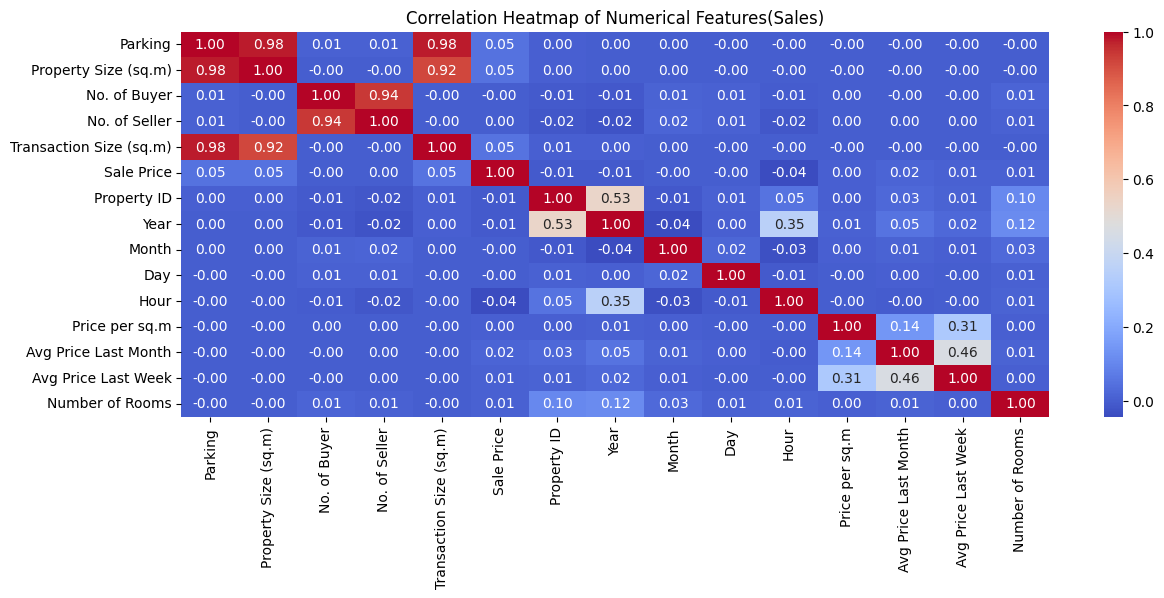

Correlation Matrix for Selected Model Features(Sales):


,Parking,Property Size (sq.m),No. of Buyer,No. of Seller,Transaction Size (sq.m),Sale Price,Property ID,Year,Month,Day,Hour,Price per sq.m,Avg Price Last Month,Avg Price Last Week,Number of Rooms
Parking,1.000000,0.979442,0.008168,0.008018,0.977983,0.048347,0.004288,0.001496,0.000288,-0.001087,-0.001178,-0.000062,-0.000397,-0.000191,-0.001383
Property Size (sq.m),0.979442,1.000000,-0.000371,-0.000376,0.916798,0.046918,0.004316,0.001232,0.000301,-0.000866,-0.001666,-0.000051,-0.000337,-0.000161,-0.001740
No. of Buyer,0.008168,-0.000371,1.000000,0.939428,-0.000392,-0.001992,-0.007782,-0.014658,0.012753,0.005868,-0.005749,0.000021,-0.000197,-0.000082,0.014314
No. of Seller,0.008018,-0.000376,0.939428,1.000000,-0.000390,0.000611,-0.016518,-0.023466,0.015142,0.007378,-0.016861,0.000002,0.000253,0.000092,0.009482
Transaction Size (sq.m),0.977983,0.916798,-0.000392,-0.000390,1.000000,0.054540,0.005043,0.002536,0.000050,-0.001490,-0.000668,-0.000044,-0.000287,-0.000138,-0.001386
Sale Price,0.048347,0.046918,-0.001992,0.000611,0.054540,1.000000,-0.010474,-0.010461,-0.000775,-0.000878,-0.041522,0.003137,0.017014,0.008536,0.007915
Property ID,0.004288,0.004316,-0.007782,-0.016518,0.005043,-0.010474,1.000000,0.531792,-0.010788,0.006153,0.052048,0.004260,0.025489,0.012147,0.103861
Year,0.001496,0.001232,-0.014658,-0.023466,0.002536,-0.010461,0.531792,1.000000,-0.043243,0.003908,0.353055,0.007510,0.052225,0.023974,0.115351
Month,0.000288,0.000301,0.012753,0.015142,0.000050,-0.000775,-0.010788,-0.043243,1.000000,0.018609,-0.032440,0.001752,0.012211,0.005599,0.029519
Day,-0.001087,-0.000866,0.005868,0.007378,-0.001490,-0.000878,0.006153,0.003908,0.018609,1.000000,-0.009043,-0.000938,0.002577,-0.002281,0.005786


In [161]:
# Correlation heatmap for numerical features
print("\n### Correlation Heatmap for Numerical Features (Sales) ###")
plt.figure(figsize=(14, 5))
corr_matrix_sales = full_sales_df[sales_merged_numerical_features].corr()
sns.heatmap(
    corr_matrix_sales, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features(Sales)")
plt.show()

print("Correlation Matrix for Selected Model Features(Sales):")
corr_matrix_sales


### Correlation Heatmap for Numerical Features (Rentals) ###


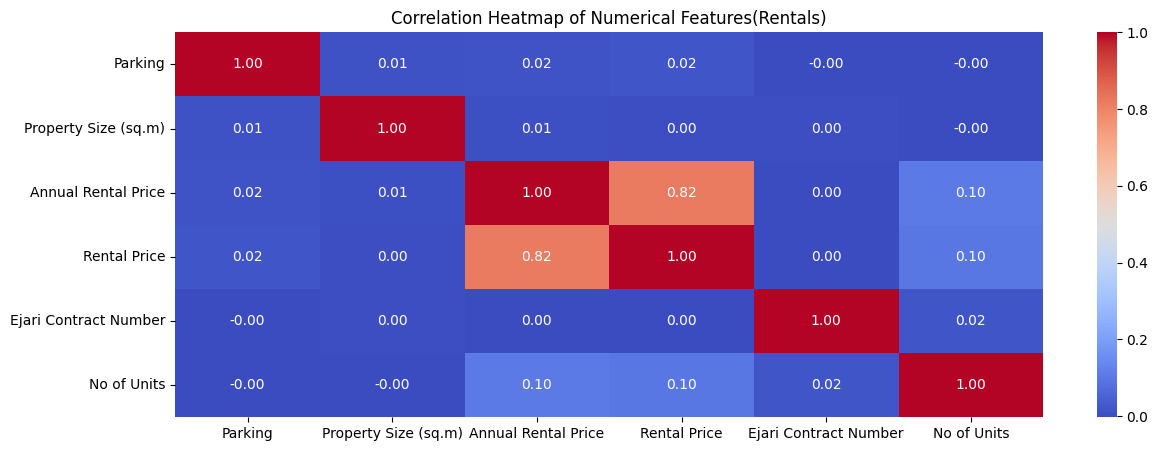

Correlation Matrix for Selected Model Features(Rentals):


,Parking,Property Size (sq.m),Annual Rental Price,Rental Price,Ejari Contract Number,No of Units
Parking,1.000000,0.011298,0.015959,0.018215,-0.002870,-0.000121
Property Size (sq.m),0.011298,1.000000,0.005990,0.002705,0.002075,-0.000271
Annual Rental Price,0.015959,0.005990,1.000000,0.817241,0.000554,0.104596
Rental Price,0.018215,0.002705,0.817241,1.000000,0.000917,0.095673
Ejari Contract Number,-0.002870,0.002075,0.000554,0.000917,1.000000,0.017696
No of Units,-0.000121,-0.000271,0.104596,0.095673,0.017696,1.000000


In [162]:

# Correlation heatmap for numerical features
print("\n### Correlation Heatmap for Numerical Features (Rentals) ###")
plt.figure(figsize=(14, 5))
corr_matrix_rentals = full_rentals_df[rentals_merged_numerical_features].corr()
sns.heatmap(
    corr_matrix_rentals, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True
)
plt.title("Correlation Heatmap of Numerical Features(Rentals)")
plt.show()

print("Correlation Matrix for Selected Model Features(Rentals):")
corr_matrix_rentals


- save the processed dataframe to disk

In [ ]:
# Convert 'YearMonth' from Period to datetime (start of the month)
# model_features_df['YearMonth'] = model_features_df['YearMonth'].dt.to_timestamp()

# Alternatively,  to string:
# full_sales_df['YearMonth'] = full_sales_df['YearMonth'].astype(str)
# full_sales_df['YearMonth']

In [163]:
# processed_gdp_quarterly_constant_df.to_parquet("../datasets/processed/processed_gdp_quarterly_constant_df.parquet")
# 
# merged_macro_transactions_df.to_parquet("../datasets/processed/merged_macro_transactions.parquet")
# property_transactions_df.to_parquet("../datasets/processed/property_transactions.parquet")
full_sales_df.to_parquet("../datasets/processed/full_sales_df.parquet")
full_rentals_df.to_parquet("../datasets/processed/full_rentals_df.parquet")


In [ ]:
fsffs

In [100]:
# Property Type or/and Property Sub Type
# Number of rooms/bedrooms
# Property Size (sq.m)
# Area/Neighborhood
# Nearest Metro
# Nearest Mall
# Nearest Landmark
# Usage (commercial/residential)
# Average prices the previous month/week (for the same kind of property)

In [102]:
property_rental_transactions_df.shape, property_transactions_df.shape, merged_macro_transactions_df.shape

((5380162, 19), (995975, 26), (26, 15))